<a href="https://colab.research.google.com/github/RidisaSaha/HOUSE_PRICE_PREDICTION/blob/main/HOUSE_PRICING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

# File paths
file_paths = [
    "Bangalore_LotShape.csv",
    "Chennai_LotShape.csv",
    "Hyderabad_LotShape.csv",
    "Delhi_LotShape.csv",
    "Mumbai_LotShape.csv",
    "Kolkata_LotShape.csv"
]

# Function to clean categorical values and introduce random missing values
def clean_and_insert_missing_values(df):
    # Excluding 'No. of Bedrooms' from the global replace operation
    columns_to_replace = [col for col in df.columns if col != 'No. of Bedrooms']
    df[columns_to_replace] = df[columns_to_replace].replace({0: "N", 1: "Y"})

    # Replace 9 with Y or N randomly in specified columns
    for col in columns_to_replace:
        # Get indices where value is 9
        indices_with_9 = df[df[col] == 9].index

        # Randomly assign Y or N to those indices
        df.loc[indices_with_9, col] = np.random.choice(["Y", "N"], size=len(indices_with_9))

    # Identify categorical columns excluding 'LotShape' and 'Location'
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if col not in ['LotShape', 'Location', 'No. of Bedrooms']]

    # Introduce random missing values in categorical columns
    for col in categorical_columns:
        df.loc[df.sample(frac=0.1).index, col] = np.nan  # Randomly set 10% as missing

    #df.fillna("NA", inplace=True)  # Fill missing values with "NA"

    return df

# Process each file
for file_path in file_paths:
    df = pd.read_csv(file_path)  # Read the file
    df = clean_and_insert_missing_values(df)  # Clean and modify the data
    new_file_path = file_path.replace(".csv", "_cleaned.csv")  # New filename
    df.to_csv(new_file_path, index=False)  # Save the cleaned file
    print(f"Cleaned file saved: {new_file_path}")


Cleaned file saved: Bangalore_LotShape_cleaned.csv
Cleaned file saved: Chennai_LotShape_cleaned.csv
Cleaned file saved: Hyderabad_LotShape_cleaned.csv
Cleaned file saved: Delhi_LotShape_cleaned.csv
Cleaned file saved: Mumbai_LotShape_cleaned.csv
Cleaned file saved: Kolkata_LotShape_cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
import random

# File paths for cleaned files
file_paths = [
    "Bangalore_LotShape_cleaned.csv",
    "Chennai_LotShape_cleaned.csv",
    "Hyderabad_LotShape_cleaned.csv",
    "Delhi_LotShape_cleaned.csv",
    "Mumbai_LotShape_cleaned.csv",
    "Kolkata_LotShape_cleaned.csv"
]

# Function to insert outliers
def insert_outliers(df):
    # Identify categorical columns excluding 'LotShape' and 'Location'
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if col not in ['LotShape', 'Location','No. of Bedrooms']]

    # Split categorical columns into two groups randomly without overlap
    num_pq_cols = len(categorical_columns) // 2  # Number of columns for P, Q outliers
    pq_columns = random.sample(categorical_columns, num_pq_cols)  # Randomly select columns for P, Q
    st_columns = [col for col in categorical_columns if col not in pq_columns]  # Remaining columns for S, T

    # Insert "P", "Q" outliers in pq_columns
    for col in pq_columns:
        # Get the sample indices first
        sample_indices = df.sample(frac=0.05).index
        # Now generate random choices with the exact length of the sample indices
        df.loc[sample_indices, col] = np.random.choice(["P", "Q"], size=len(sample_indices))

    # Insert "S", "T" outliers in st_columns
    for col in st_columns:
        # Get the sample indices first
        sample_indices = df.sample(frac=0.05).index
        # Now generate random choices with the exact length of the sample indices
        df.loc[sample_indices, col] = np.random.choice(["S", "T"], size=len(sample_indices))

    # Insert 'P' and 'XX-ERR' in 5% of the LotShape column
    if 'LotShape' in df.columns:
        # Get the sample indices first
        sample_indices = df.sample(frac=0.05).index
        # Now generate random choices with the exact length of the sample indices
        df.loc[sample_indices, 'LotShape'] = np.random.choice(["P", "XX-ERR"], size=len(sample_indices))

    return df

# Process each file
for file_path in file_paths:
    df = pd.read_csv(file_path)  # Read the cleaned file
    df = insert_outliers(df)  # Add outliers
    new_file_path = file_path.replace("_cleaned.csv", "_outliers.csv")  # New filename
    df.to_csv(new_file_path, index=False)  # Save the modified file
    print(f"Outliers inserted and file saved: {new_file_path}")


Outliers inserted and file saved: Bangalore_LotShape_outliers.csv
Outliers inserted and file saved: Chennai_LotShape_outliers.csv
Outliers inserted and file saved: Hyderabad_LotShape_outliers.csv
Outliers inserted and file saved: Delhi_LotShape_outliers.csv
Outliers inserted and file saved: Mumbai_LotShape_outliers.csv
Outliers inserted and file saved: Kolkata_LotShape_outliers.csv


In [ ]:
import pandas as pd
import numpy as np

# File paths for outlier files
file_paths = [
    "Bangalore_LotShape_outliers.csv",
    "Chennai_LotShape_outliers.csv",
    "Hyderabad_LotShape_outliers.csv",
    "Delhi_LotShape_outliers.csv",
    "Mumbai_LotShape_outliers.csv",
    "Kolkata_LotShape_outliers.csv"
]

# Outlier values to check for
outlier_values = ["Y", "S", "T", "N", "P", "Q", "XX-ERR"]

# Loop through each file
for file_path in file_paths:
    df = pd.read_csv(file_path)  # Read the file

    # Identify categorical columns excluding 'No. of Bedrooms'
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if col != 'No. of Bedrooms']

    # Create a dictionary to store results for this file
    file_results = {}

    # Loop through each categorical column
    for col in categorical_columns:
        # Create a dictionary to store outlier percentages for this column
        column_results = {}

        # Loop through each outlier value
        for outlier_value in outlier_values:
            # Calculate percentage of this outlier value in the column
            outlier_count = df[col].apply(lambda x: x == outlier_value if pd.notnull(x) else False).sum()
            outlier_percentage = (outlier_count / len(df[col])) * 100
            column_results[outlier_value + "_%"] = outlier_percentage

        # Add missing values percentage for this column
        missing_percentage = df[col].isnull().sum() / len(df[col]) * 100
        column_results["Missing_%"] = missing_percentage

        # Add column results to file results
        file_results[col] = column_results

    # Create a DataFrame from the results for this file
    results_df = pd.DataFrame(file_results).T  # Transpose to have outliers as columns

    # Save the DataFrame to a CSV file
    output_file_path = file_path.replace("_outliers.csv", "_outlier_percentages.csv")
    results_df.to_csv(output_file_path, index=True)  # Index is the column name

    print(f"Outlier percentages for {file_path} saved to {output_file_path}")

Outlier percentages for Bangalore_LotShape_outliers.csv saved to Bangalore_LotShape_outlier_percentages.csv
Outlier percentages for Chennai_LotShape_outliers.csv saved to Chennai_LotShape_outlier_percentages.csv
Outlier percentages for Hyderabad_LotShape_outliers.csv saved to Hyderabad_LotShape_outlier_percentages.csv
Outlier percentages for Delhi_LotShape_outliers.csv saved to Delhi_LotShape_outlier_percentages.csv
Outlier percentages for Mumbai_LotShape_outliers.csv saved to Mumbai_LotShape_outlier_percentages.csv
Outlier percentages for Kolkata_LotShape_outliers.csv saved to Kolkata_LotShape_outlier_percentages.csv


This code uses SimpleImputer for numerical columns



------------------ Bangalore Dataset Summary ------------------


Summary Statistics (Numeric Columns):

              Price         Area  No. of Bedrooms
count  6.207000e+03  6207.000000      6207.000000
mean   1.058510e+07  1526.094248         2.556952
std    1.410943e+07   764.845609         0.694300
min    2.000000e+06   415.000000         1.000000
25%    5.000000e+06  1110.000000         2.000000
50%    7.368000e+06  1340.000000         3.000000
75%    1.070000e+07  1662.500000         3.000000
max    3.000000e+08  9900.000000         7.000000
No of rows: 6207
No of cols: 41



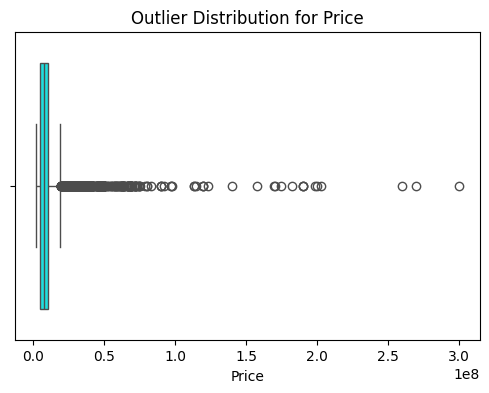

Column Name: Price
Largest 5 outliers: [200000000 202700000 260000000 270000000 300000000]



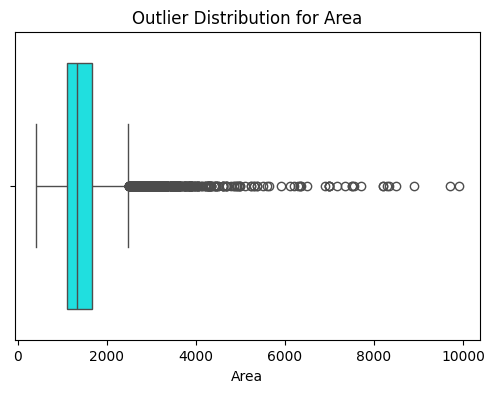

Column Name: Area
Largest 5 outliers: [8331 8500 8902 9700 9900]



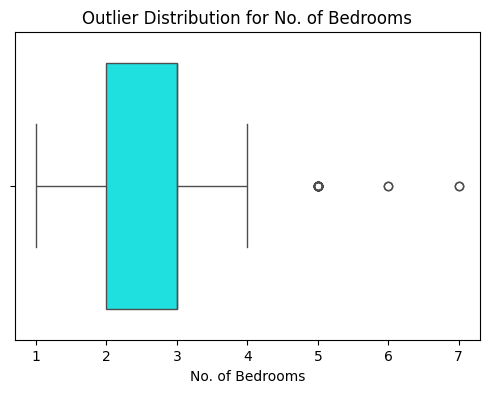

Column Name: No. of Bedrooms
Largest 5 outliers: [5 6 7]


Frequency Distribution of Categorical Column values....


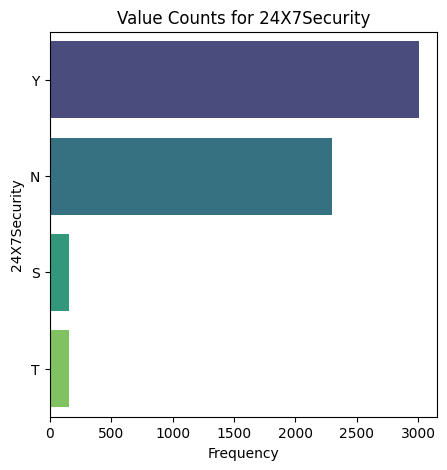

Column Name: 24X7Security
  Value: Y                    Percentage: 48.40%
  Value: N                    Percentage: 37.04%
  Value: S                    Percentage: 2.50%
  Value: T                    Percentage: 2.50%


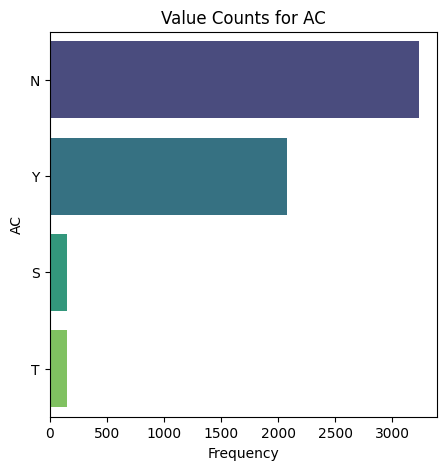

Column Name: AC
  Value: N                    Percentage: 52.05%
  Value: Y                    Percentage: 33.51%
  Value: S                    Percentage: 2.50%
  Value: T                    Percentage: 2.50%


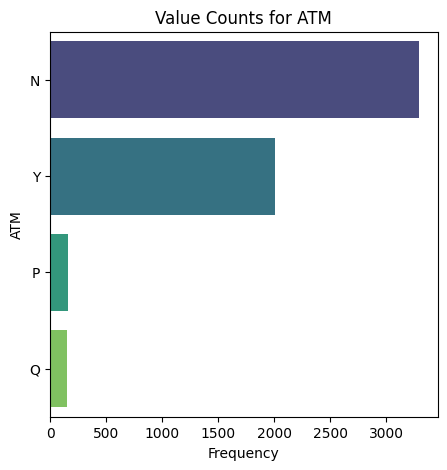

Column Name: ATM
  Value: N                    Percentage: 53.04%
  Value: Y                    Percentage: 32.32%
  Value: P                    Percentage: 2.53%
  Value: Q                    Percentage: 2.46%


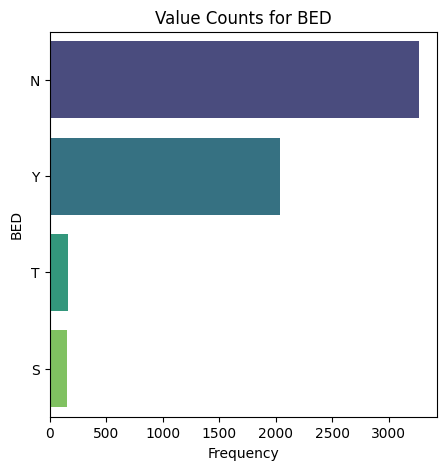

Column Name: BED
  Value: N                    Percentage: 52.63%
  Value: Y                    Percentage: 32.80%
  Value: T                    Percentage: 2.55%
  Value: S                    Percentage: 2.45%


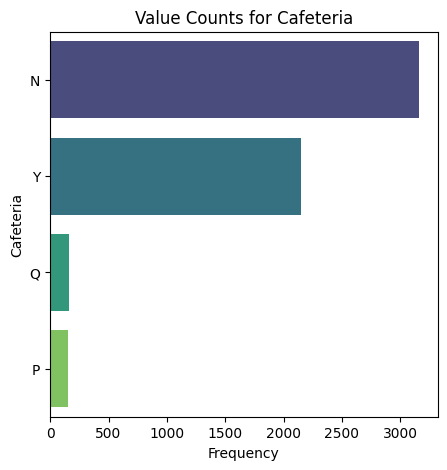

Column Name: Cafeteria
  Value: N                    Percentage: 50.94%
  Value: Y                    Percentage: 34.59%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


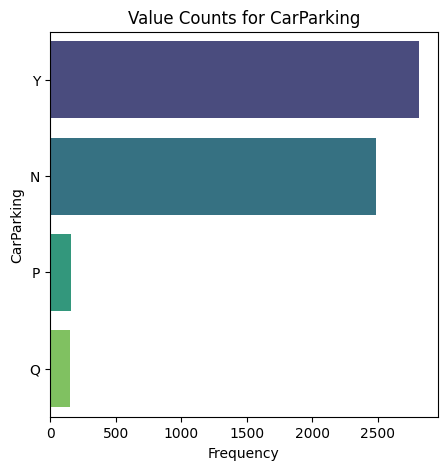

Column Name: CarParking
  Value: Y                    Percentage: 45.40%
  Value: N                    Percentage: 40.13%
  Value: P                    Percentage: 2.59%
  Value: Q                    Percentage: 2.40%


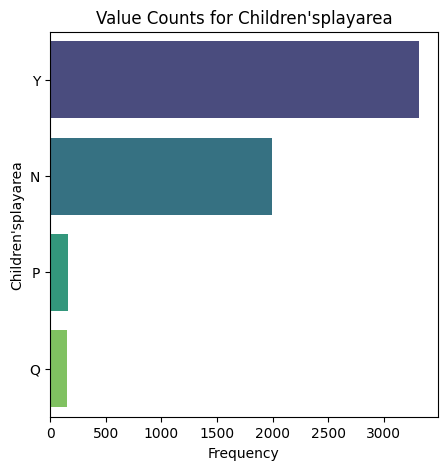

Column Name: Children'splayarea
  Value: Y                    Percentage: 53.44%
  Value: N                    Percentage: 32.17%
  Value: P                    Percentage: 2.56%
  Value: Q                    Percentage: 2.43%


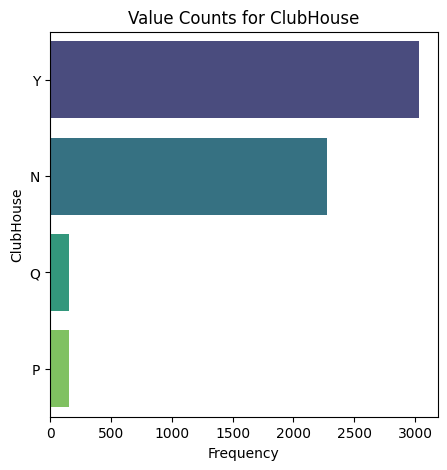

Column Name: ClubHouse
  Value: Y                    Percentage: 48.88%
  Value: N                    Percentage: 36.64%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


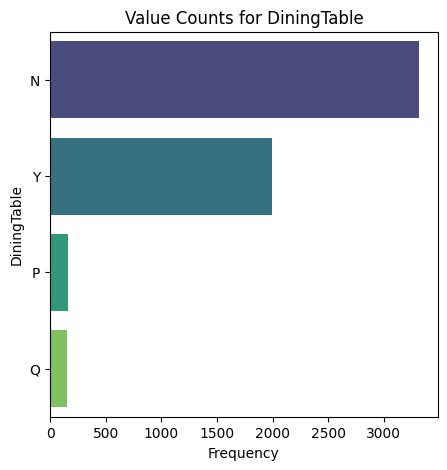

Column Name: DiningTable
  Value: N                    Percentage: 53.44%
  Value: Y                    Percentage: 32.08%
  Value: P                    Percentage: 2.56%
  Value: Q                    Percentage: 2.43%


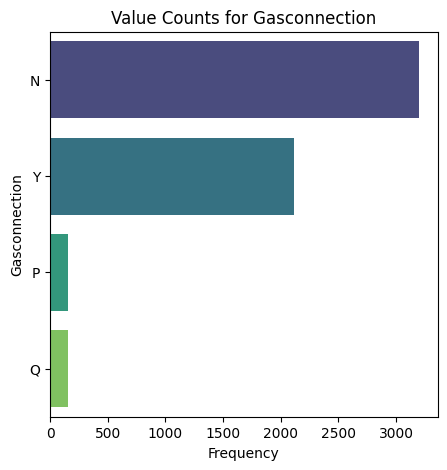

Column Name: Gasconnection
  Value: N                    Percentage: 51.55%
  Value: Y                    Percentage: 34.01%
  Value: P                    Percentage: 2.53%
  Value: Q                    Percentage: 2.46%


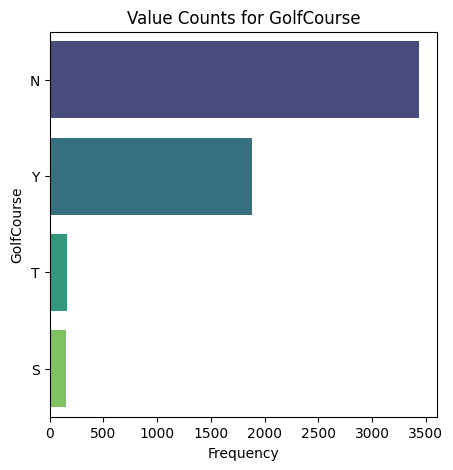

Column Name: GolfCourse
  Value: N                    Percentage: 55.31%
  Value: Y                    Percentage: 30.29%
  Value: T                    Percentage: 2.59%
  Value: S                    Percentage: 2.40%


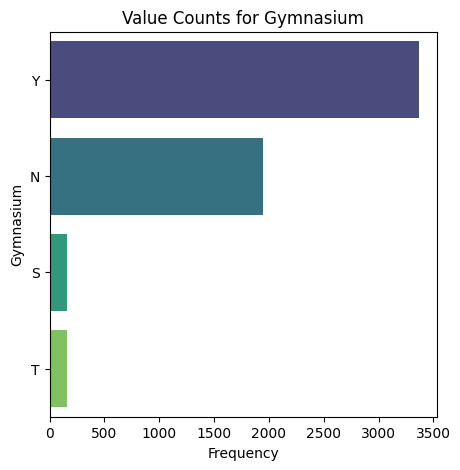

Column Name: Gymnasium
  Value: Y                    Percentage: 54.23%
  Value: N                    Percentage: 31.40%
  Value: S                    Percentage: 2.51%
  Value: T                    Percentage: 2.48%


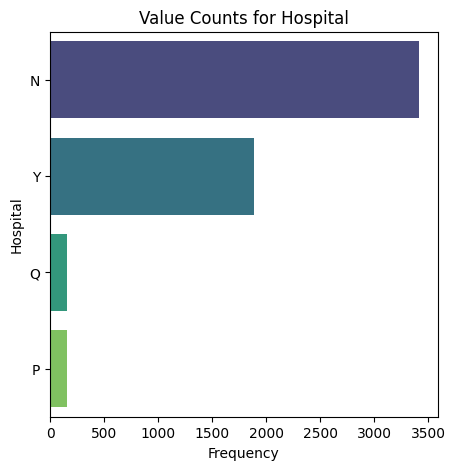

Column Name: Hospital
  Value: N                    Percentage: 55.00%
  Value: Y                    Percentage: 30.43%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


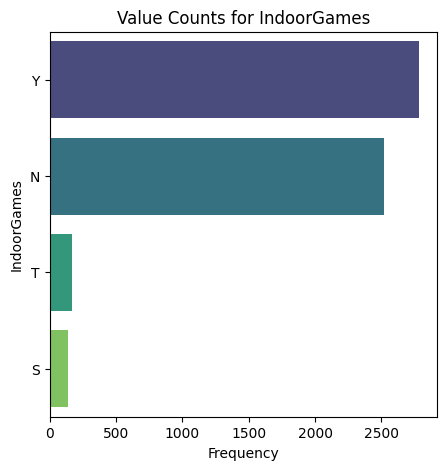

Column Name: IndoorGames
  Value: Y                    Percentage: 44.80%
  Value: N                    Percentage: 40.65%
  Value: T                    Percentage: 2.72%
  Value: S                    Percentage: 2.27%


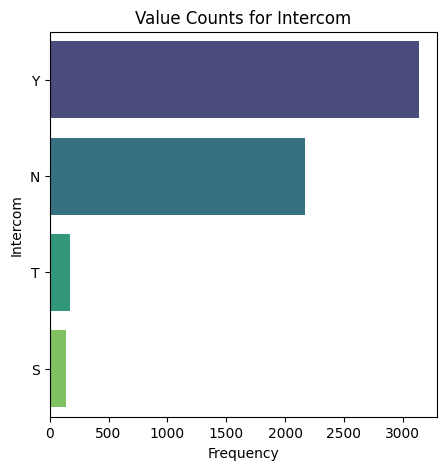

Column Name: Intercom
  Value: Y                    Percentage: 50.51%
  Value: N                    Percentage: 34.99%
  Value: T                    Percentage: 2.74%
  Value: S                    Percentage: 2.26%


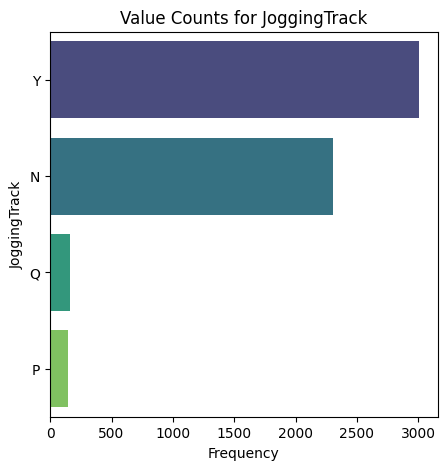

Column Name: JoggingTrack
  Value: Y                    Percentage: 48.45%
  Value: N                    Percentage: 37.14%
  Value: Q                    Percentage: 2.66%
  Value: P                    Percentage: 2.34%


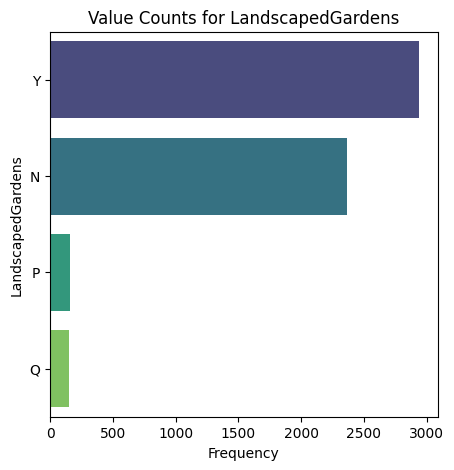

Column Name: LandscapedGardens
  Value: Y                    Percentage: 47.38%
  Value: N                    Percentage: 38.12%
  Value: P                    Percentage: 2.51%
  Value: Q                    Percentage: 2.48%


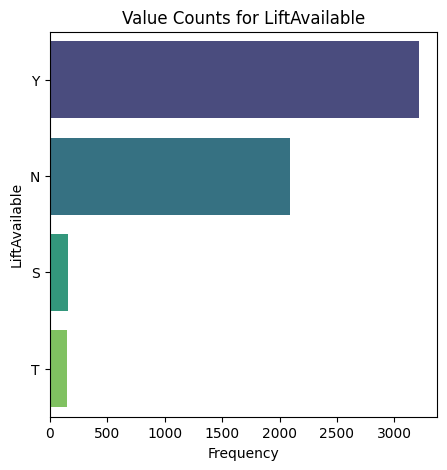

Column Name: LiftAvailable
  Value: Y                    Percentage: 51.73%
  Value: N                    Percentage: 33.75%
  Value: S                    Percentage: 2.58%
  Value: T                    Percentage: 2.42%


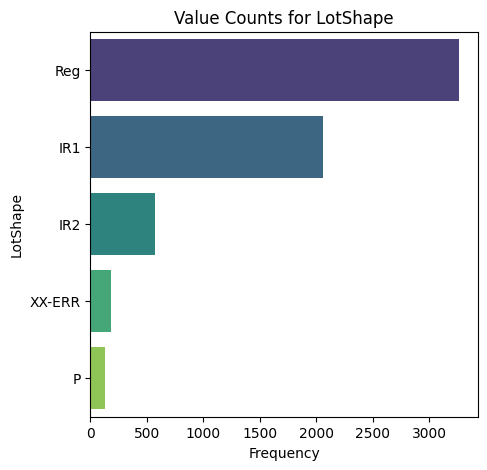

Column Name: LotShape
  Value: Reg                  Percentage: 52.68%
  Value: IR1                  Percentage: 33.16%
  Value: IR2                  Percentage: 9.17%
  Value: XX-ERR               Percentage: 2.90%
  Value: P                    Percentage: 2.09%


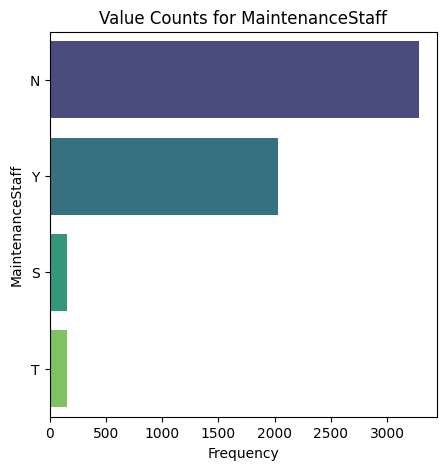

Column Name: MaintenanceStaff
  Value: N                    Percentage: 52.88%
  Value: Y                    Percentage: 32.71%
  Value: S                    Percentage: 2.55%
  Value: T                    Percentage: 2.45%


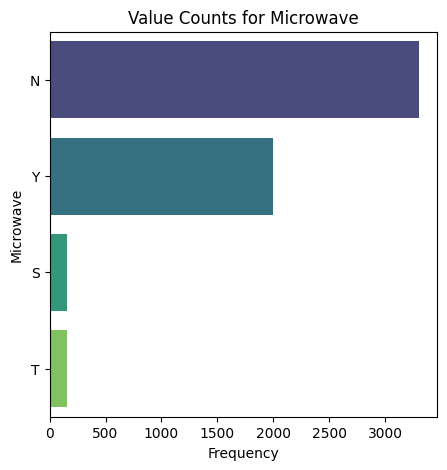

Column Name: Microwave
  Value: N                    Percentage: 53.20%
  Value: Y                    Percentage: 32.19%
  Value: S                    Percentage: 2.53%
  Value: T                    Percentage: 2.46%


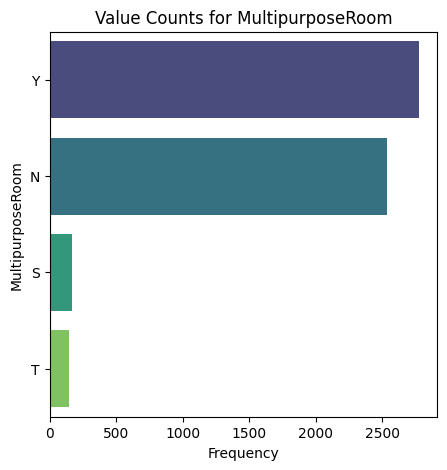

Column Name: MultipurposeRoom
  Value: Y                    Percentage: 44.69%
  Value: N                    Percentage: 40.91%
  Value: S                    Percentage: 2.66%
  Value: T                    Percentage: 2.34%


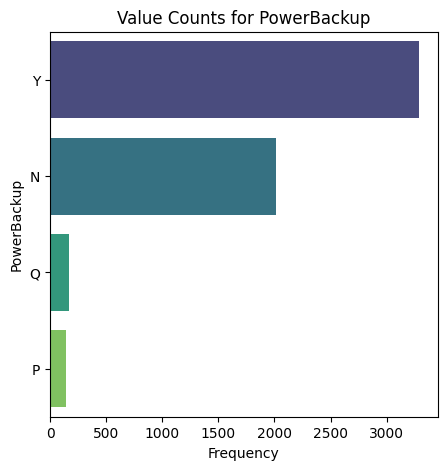

Column Name: PowerBackup
  Value: Y                    Percentage: 53.00%
  Value: N                    Percentage: 32.43%
  Value: Q                    Percentage: 2.71%
  Value: P                    Percentage: 2.29%


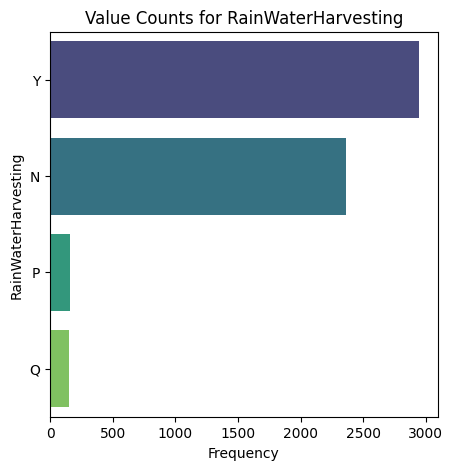

Column Name: RainWaterHarvesting
  Value: Y                    Percentage: 47.48%
  Value: N                    Percentage: 38.02%
  Value: P                    Percentage: 2.53%
  Value: Q                    Percentage: 2.46%


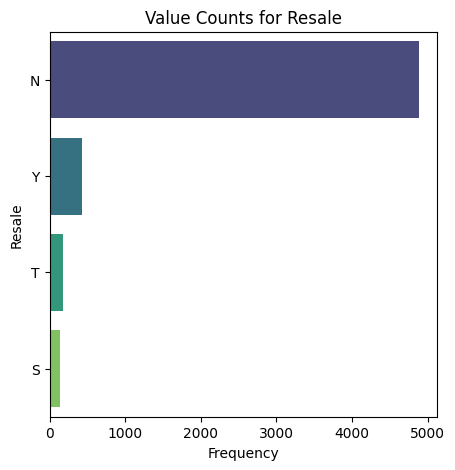

Column Name: Resale
  Value: N                    Percentage: 78.65%
  Value: Y                    Percentage: 6.80%
  Value: T                    Percentage: 2.84%
  Value: S                    Percentage: 2.16%


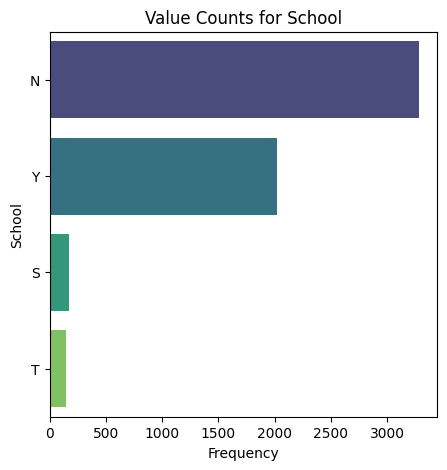

Column Name: School
  Value: N                    Percentage: 52.88%
  Value: Y                    Percentage: 32.64%
  Value: S                    Percentage: 2.72%
  Value: T                    Percentage: 2.27%


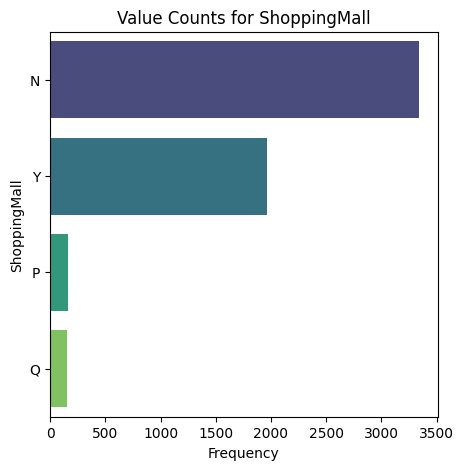

Column Name: ShoppingMall
  Value: N                    Percentage: 53.86%
  Value: Y                    Percentage: 31.67%
  Value: P                    Percentage: 2.55%
  Value: Q                    Percentage: 2.45%


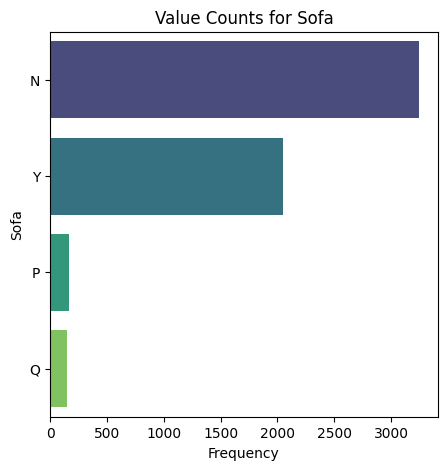

Column Name: Sofa
  Value: N                    Percentage: 52.31%
  Value: Y                    Percentage: 33.00%
  Value: P                    Percentage: 2.66%
  Value: Q                    Percentage: 2.34%


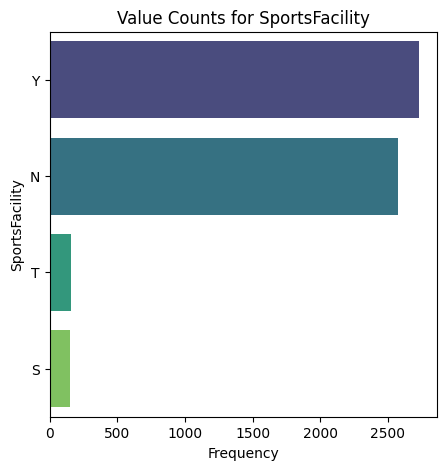

Column Name: SportsFacility
  Value: Y                    Percentage: 43.95%
  Value: N                    Percentage: 41.45%
  Value: T                    Percentage: 2.55%
  Value: S                    Percentage: 2.45%


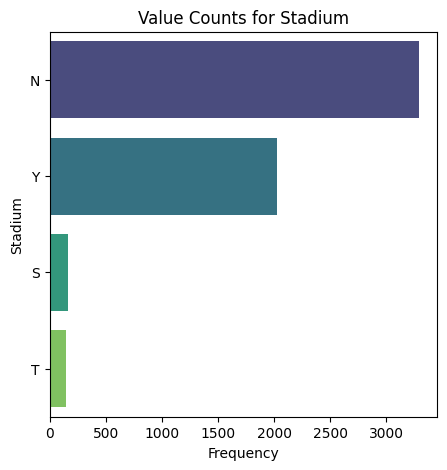

Column Name: Stadium
  Value: N                    Percentage: 52.96%
  Value: Y                    Percentage: 32.64%
  Value: S                    Percentage: 2.67%
  Value: T                    Percentage: 2.32%


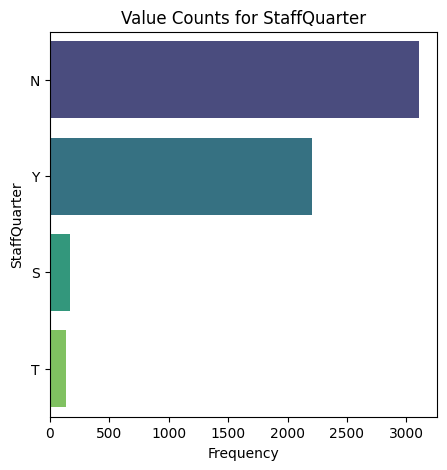

Column Name: StaffQuarter
  Value: N                    Percentage: 49.99%
  Value: Y                    Percentage: 35.51%
  Value: S                    Percentage: 2.77%
  Value: T                    Percentage: 2.22%


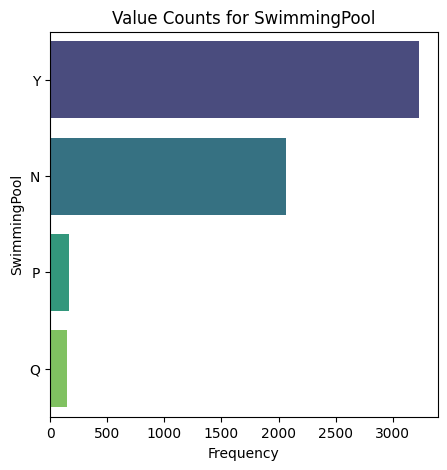

Column Name: SwimmingPool
  Value: Y                    Percentage: 52.05%
  Value: N                    Percentage: 33.30%
  Value: P                    Percentage: 2.66%
  Value: Q                    Percentage: 2.34%


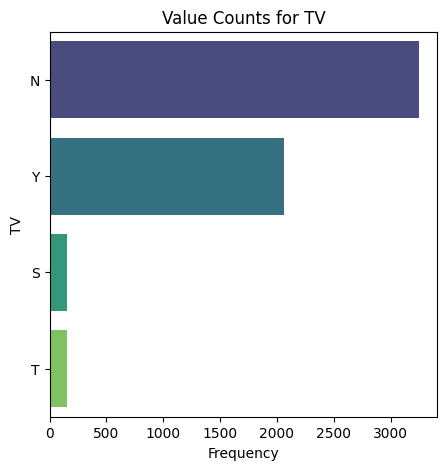

Column Name: TV
  Value: N                    Percentage: 52.33%
  Value: Y                    Percentage: 33.24%
  Value: S                    Percentage: 2.51%
  Value: T                    Percentage: 2.48%


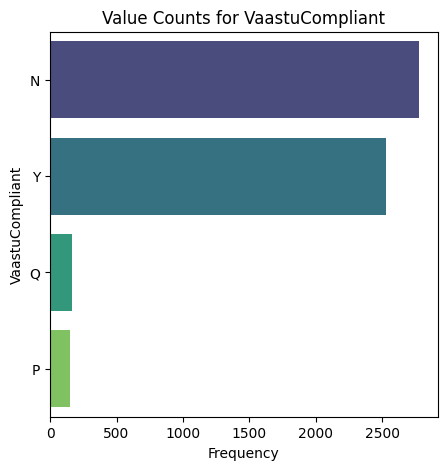

Column Name: VaastuCompliant
  Value: N                    Percentage: 44.79%
  Value: Y                    Percentage: 40.79%
  Value: Q                    Percentage: 2.63%
  Value: P                    Percentage: 2.37%


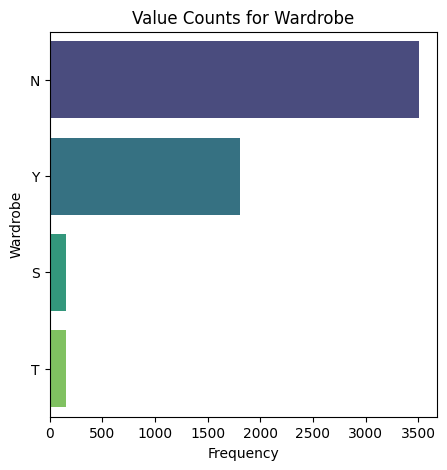

Column Name: Wardrobe
  Value: N                    Percentage: 56.45%
  Value: Y                    Percentage: 29.13%
  Value: S                    Percentage: 2.51%
  Value: T                    Percentage: 2.48%


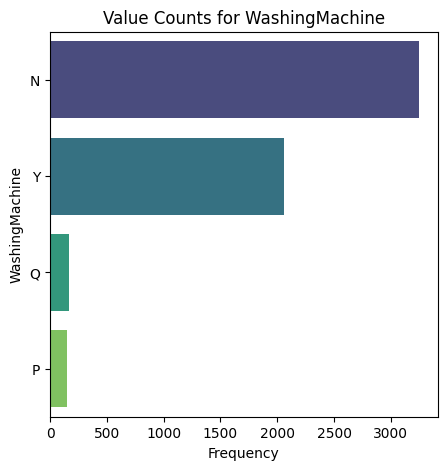

Column Name: WashingMachine
  Value: N                    Percentage: 52.36%
  Value: Y                    Percentage: 33.17%
  Value: Q                    Percentage: 2.61%
  Value: P                    Percentage: 2.38%


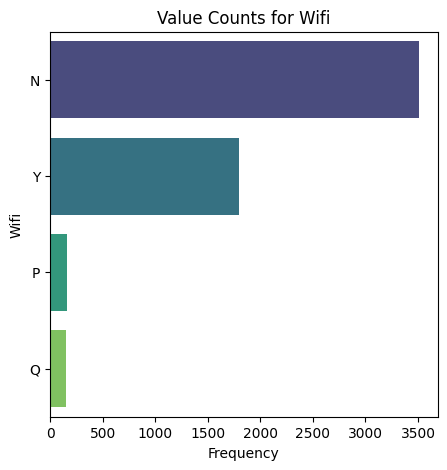

Column Name: Wifi
  Value: N                    Percentage: 56.58%
  Value: Y                    Percentage: 28.95%
  Value: P                    Percentage: 2.53%
  Value: Q                    Percentage: 2.46%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  1173
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             310            ['S', 'T']
AC                       310            ['S', 'T']
ATM                      310            ['P', 'Q']
BED                      310            ['T', 'S']
Cafeteria                310            ['Q', 'P']
CarParking               310            ['P', 'Q']
Children'splayarea       310            ['P', 'Q']
ClubHouse                310            ['Q', 'P']
DiningTable              310            ['P', 'Q

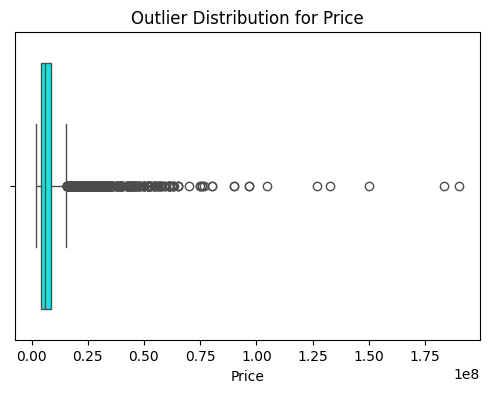

Column Name: Price
Largest 5 outliers: [127000000 132600000 150000000 183600000 190000000]



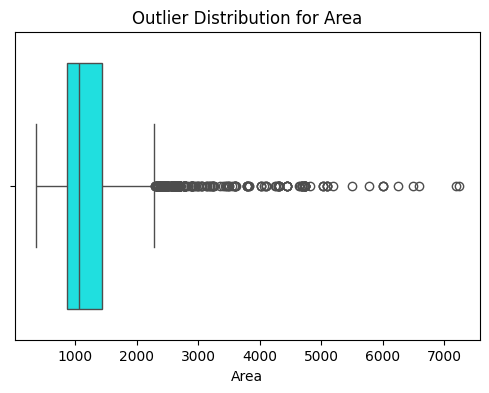

Column Name: Area
Largest 5 outliers: [6250 6500 6600 7200 7240]



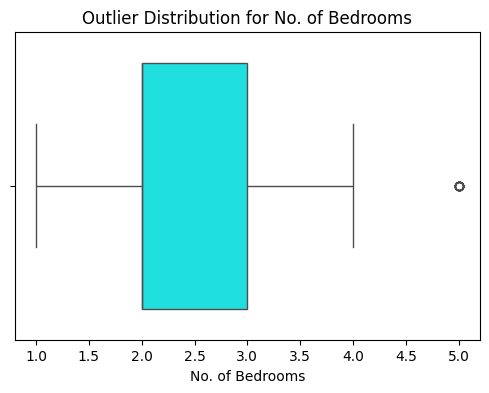

Column Name: No. of Bedrooms
Largest 5 outliers: [5]


Frequency Distribution of Categorical Column values....


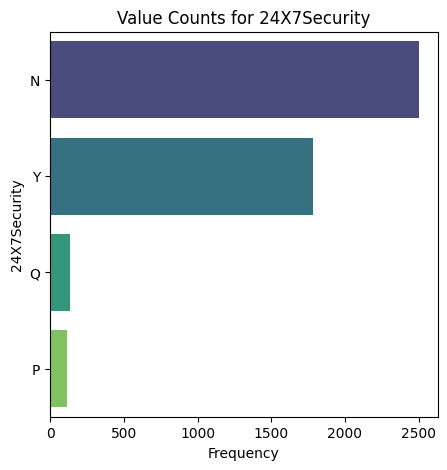

Column Name: 24X7Security
  Value: N                    Percentage: 49.94%
  Value: Y                    Percentage: 35.58%
  Value: Q                    Percentage: 2.67%
  Value: P                    Percentage: 2.33%


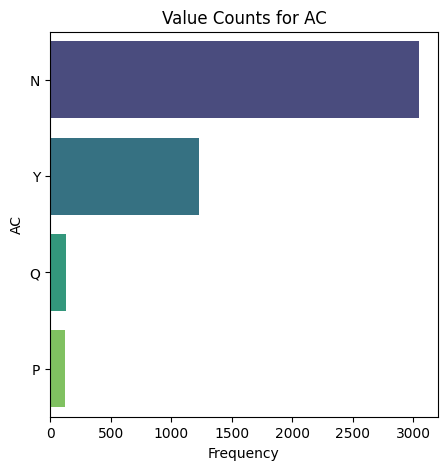

Column Name: AC
  Value: N                    Percentage: 60.83%
  Value: Y                    Percentage: 24.61%
  Value: Q                    Percentage: 2.61%
  Value: P                    Percentage: 2.39%


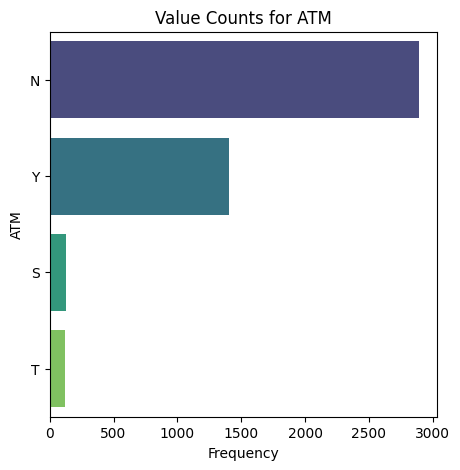

Column Name: ATM
  Value: N                    Percentage: 57.64%
  Value: Y                    Percentage: 28.04%
  Value: S                    Percentage: 2.53%
  Value: T                    Percentage: 2.47%


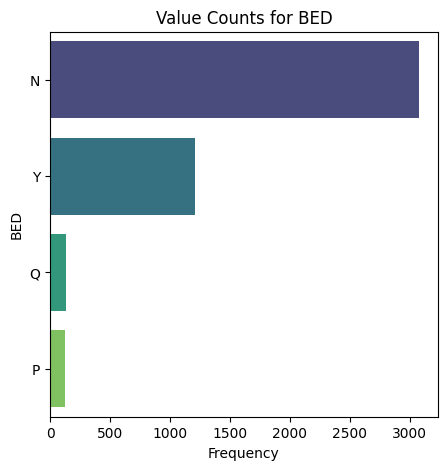

Column Name: BED
  Value: N                    Percentage: 61.43%
  Value: Y                    Percentage: 24.05%
  Value: Q                    Percentage: 2.57%
  Value: P                    Percentage: 2.43%


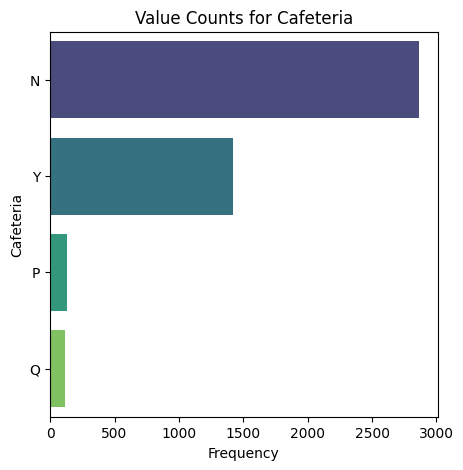

Column Name: Cafeteria
  Value: N                    Percentage: 57.16%
  Value: Y                    Percentage: 28.28%
  Value: P                    Percentage: 2.67%
  Value: Q                    Percentage: 2.33%


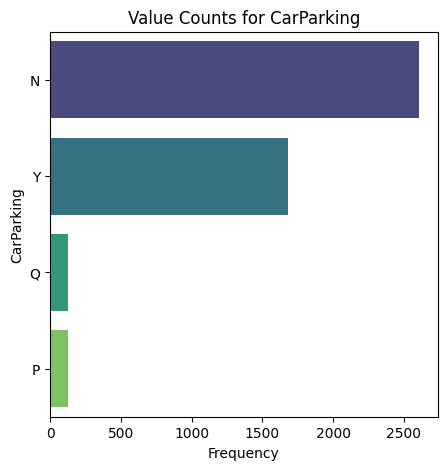

Column Name: CarParking
  Value: N                    Percentage: 52.01%
  Value: Y                    Percentage: 33.49%
  Value: Q                    Percentage: 2.53%
  Value: P                    Percentage: 2.47%


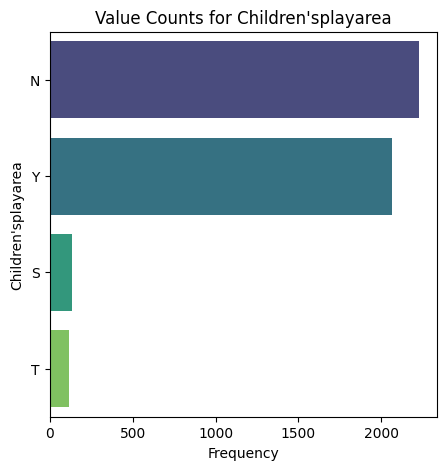

Column Name: Children'splayarea
  Value: N                    Percentage: 44.38%
  Value: Y                    Percentage: 41.16%
  Value: S                    Percentage: 2.67%
  Value: T                    Percentage: 2.33%


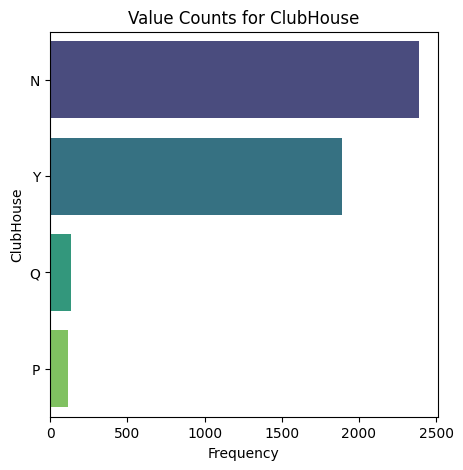

Column Name: ClubHouse
  Value: N                    Percentage: 47.67%
  Value: Y                    Percentage: 37.75%
  Value: Q                    Percentage: 2.71%
  Value: P                    Percentage: 2.29%


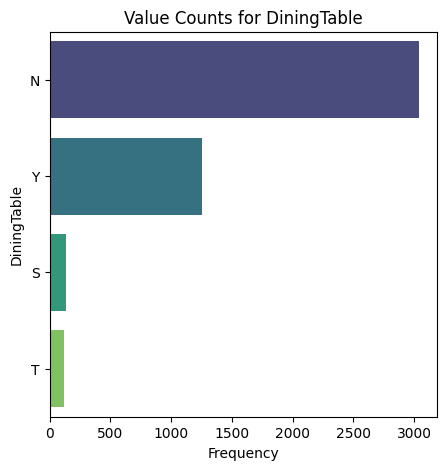

Column Name: DiningTable
  Value: N                    Percentage: 60.59%
  Value: Y                    Percentage: 24.95%
  Value: S                    Percentage: 2.69%
  Value: T                    Percentage: 2.31%


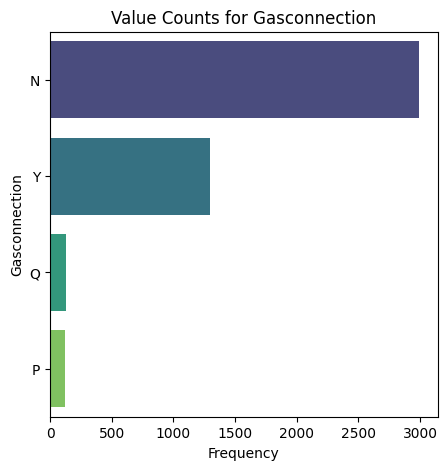

Column Name: Gasconnection
  Value: N                    Percentage: 59.71%
  Value: Y                    Percentage: 25.83%
  Value: Q                    Percentage: 2.53%
  Value: P                    Percentage: 2.47%


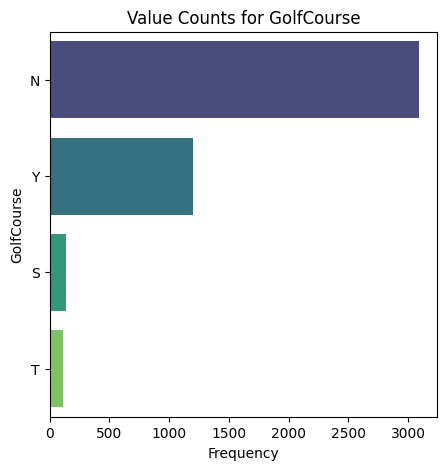

Column Name: GolfCourse
  Value: N                    Percentage: 61.61%
  Value: Y                    Percentage: 23.91%
  Value: S                    Percentage: 2.75%
  Value: T                    Percentage: 2.25%


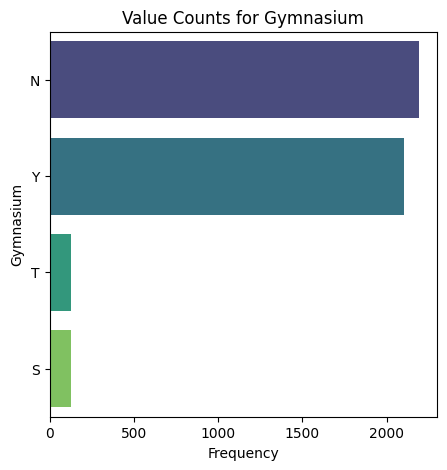

Column Name: Gymnasium
  Value: N                    Percentage: 43.68%
  Value: Y                    Percentage: 41.94%
  Value: T                    Percentage: 2.51%
  Value: S                    Percentage: 2.49%


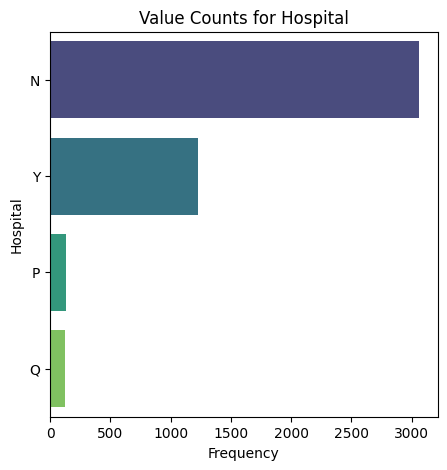

Column Name: Hospital
  Value: N                    Percentage: 61.09%
  Value: Y                    Percentage: 24.39%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.43%


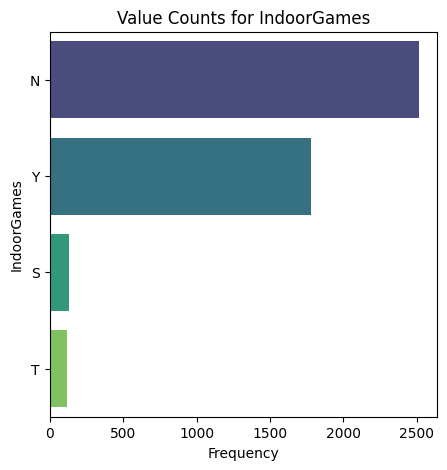

Column Name: IndoorGames
  Value: N                    Percentage: 50.12%
  Value: Y                    Percentage: 35.48%
  Value: S                    Percentage: 2.59%
  Value: T                    Percentage: 2.41%


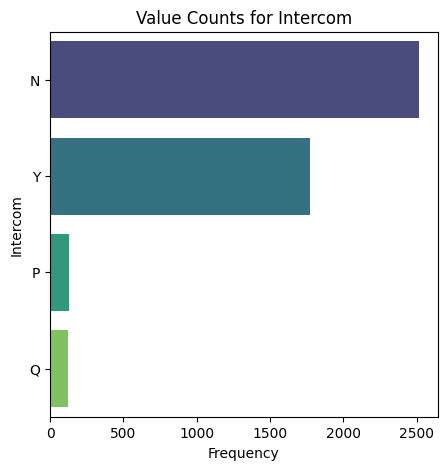

Column Name: Intercom
  Value: N                    Percentage: 50.20%
  Value: Y                    Percentage: 35.36%
  Value: P                    Percentage: 2.59%
  Value: Q                    Percentage: 2.41%


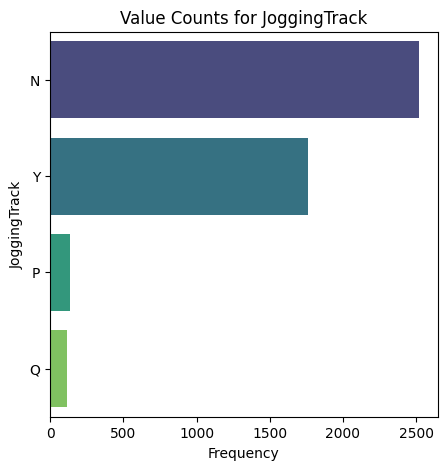

Column Name: JoggingTrack
  Value: N                    Percentage: 50.28%
  Value: Y                    Percentage: 35.12%
  Value: P                    Percentage: 2.69%
  Value: Q                    Percentage: 2.31%


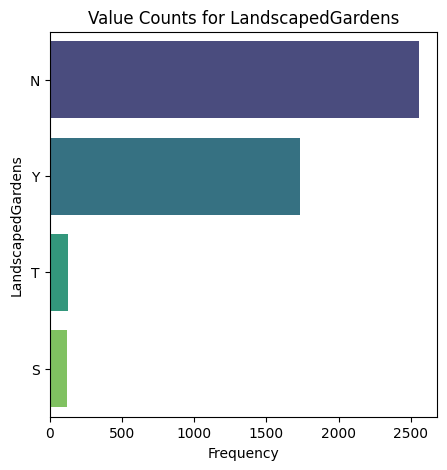

Column Name: LandscapedGardens
  Value: N                    Percentage: 50.94%
  Value: Y                    Percentage: 34.60%
  Value: T                    Percentage: 2.59%
  Value: S                    Percentage: 2.41%


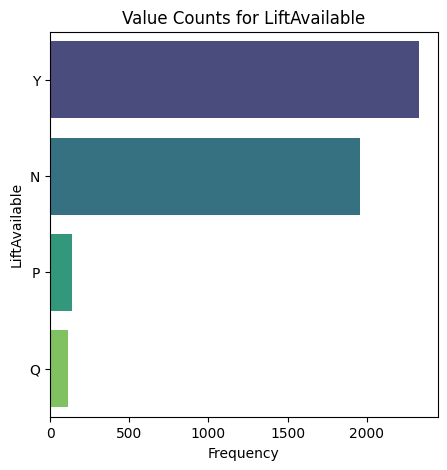

Column Name: LiftAvailable
  Value: Y                    Percentage: 46.49%
  Value: N                    Percentage: 39.09%
  Value: P                    Percentage: 2.77%
  Value: Q                    Percentage: 2.23%


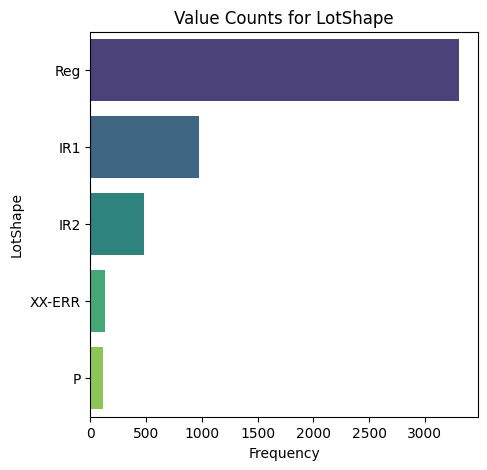

Column Name: LotShape
  Value: Reg                  Percentage: 66.04%
  Value: IR1                  Percentage: 19.39%
  Value: IR2                  Percentage: 9.57%
  Value: XX-ERR               Percentage: 2.67%
  Value: P                    Percentage: 2.33%


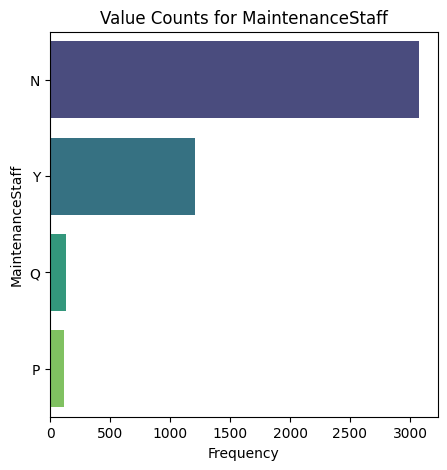

Column Name: MaintenanceStaff
  Value: N                    Percentage: 61.37%
  Value: Y                    Percentage: 24.07%
  Value: Q                    Percentage: 2.69%
  Value: P                    Percentage: 2.31%


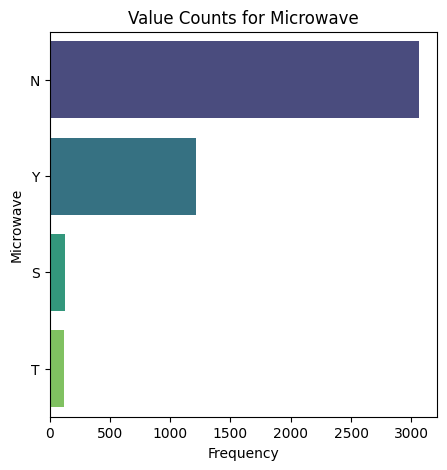

Column Name: Microwave
  Value: N                    Percentage: 61.05%
  Value: Y                    Percentage: 24.21%
  Value: S                    Percentage: 2.57%
  Value: T                    Percentage: 2.43%


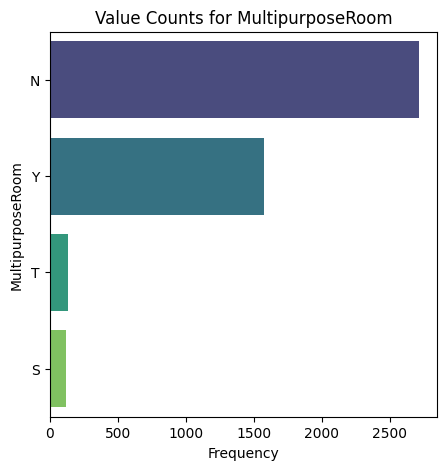

Column Name: MultipurposeRoom
  Value: N                    Percentage: 54.07%
  Value: Y                    Percentage: 31.37%
  Value: T                    Percentage: 2.65%
  Value: S                    Percentage: 2.35%


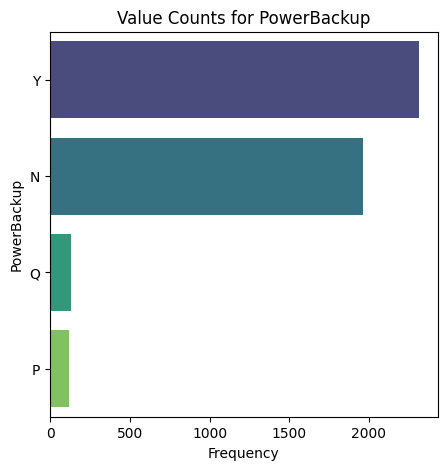

Column Name: PowerBackup
  Value: Y                    Percentage: 46.17%
  Value: N                    Percentage: 39.13%
  Value: Q                    Percentage: 2.63%
  Value: P                    Percentage: 2.37%


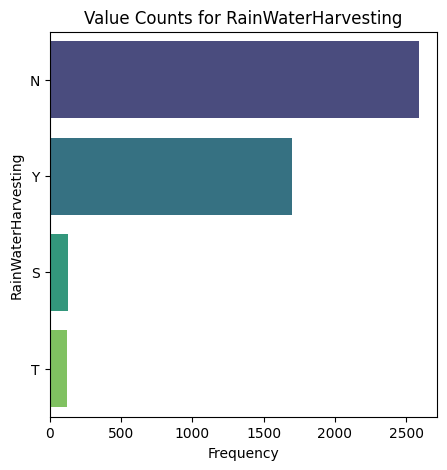

Column Name: RainWaterHarvesting
  Value: N                    Percentage: 51.60%
  Value: Y                    Percentage: 33.94%
  Value: S                    Percentage: 2.51%
  Value: T                    Percentage: 2.49%


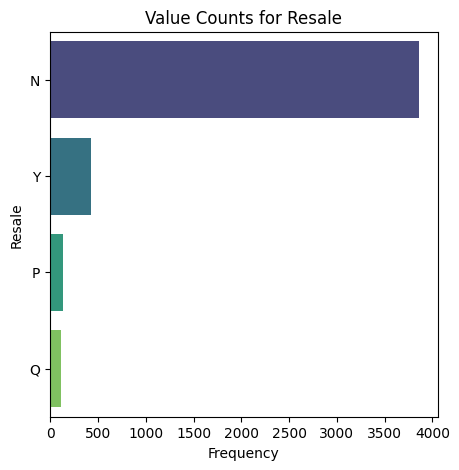

Column Name: Resale
  Value: N                    Percentage: 77.00%
  Value: Y                    Percentage: 8.56%
  Value: P                    Percentage: 2.75%
  Value: Q                    Percentage: 2.25%


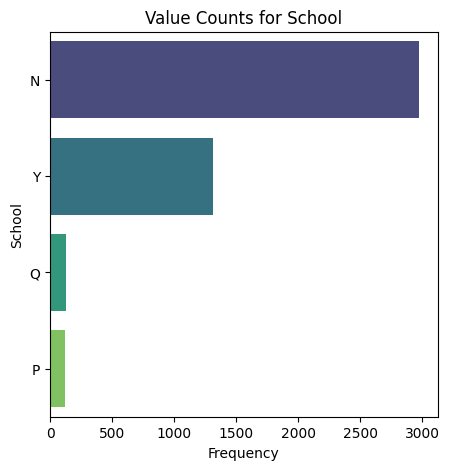

Column Name: School
  Value: N                    Percentage: 59.31%
  Value: Y                    Percentage: 26.13%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


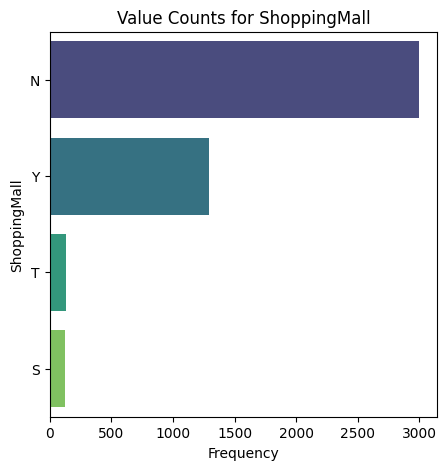

Column Name: ShoppingMall
  Value: N                    Percentage: 59.71%
  Value: Y                    Percentage: 25.81%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.43%


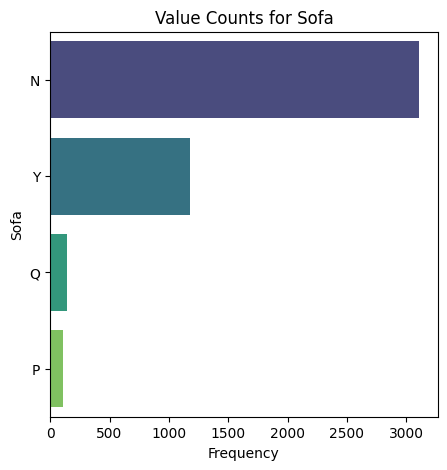

Column Name: Sofa
  Value: N                    Percentage: 62.01%
  Value: Y                    Percentage: 23.43%
  Value: Q                    Percentage: 2.83%
  Value: P                    Percentage: 2.17%


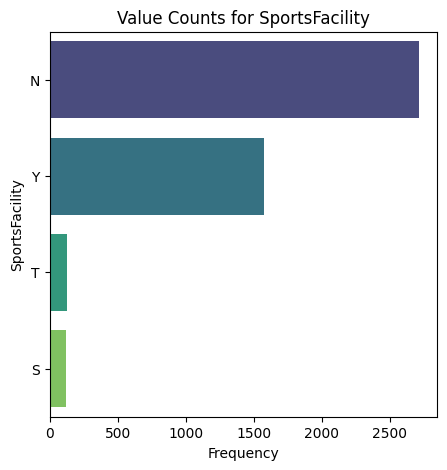

Column Name: SportsFacility
  Value: N                    Percentage: 54.13%
  Value: Y                    Percentage: 31.45%
  Value: T                    Percentage: 2.61%
  Value: S                    Percentage: 2.39%


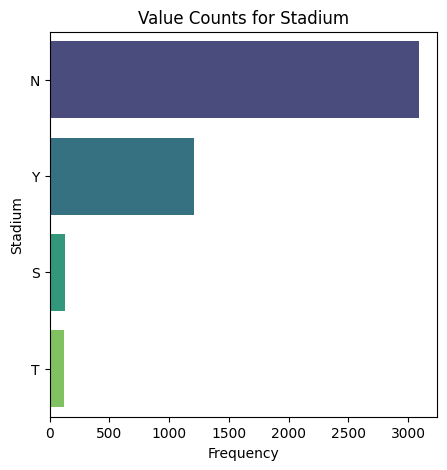

Column Name: Stadium
  Value: N                    Percentage: 61.63%
  Value: Y                    Percentage: 24.03%
  Value: S                    Percentage: 2.63%
  Value: T                    Percentage: 2.37%


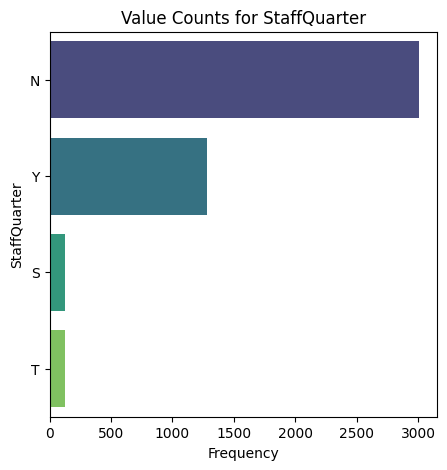

Column Name: StaffQuarter
  Value: N                    Percentage: 59.95%
  Value: Y                    Percentage: 25.57%
  Value: S                    Percentage: 2.55%
  Value: T                    Percentage: 2.45%


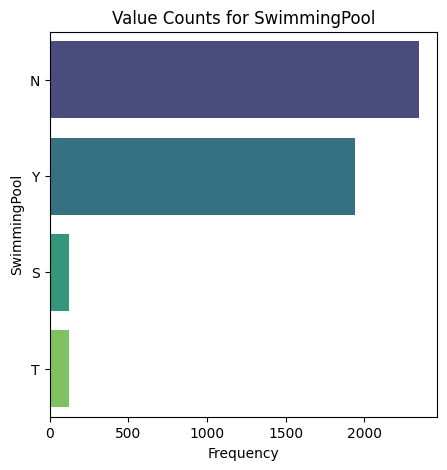

Column Name: SwimmingPool
  Value: N                    Percentage: 46.81%
  Value: Y                    Percentage: 38.67%
  Value: S                    Percentage: 2.51%
  Value: T                    Percentage: 2.49%


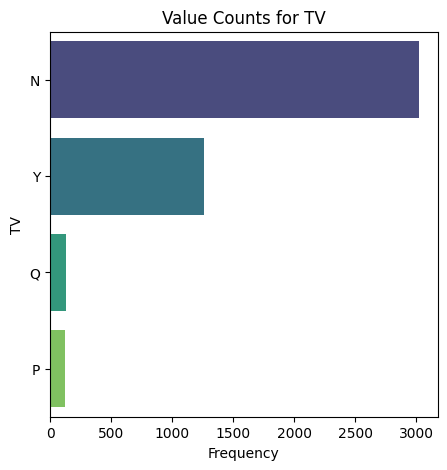

Column Name: TV
  Value: N                    Percentage: 60.29%
  Value: Y                    Percentage: 25.17%
  Value: Q                    Percentage: 2.63%
  Value: P                    Percentage: 2.37%


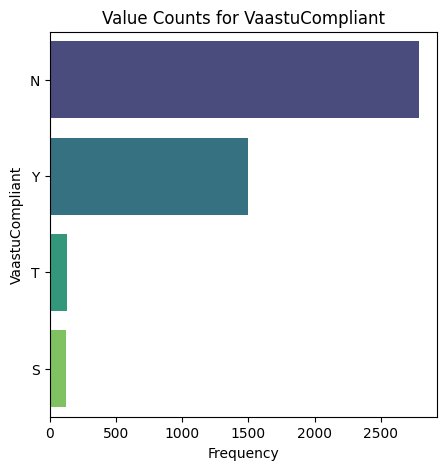

Column Name: VaastuCompliant
  Value: N                    Percentage: 55.54%
  Value: Y                    Percentage: 29.90%
  Value: T                    Percentage: 2.61%
  Value: S                    Percentage: 2.39%


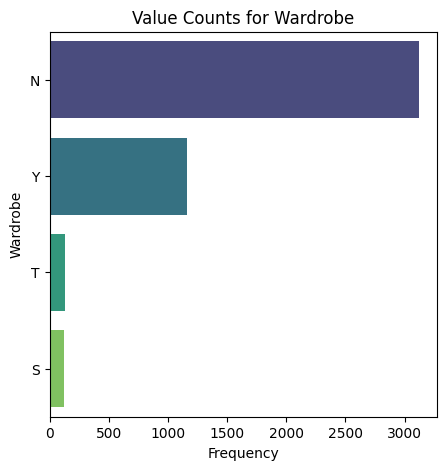

Column Name: Wardrobe
  Value: N                    Percentage: 62.21%
  Value: Y                    Percentage: 23.23%
  Value: T                    Percentage: 2.51%
  Value: S                    Percentage: 2.49%


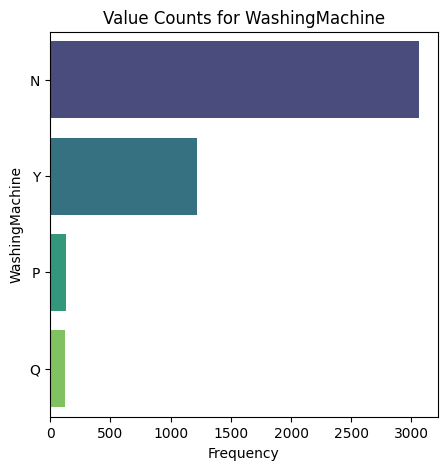

Column Name: WashingMachine
  Value: N                    Percentage: 61.11%
  Value: Y                    Percentage: 24.35%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.43%


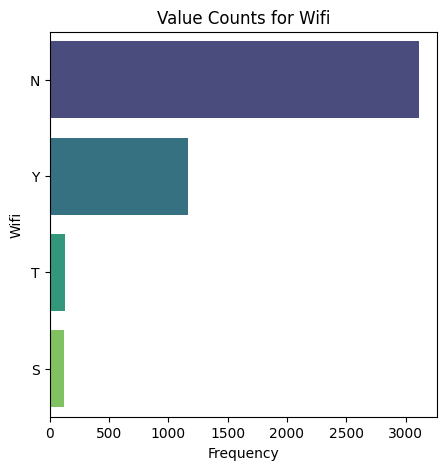

Column Name: Wifi
  Value: N                    Percentage: 62.05%
  Value: Y                    Percentage: 23.33%
  Value: T                    Percentage: 2.59%
  Value: S                    Percentage: 2.41%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  855
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             251            ['Q', 'P']
AC                       251            ['Q', 'P']
ATM                      251            ['S', 'T']
BED                      251            ['Q', 'P']
Cafeteria                251            ['P', 'Q']
CarParking               251            ['Q', 'P']
Children'splayarea       251            ['S', 'T']
ClubHouse                251            ['Q', 'P']
DiningTable              251            ['S', 'T'

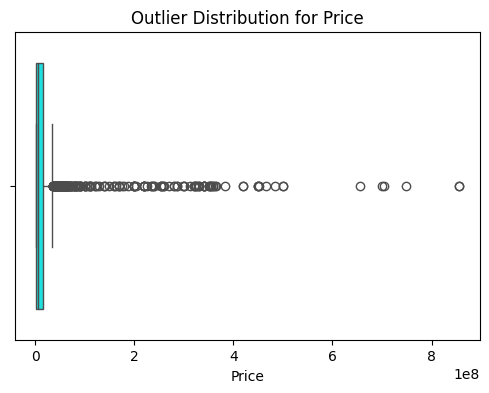

Column Name: Price
Largest 5 outliers: [654599999 700000000 704400000 748100000 854599999]



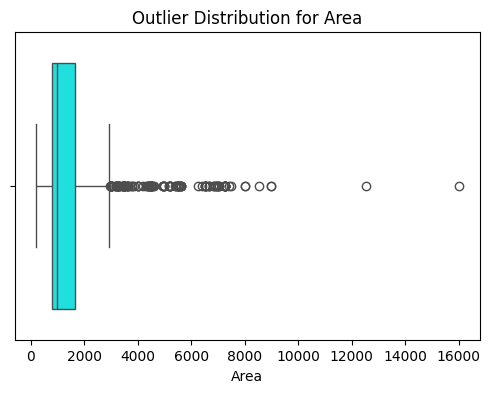

Column Name: Area
Largest 5 outliers: [ 8000  8521  9000 12552 16000]



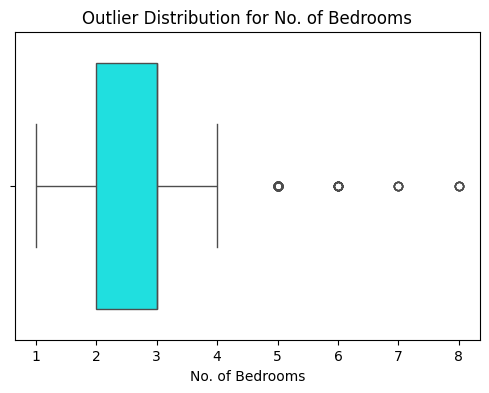

Column Name: No. of Bedrooms
Largest 5 outliers: [5 6 7 8]


Frequency Distribution of Categorical Column values....


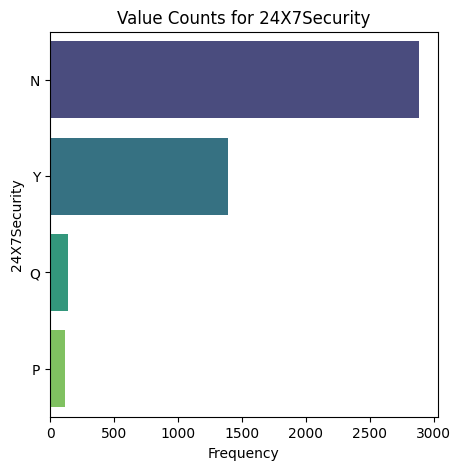

Column Name: 24X7Security
  Value: N                    Percentage: 57.74%
  Value: Y                    Percentage: 27.79%
  Value: Q                    Percentage: 2.74%
  Value: P                    Percentage: 2.26%


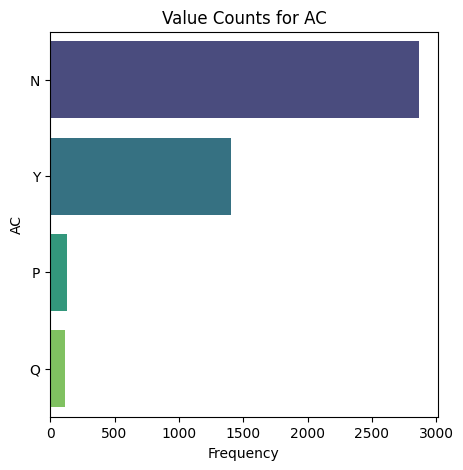

Column Name: AC
  Value: N                    Percentage: 57.36%
  Value: Y                    Percentage: 28.07%
  Value: P                    Percentage: 2.62%
  Value: Q                    Percentage: 2.38%


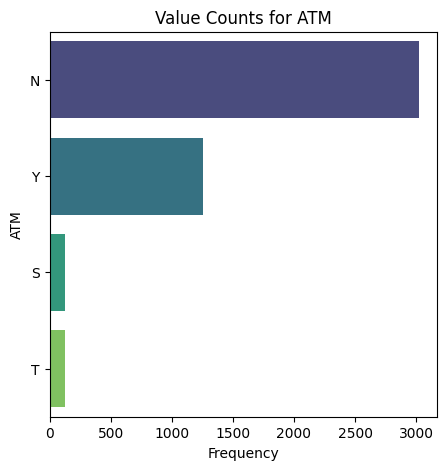

Column Name: ATM
  Value: N                    Percentage: 60.44%
  Value: Y                    Percentage: 25.07%
  Value: S                    Percentage: 2.56%
  Value: T                    Percentage: 2.44%


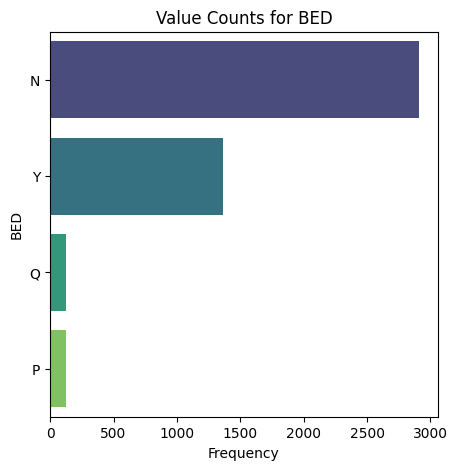

Column Name: BED
  Value: N                    Percentage: 58.24%
  Value: Y                    Percentage: 27.31%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.48%


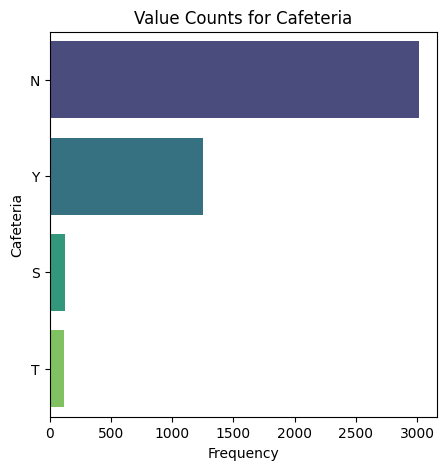

Column Name: Cafeteria
  Value: N                    Percentage: 60.30%
  Value: Y                    Percentage: 24.99%
  Value: S                    Percentage: 2.58%
  Value: T                    Percentage: 2.42%


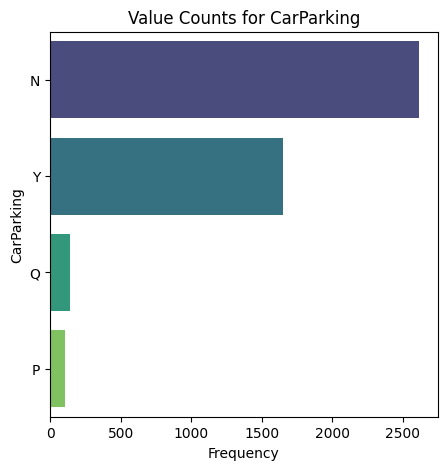

Column Name: CarParking
  Value: N                    Percentage: 52.36%
  Value: Y                    Percentage: 33.03%
  Value: Q                    Percentage: 2.88%
  Value: P                    Percentage: 2.12%


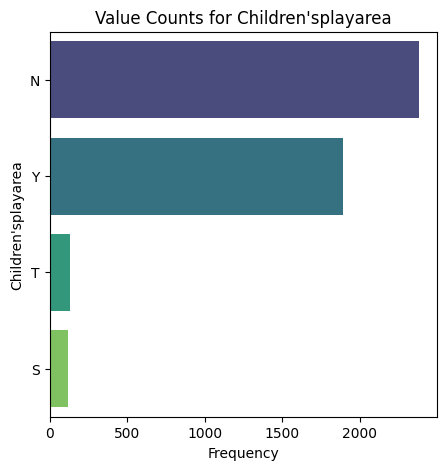

Column Name: Children'splayarea
  Value: N                    Percentage: 47.60%
  Value: Y                    Percentage: 37.86%
  Value: T                    Percentage: 2.64%
  Value: S                    Percentage: 2.36%


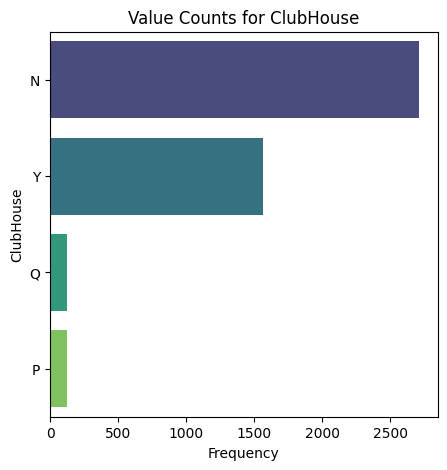

Column Name: ClubHouse
  Value: N                    Percentage: 54.26%
  Value: Y                    Percentage: 31.35%
  Value: Q                    Percentage: 2.54%
  Value: P                    Percentage: 2.46%


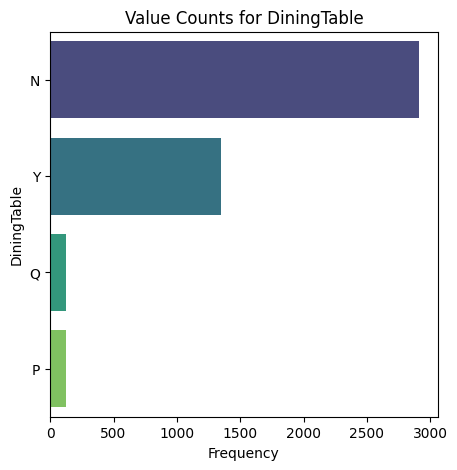

Column Name: DiningTable
  Value: N                    Percentage: 58.26%
  Value: Y                    Percentage: 27.05%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.48%


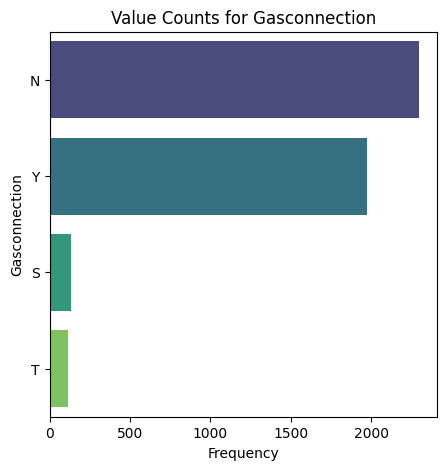

Column Name: Gasconnection
  Value: N                    Percentage: 45.94%
  Value: Y                    Percentage: 39.50%
  Value: S                    Percentage: 2.68%
  Value: T                    Percentage: 2.32%


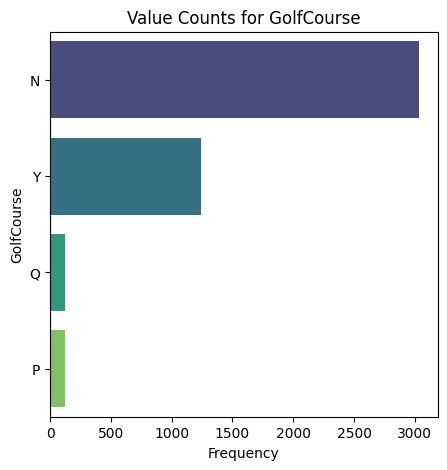

Column Name: GolfCourse
  Value: N                    Percentage: 60.74%
  Value: Y                    Percentage: 24.81%
  Value: Q                    Percentage: 2.50%
  Value: P                    Percentage: 2.50%


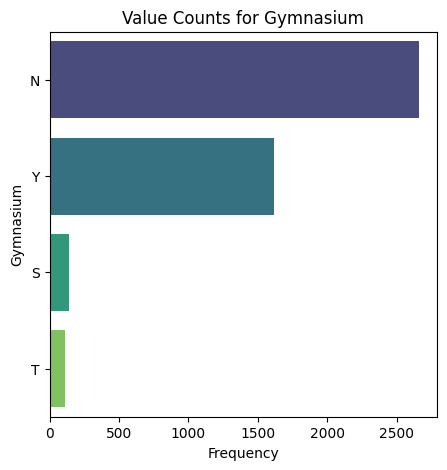

Column Name: Gymnasium
  Value: N                    Percentage: 53.18%
  Value: Y                    Percentage: 32.33%
  Value: S                    Percentage: 2.72%
  Value: T                    Percentage: 2.28%


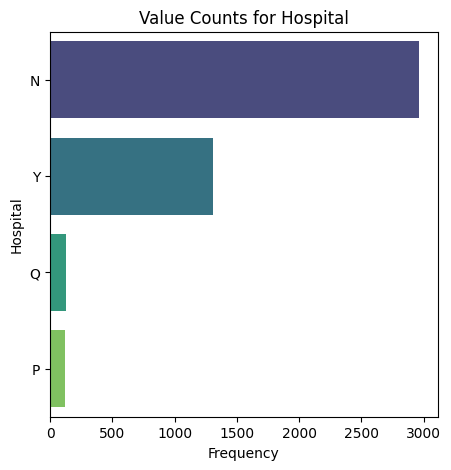

Column Name: Hospital
  Value: N                    Percentage: 59.32%
  Value: Y                    Percentage: 26.13%
  Value: Q                    Percentage: 2.58%
  Value: P                    Percentage: 2.42%


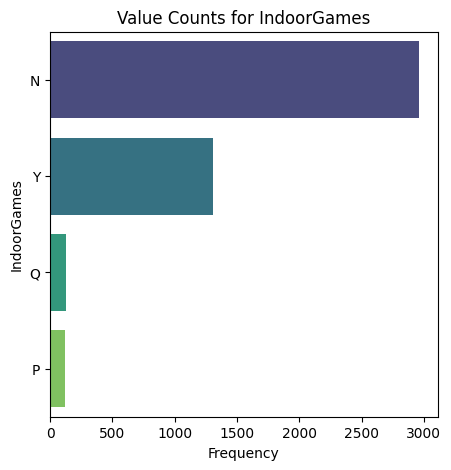

Column Name: IndoorGames
  Value: N                    Percentage: 59.26%
  Value: Y                    Percentage: 26.23%
  Value: Q                    Percentage: 2.54%
  Value: P                    Percentage: 2.46%


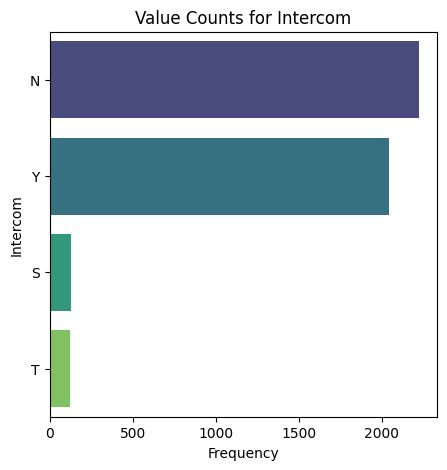

Column Name: Intercom
  Value: N                    Percentage: 44.50%
  Value: Y                    Percentage: 40.96%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


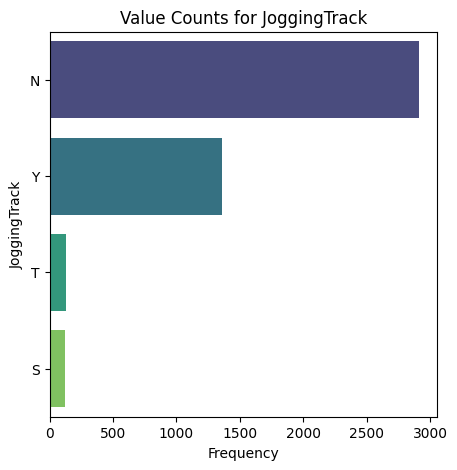

Column Name: JoggingTrack
  Value: N                    Percentage: 58.22%
  Value: Y                    Percentage: 27.21%
  Value: T                    Percentage: 2.60%
  Value: S                    Percentage: 2.40%


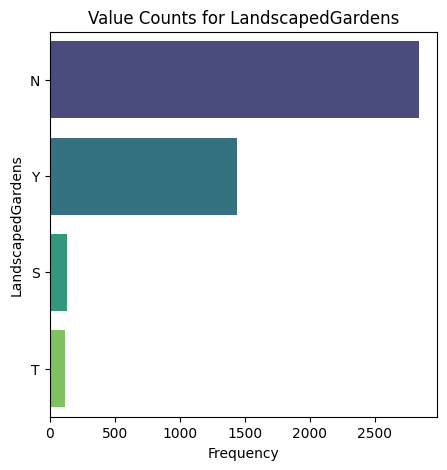

Column Name: LandscapedGardens
  Value: N                    Percentage: 56.80%
  Value: Y                    Percentage: 28.79%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


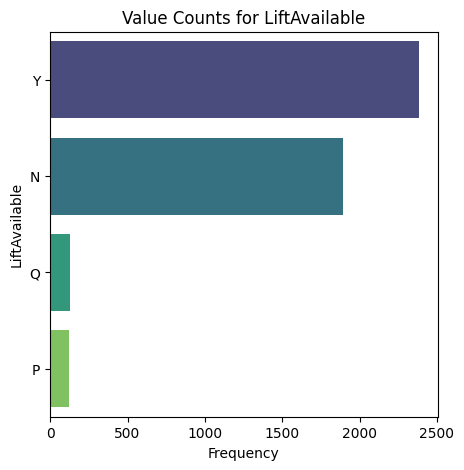

Column Name: LiftAvailable
  Value: Y                    Percentage: 47.72%
  Value: N                    Percentage: 37.82%
  Value: Q                    Percentage: 2.54%
  Value: P                    Percentage: 2.46%


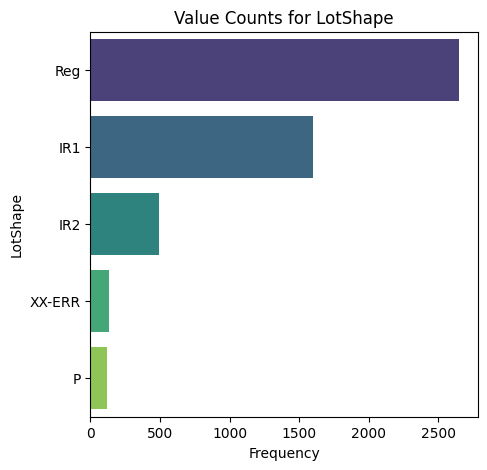

Column Name: LotShape
  Value: Reg                  Percentage: 53.04%
  Value: IR1                  Percentage: 32.05%
  Value: IR2                  Percentage: 9.90%
  Value: XX-ERR               Percentage: 2.62%
  Value: P                    Percentage: 2.38%


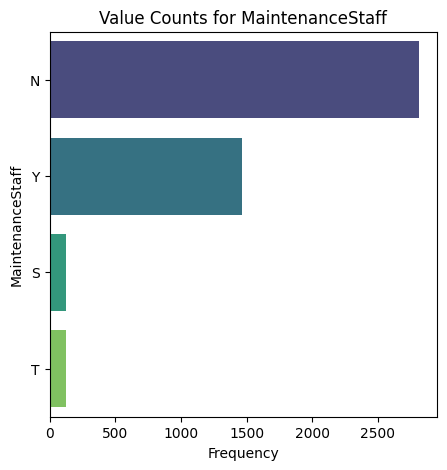

Column Name: MaintenanceStaff
  Value: N                    Percentage: 56.22%
  Value: Y                    Percentage: 29.23%
  Value: S                    Percentage: 2.52%
  Value: T                    Percentage: 2.48%


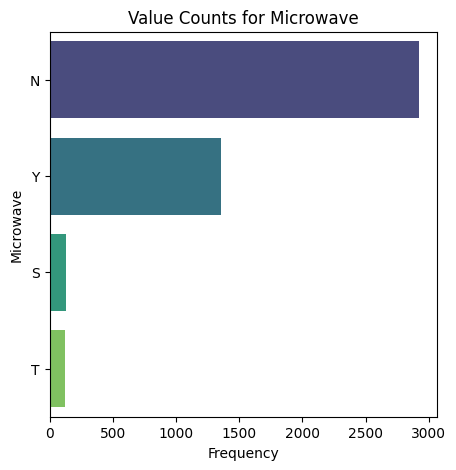

Column Name: Microwave
  Value: N                    Percentage: 58.44%
  Value: Y                    Percentage: 27.21%
  Value: S                    Percentage: 2.56%
  Value: T                    Percentage: 2.44%


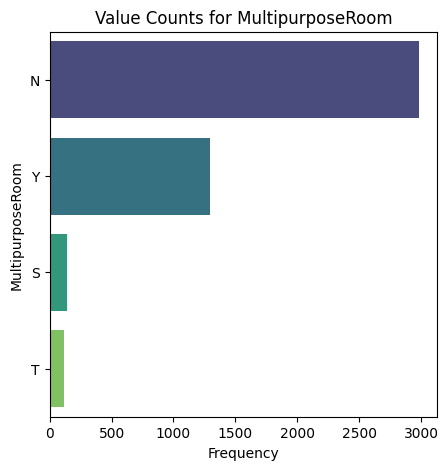

Column Name: MultipurposeRoom
  Value: N                    Percentage: 59.62%
  Value: Y                    Percentage: 25.87%
  Value: S                    Percentage: 2.76%
  Value: T                    Percentage: 2.24%


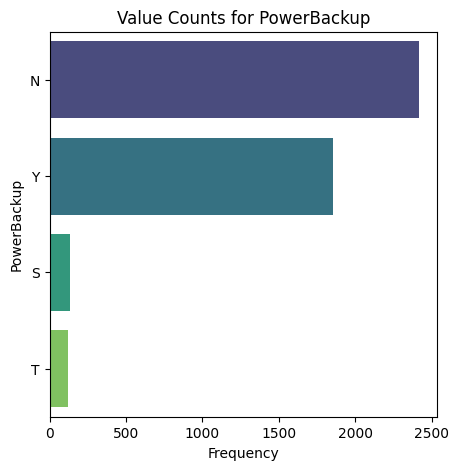

Column Name: PowerBackup
  Value: N                    Percentage: 48.34%
  Value: Y                    Percentage: 37.11%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


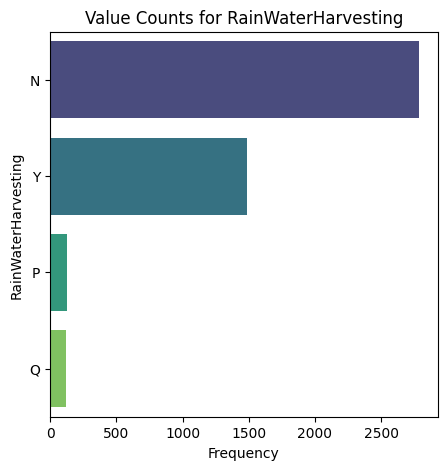

Column Name: RainWaterHarvesting
  Value: N                    Percentage: 55.76%
  Value: Y                    Percentage: 29.71%
  Value: P                    Percentage: 2.54%
  Value: Q                    Percentage: 2.46%


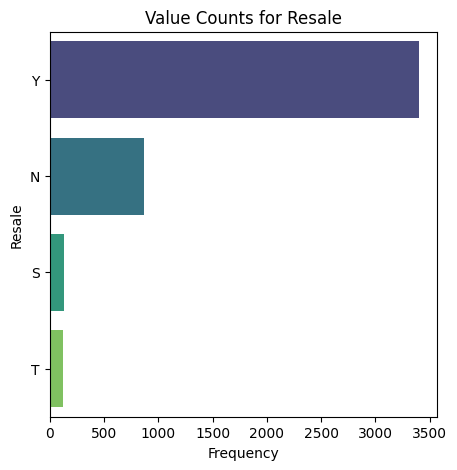

Column Name: Resale
  Value: Y                    Percentage: 67.99%
  Value: N                    Percentage: 17.45%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


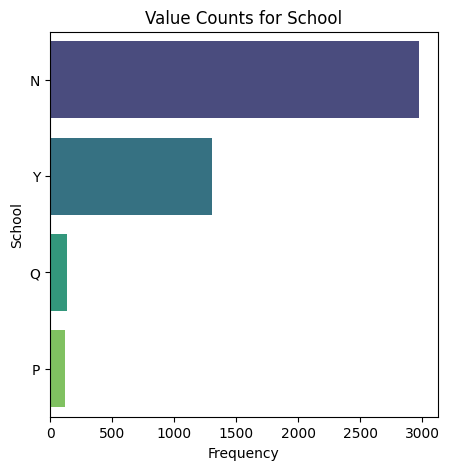

Column Name: School
  Value: N                    Percentage: 59.54%
  Value: Y                    Percentage: 26.07%
  Value: Q                    Percentage: 2.66%
  Value: P                    Percentage: 2.34%


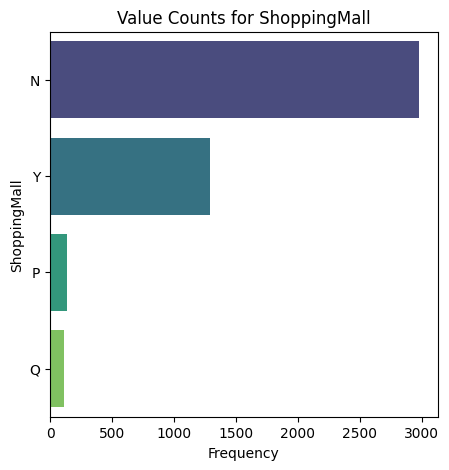

Column Name: ShoppingMall
  Value: N                    Percentage: 59.60%
  Value: Y                    Percentage: 25.77%
  Value: P                    Percentage: 2.74%
  Value: Q                    Percentage: 2.26%


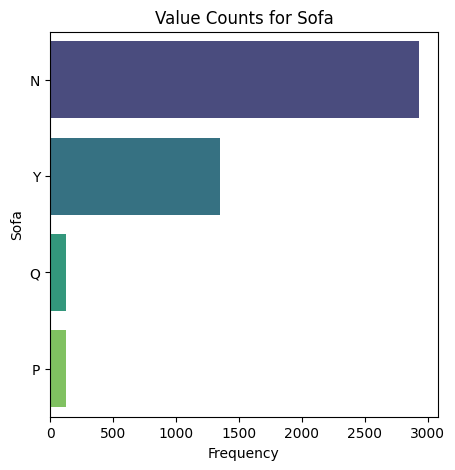

Column Name: Sofa
  Value: N                    Percentage: 58.66%
  Value: Y                    Percentage: 27.01%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.48%


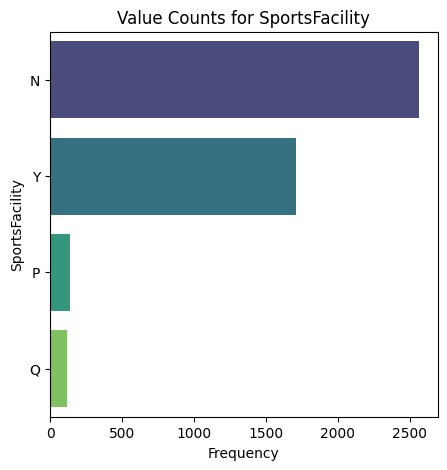

Column Name: SportsFacility
  Value: N                    Percentage: 51.32%
  Value: Y                    Percentage: 34.17%
  Value: P                    Percentage: 2.70%
  Value: Q                    Percentage: 2.30%


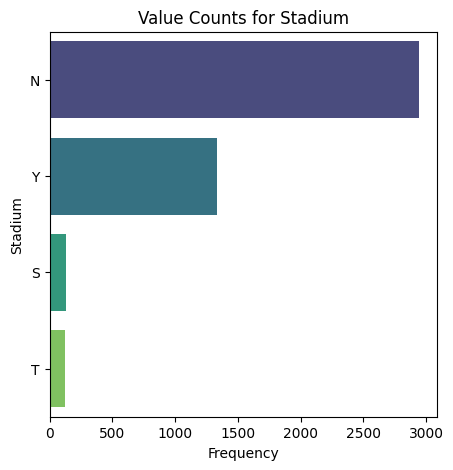

Column Name: Stadium
  Value: N                    Percentage: 58.82%
  Value: Y                    Percentage: 26.69%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


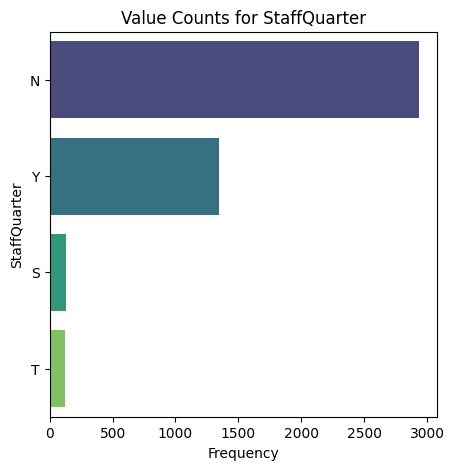

Column Name: StaffQuarter
  Value: N                    Percentage: 58.68%
  Value: Y                    Percentage: 26.89%
  Value: S                    Percentage: 2.52%
  Value: T                    Percentage: 2.48%


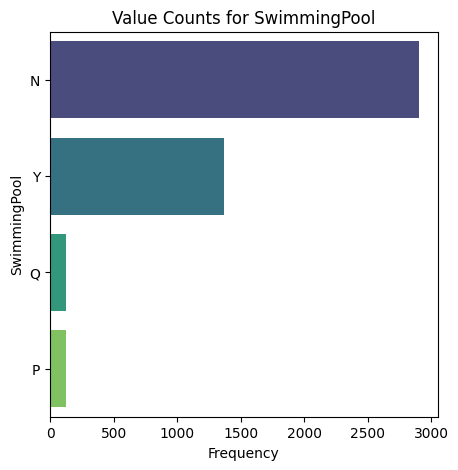

Column Name: SwimmingPool
  Value: N                    Percentage: 58.12%
  Value: Y                    Percentage: 27.37%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.48%


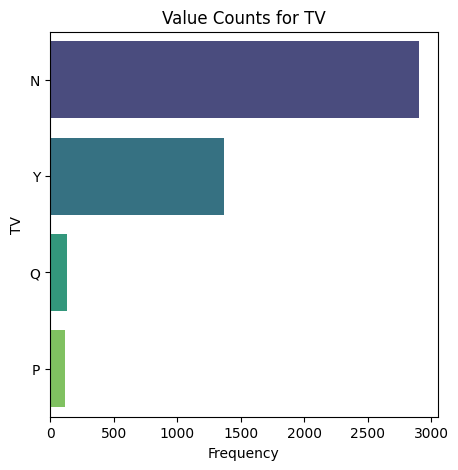

Column Name: TV
  Value: N                    Percentage: 58.16%
  Value: Y                    Percentage: 27.47%
  Value: Q                    Percentage: 2.68%
  Value: P                    Percentage: 2.32%


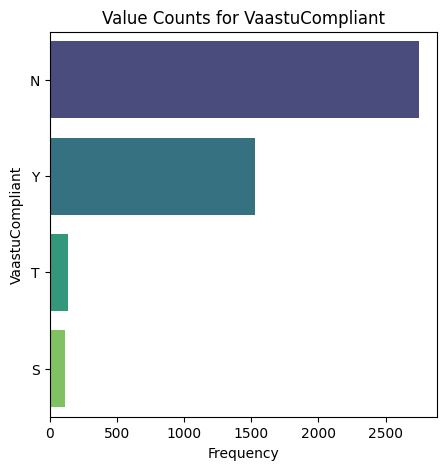

Column Name: VaastuCompliant
  Value: N                    Percentage: 54.96%
  Value: Y                    Percentage: 30.57%
  Value: T                    Percentage: 2.74%
  Value: S                    Percentage: 2.26%


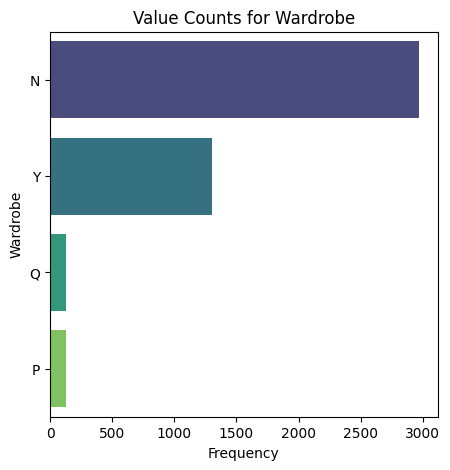

Column Name: Wardrobe
  Value: N                    Percentage: 59.44%
  Value: Y                    Percentage: 25.99%
  Value: Q                    Percentage: 2.50%
  Value: P                    Percentage: 2.50%


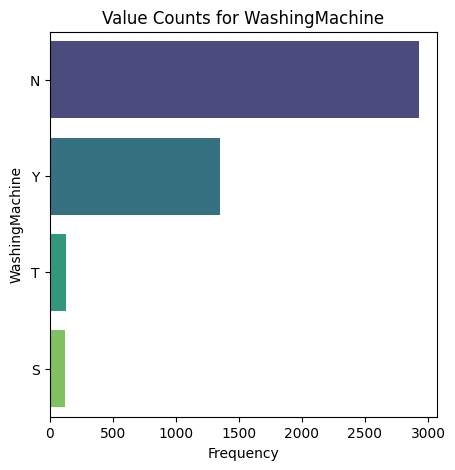

Column Name: WashingMachine
  Value: N                    Percentage: 58.54%
  Value: Y                    Percentage: 27.03%
  Value: T                    Percentage: 2.52%
  Value: S                    Percentage: 2.48%


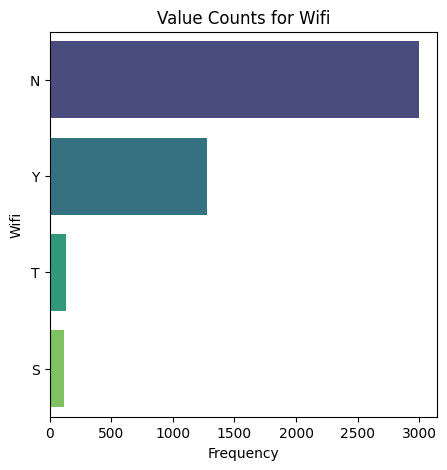

Column Name: Wifi
  Value: N                    Percentage: 59.92%
  Value: Y                    Percentage: 25.51%
  Value: T                    Percentage: 2.62%
  Value: S                    Percentage: 2.38%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  495
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             250            ['Q', 'P']
AC                       250            ['P', 'Q']
ATM                      250            ['S', 'T']
BED                      250            ['Q', 'P']
Cafeteria                250            ['S', 'T']
CarParking               250            ['Q', 'P']
Children'splayarea       250            ['T', 'S']
ClubHouse                250            ['Q', 'P']
DiningTable              250            ['Q', 'P'

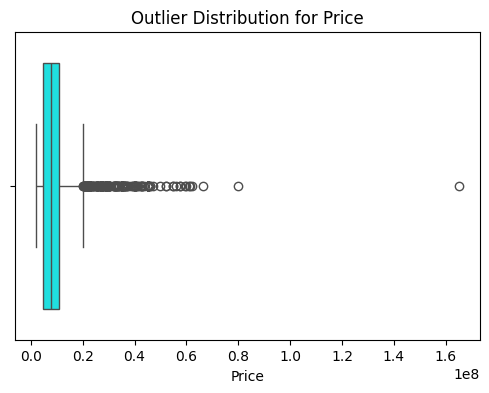

Column Name: Price
Largest 5 outliers: [ 61400000  62300000  66400000  80000000 165000000]



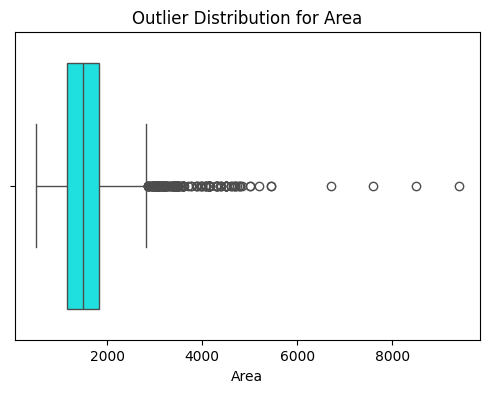

Column Name: Area
Largest 5 outliers: [5440 6718 7600 8500 9400]



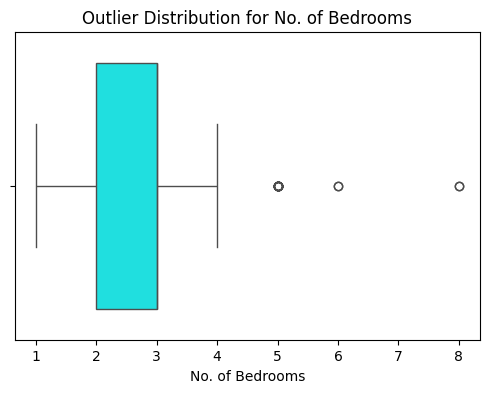

Column Name: No. of Bedrooms
Largest 5 outliers: [5 6 8]


Frequency Distribution of Categorical Column values....


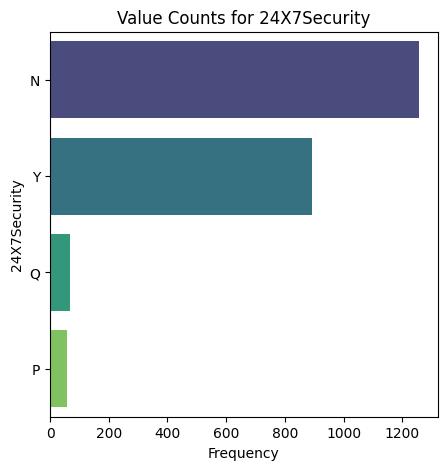

Column Name: 24X7Security
  Value: N                    Percentage: 49.96%
  Value: Y                    Percentage: 35.50%
  Value: Q                    Percentage: 2.70%
  Value: P                    Percentage: 2.30%


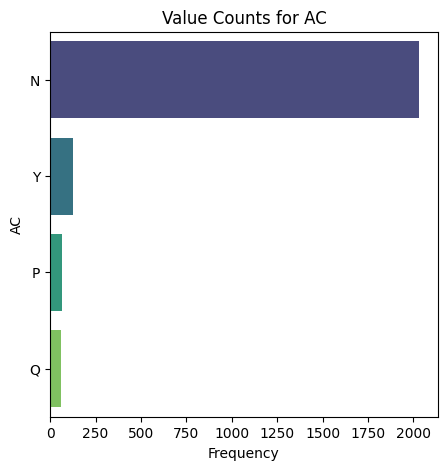

Column Name: AC
  Value: N                    Percentage: 80.70%
  Value: Y                    Percentage: 4.92%
  Value: P                    Percentage: 2.62%
  Value: Q                    Percentage: 2.38%


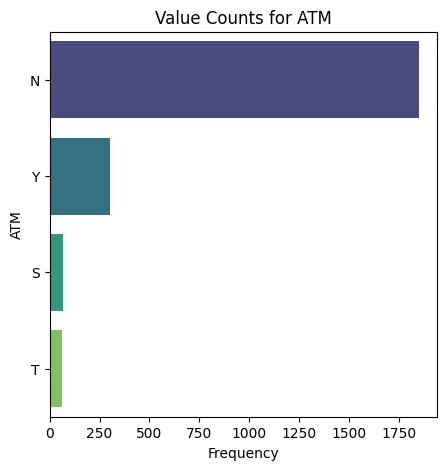

Column Name: ATM
  Value: N                    Percentage: 73.43%
  Value: Y                    Percentage: 11.99%
  Value: S                    Percentage: 2.62%
  Value: T                    Percentage: 2.38%


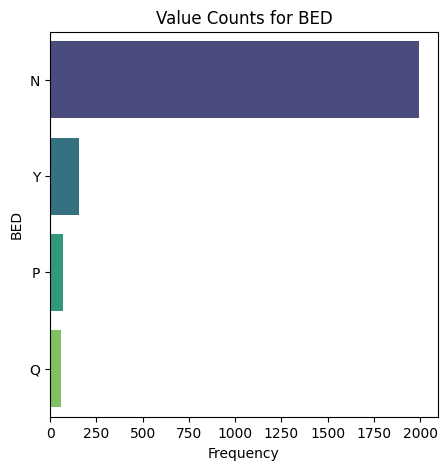

Column Name: BED
  Value: N                    Percentage: 79.23%
  Value: Y                    Percentage: 6.27%
  Value: P                    Percentage: 2.70%
  Value: Q                    Percentage: 2.30%


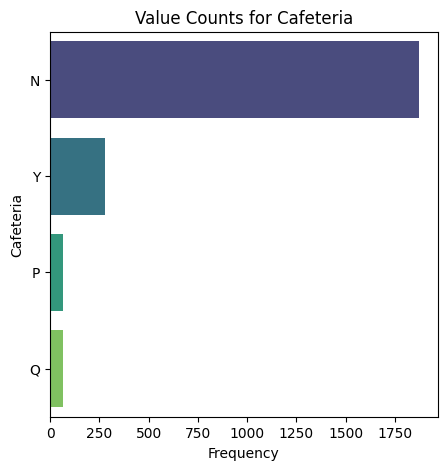

Column Name: Cafeteria
  Value: N                    Percentage: 74.42%
  Value: Y                    Percentage: 11.04%
  Value: P                    Percentage: 2.50%
  Value: Q                    Percentage: 2.50%


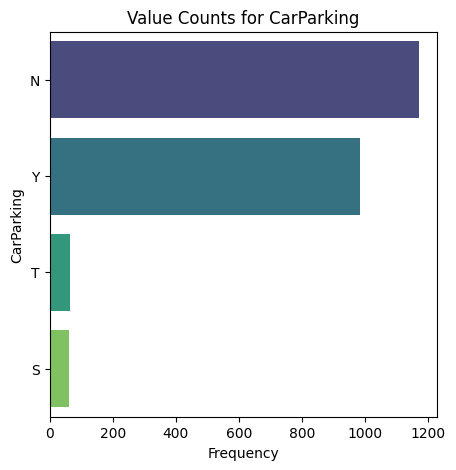

Column Name: CarParking
  Value: N                    Percentage: 46.43%
  Value: Y                    Percentage: 39.08%
  Value: T                    Percentage: 2.58%
  Value: S                    Percentage: 2.42%


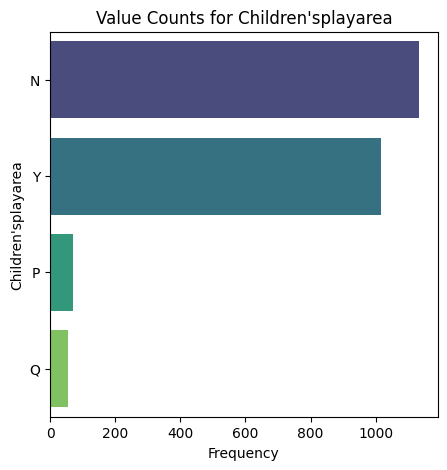

Column Name: Children'splayarea
  Value: N                    Percentage: 45.04%
  Value: Y                    Percentage: 40.43%
  Value: P                    Percentage: 2.78%
  Value: Q                    Percentage: 2.22%


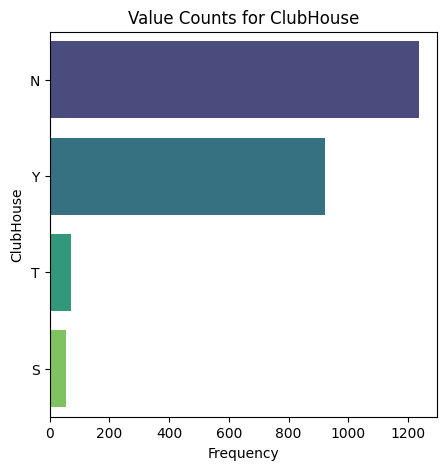

Column Name: ClubHouse
  Value: N                    Percentage: 49.09%
  Value: Y                    Percentage: 36.62%
  Value: T                    Percentage: 2.78%
  Value: S                    Percentage: 2.22%


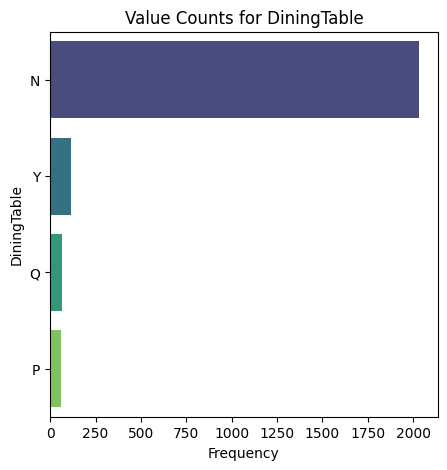

Column Name: DiningTable
  Value: N                    Percentage: 80.74%
  Value: Y                    Percentage: 4.53%
  Value: Q                    Percentage: 2.66%
  Value: P                    Percentage: 2.34%


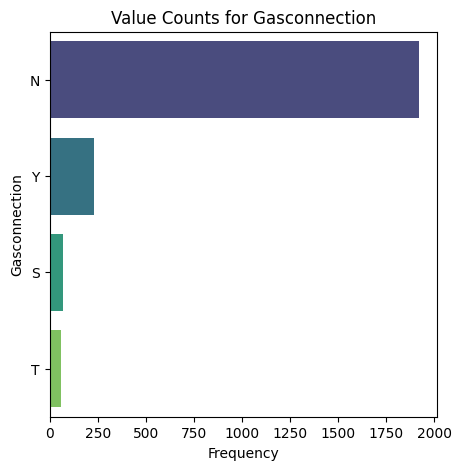

Column Name: Gasconnection
  Value: N                    Percentage: 76.17%
  Value: Y                    Percentage: 9.21%
  Value: S                    Percentage: 2.66%
  Value: T                    Percentage: 2.34%


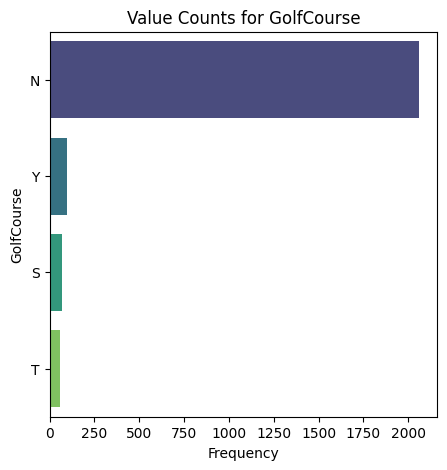

Column Name: GolfCourse
  Value: N                    Percentage: 81.77%
  Value: Y                    Percentage: 3.73%
  Value: S                    Percentage: 2.70%
  Value: T                    Percentage: 2.30%


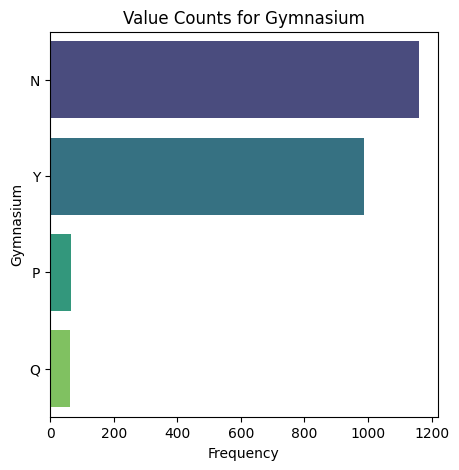

Column Name: Gymnasium
  Value: N                    Percentage: 46.11%
  Value: Y                    Percentage: 39.16%
  Value: P                    Percentage: 2.58%
  Value: Q                    Percentage: 2.42%


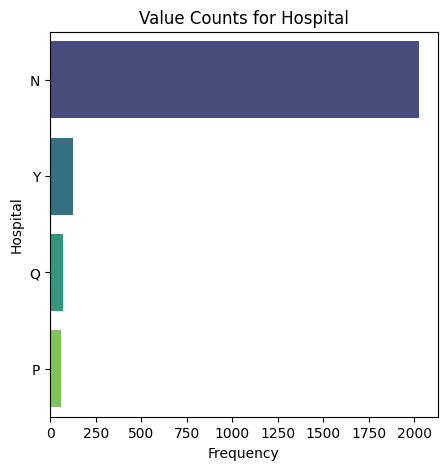

Column Name: Hospital
  Value: N                    Percentage: 80.50%
  Value: Y                    Percentage: 4.96%
  Value: Q                    Percentage: 2.70%
  Value: P                    Percentage: 2.30%


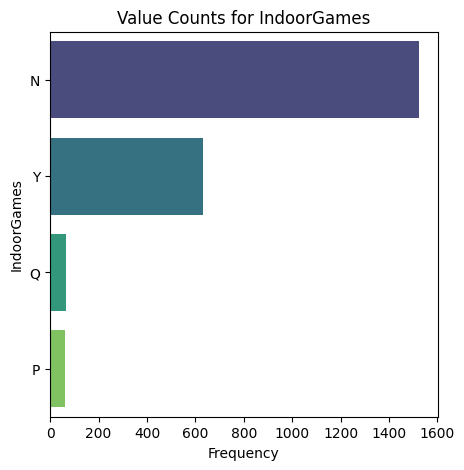

Column Name: IndoorGames
  Value: N                    Percentage: 60.56%
  Value: Y                    Percentage: 25.10%
  Value: Q                    Percentage: 2.58%
  Value: P                    Percentage: 2.42%


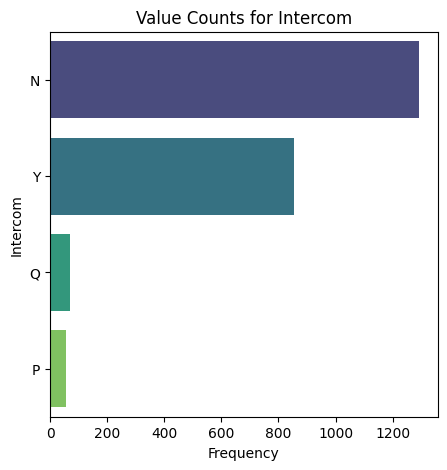

Column Name: Intercom
  Value: N                    Percentage: 51.35%
  Value: Y                    Percentage: 33.96%
  Value: Q                    Percentage: 2.74%
  Value: P                    Percentage: 2.26%


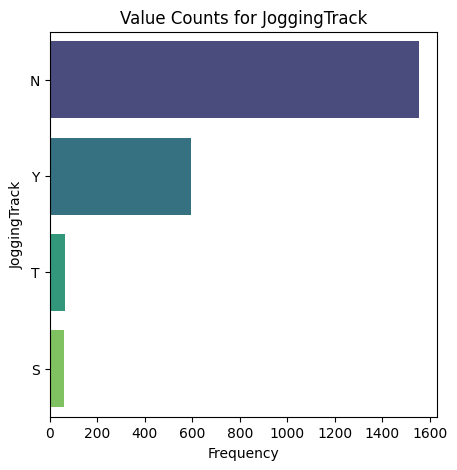

Column Name: JoggingTrack
  Value: N                    Percentage: 61.68%
  Value: Y                    Percentage: 23.59%
  Value: T                    Percentage: 2.58%
  Value: S                    Percentage: 2.42%


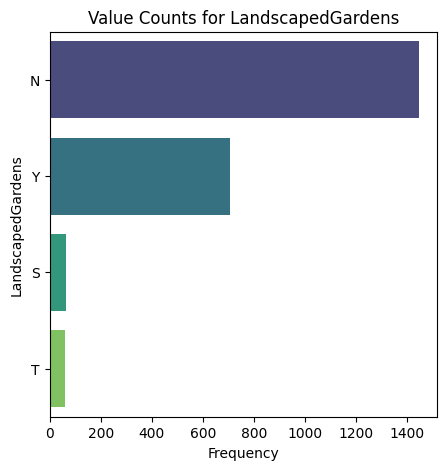

Column Name: LandscapedGardens
  Value: N                    Percentage: 57.35%
  Value: Y                    Percentage: 28.08%
  Value: S                    Percentage: 2.58%
  Value: T                    Percentage: 2.42%


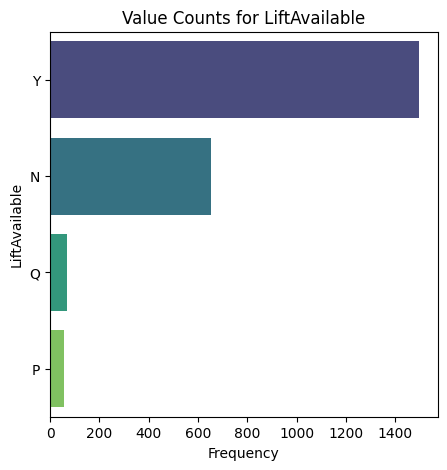

Column Name: LiftAvailable
  Value: Y                    Percentage: 59.49%
  Value: N                    Percentage: 25.89%
  Value: Q                    Percentage: 2.70%
  Value: P                    Percentage: 2.30%


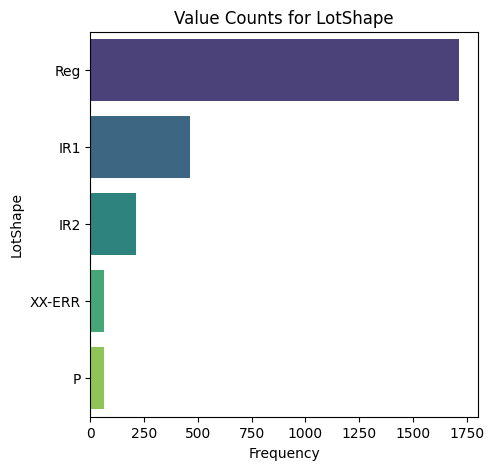

Column Name: LotShape
  Value: Reg                  Percentage: 68.19%
  Value: IR1                  Percentage: 18.35%
  Value: IR2                  Percentage: 8.46%
  Value: XX-ERR               Percentage: 2.54%
  Value: P                    Percentage: 2.46%


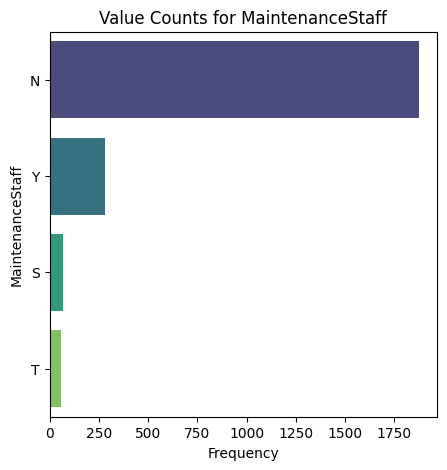

Column Name: MaintenanceStaff
  Value: N                    Percentage: 74.42%
  Value: Y                    Percentage: 11.16%
  Value: S                    Percentage: 2.70%
  Value: T                    Percentage: 2.30%


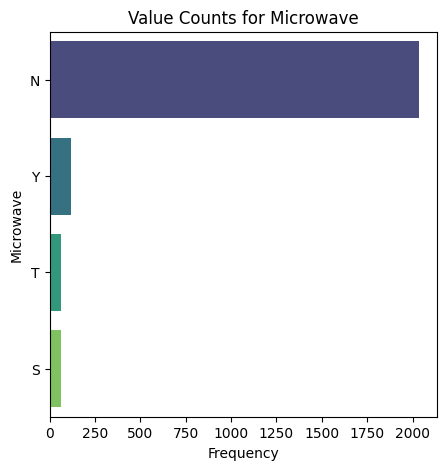

Column Name: Microwave
  Value: N                    Percentage: 80.78%
  Value: Y                    Percentage: 4.77%
  Value: T                    Percentage: 2.58%
  Value: S                    Percentage: 2.42%


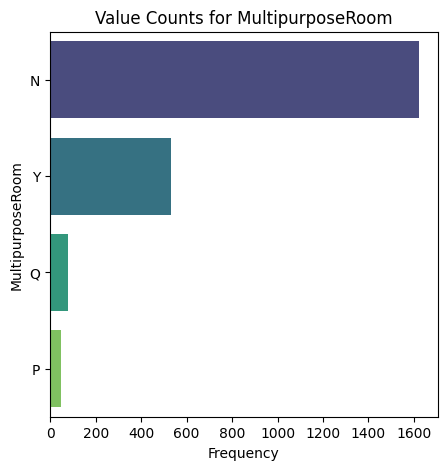

Column Name: MultipurposeRoom
  Value: N                    Percentage: 64.46%
  Value: Y                    Percentage: 21.05%
  Value: Q                    Percentage: 3.18%
  Value: P                    Percentage: 1.83%


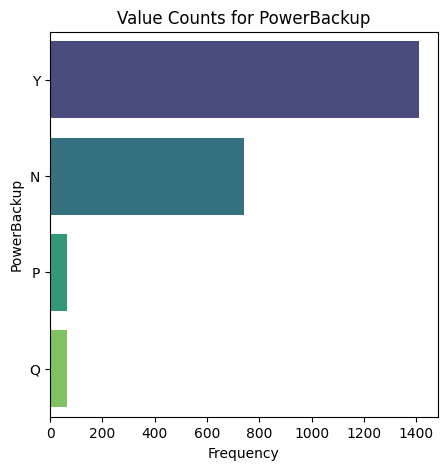

Column Name: PowerBackup
  Value: Y                    Percentage: 56.04%
  Value: N                    Percentage: 29.47%
  Value: P                    Percentage: 2.50%
  Value: Q                    Percentage: 2.50%


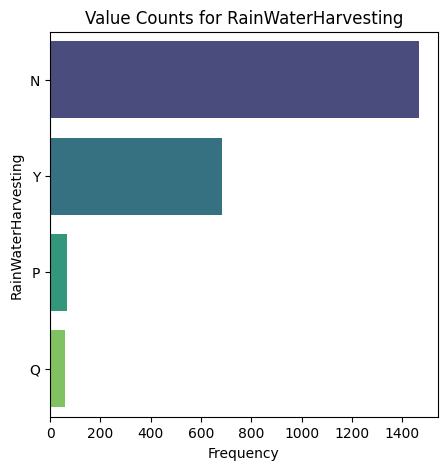

Column Name: RainWaterHarvesting
  Value: N                    Percentage: 58.30%
  Value: Y                    Percentage: 27.08%
  Value: P                    Percentage: 2.66%
  Value: Q                    Percentage: 2.34%


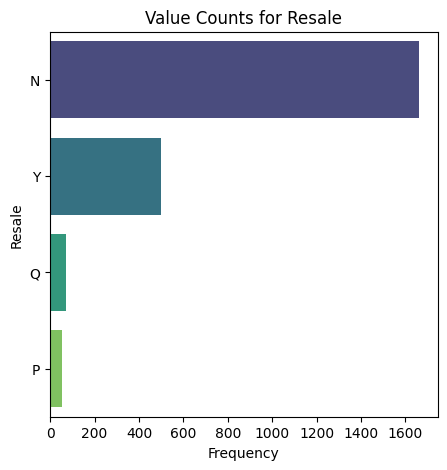

Column Name: Resale
  Value: N                    Percentage: 66.00%
  Value: Y                    Percentage: 19.74%
  Value: Q                    Percentage: 2.86%
  Value: P                    Percentage: 2.14%


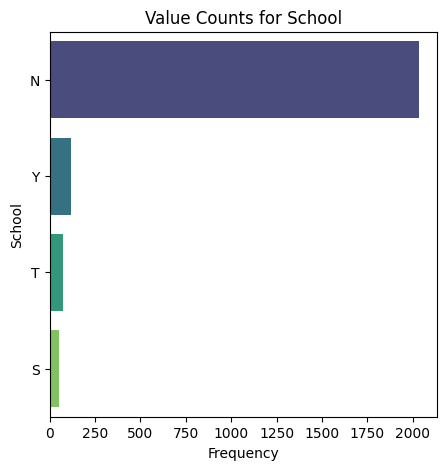

Column Name: School
  Value: N                    Percentage: 80.70%
  Value: Y                    Percentage: 4.73%
  Value: T                    Percentage: 2.98%
  Value: S                    Percentage: 2.03%


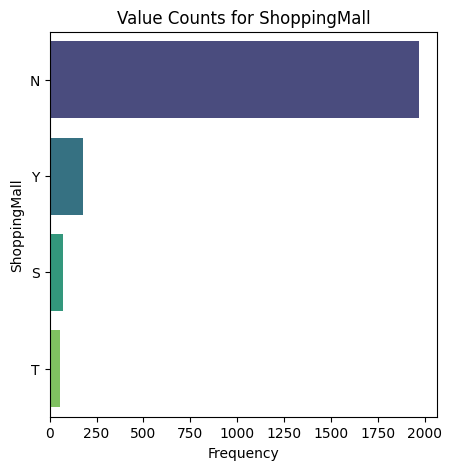

Column Name: ShoppingMall
  Value: N                    Percentage: 78.12%
  Value: Y                    Percentage: 7.11%
  Value: S                    Percentage: 2.78%
  Value: T                    Percentage: 2.22%


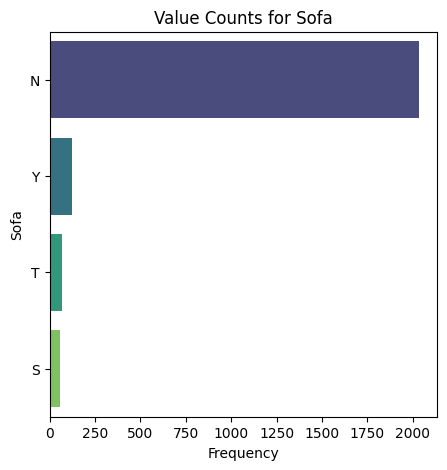

Column Name: Sofa
  Value: N                    Percentage: 80.70%
  Value: Y                    Percentage: 4.85%
  Value: T                    Percentage: 2.70%
  Value: S                    Percentage: 2.30%


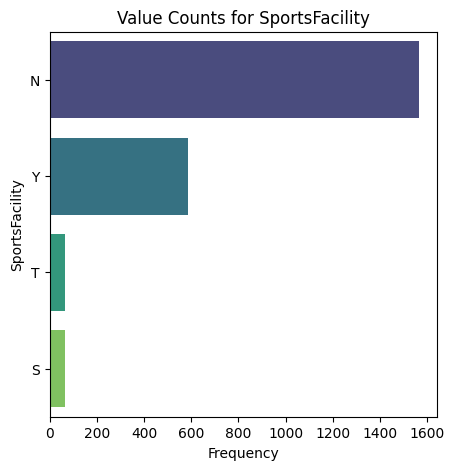

Column Name: SportsFacility
  Value: N                    Percentage: 62.11%
  Value: Y                    Percentage: 23.31%
  Value: T                    Percentage: 2.50%
  Value: S                    Percentage: 2.50%


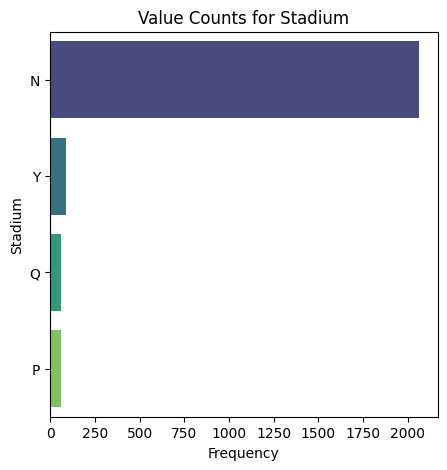

Column Name: Stadium
  Value: N                    Percentage: 81.93%
  Value: Y                    Percentage: 3.46%
  Value: Q                    Percentage: 2.50%
  Value: P                    Percentage: 2.50%


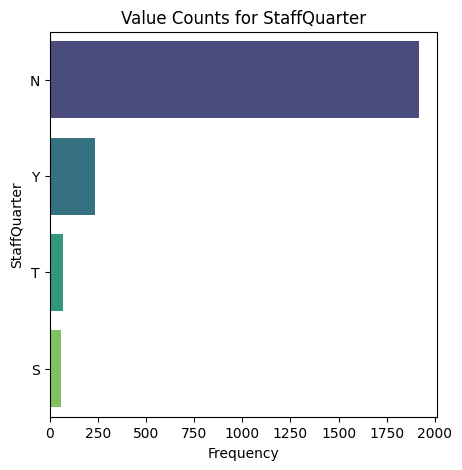

Column Name: StaffQuarter
  Value: N                    Percentage: 76.09%
  Value: Y                    Percentage: 9.33%
  Value: T                    Percentage: 2.66%
  Value: S                    Percentage: 2.34%


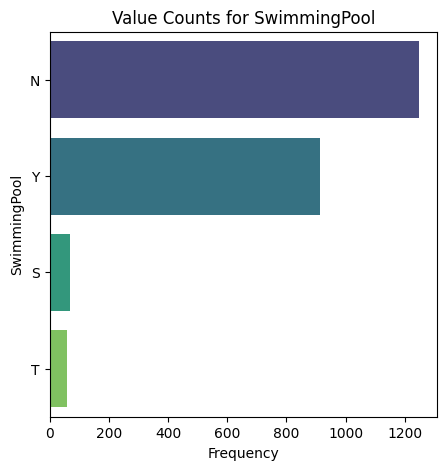

Column Name: SwimmingPool
  Value: N                    Percentage: 49.52%
  Value: Y                    Percentage: 36.30%
  Value: S                    Percentage: 2.74%
  Value: T                    Percentage: 2.26%


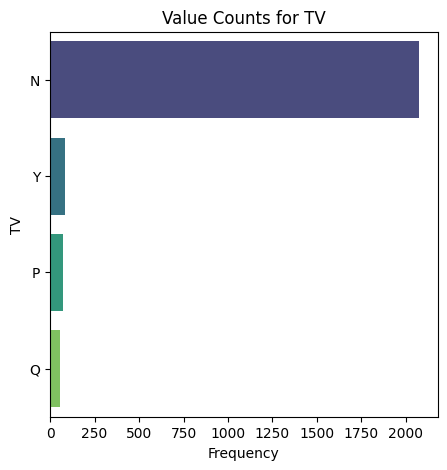

Column Name: TV
  Value: N                    Percentage: 82.41%
  Value: Y                    Percentage: 3.22%
  Value: P                    Percentage: 2.90%
  Value: Q                    Percentage: 2.10%


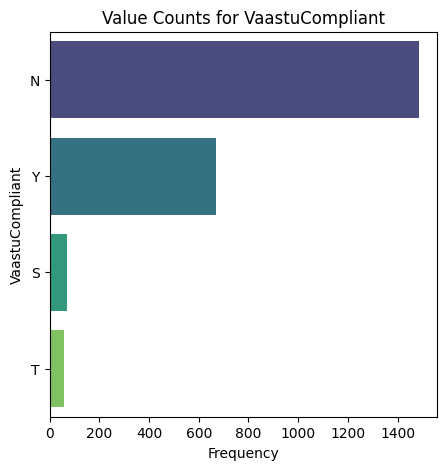

Column Name: VaastuCompliant
  Value: N                    Percentage: 58.98%
  Value: Y                    Percentage: 26.61%
  Value: S                    Percentage: 2.78%
  Value: T                    Percentage: 2.22%


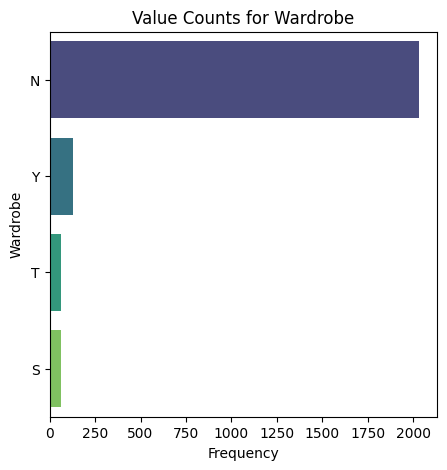

Column Name: Wardrobe
  Value: N                    Percentage: 80.66%
  Value: Y                    Percentage: 5.00%
  Value: T                    Percentage: 2.54%
  Value: S                    Percentage: 2.46%


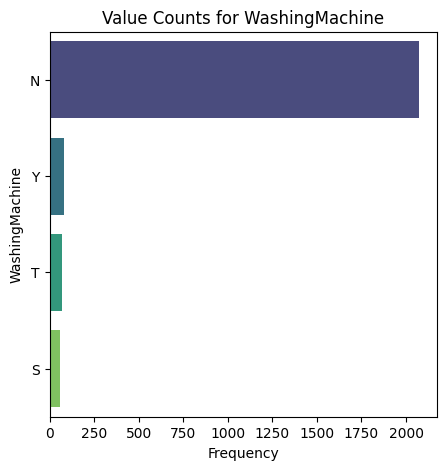

Column Name: WashingMachine
  Value: N                    Percentage: 82.25%
  Value: Y                    Percentage: 3.22%
  Value: T                    Percentage: 2.74%
  Value: S                    Percentage: 2.26%


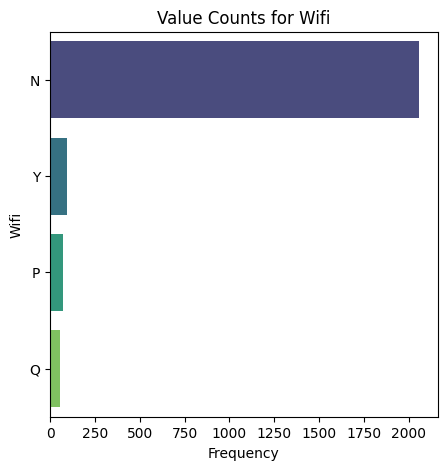

Column Name: Wifi
  Value: N                    Percentage: 81.73%
  Value: Y                    Percentage: 3.73%
  Value: P                    Percentage: 2.90%
  Value: Q                    Percentage: 2.10%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  399
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             126            ['Q', 'P']
AC                       250            ['Y', 'P', 'Q']
ATM                      126            ['S', 'T']
BED                      126            ['P', 'Q']
Cafeteria                126            ['P', 'Q']
CarParking               126            ['T', 'S']
Children'splayarea       126            ['P', 'Q']
ClubHouse                126            ['T', 'S']
DiningTable              240            ['Y',

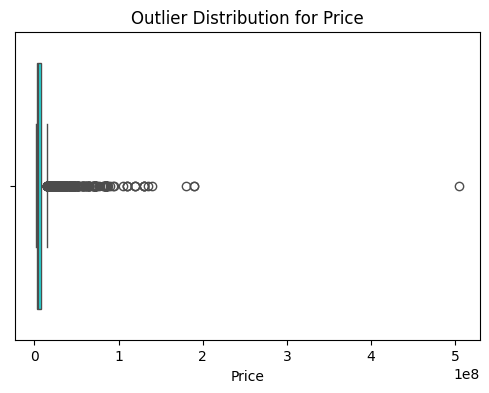

Column Name: Price
Largest 5 outliers: [135000000 140000000 180000000 190000000 504000000]



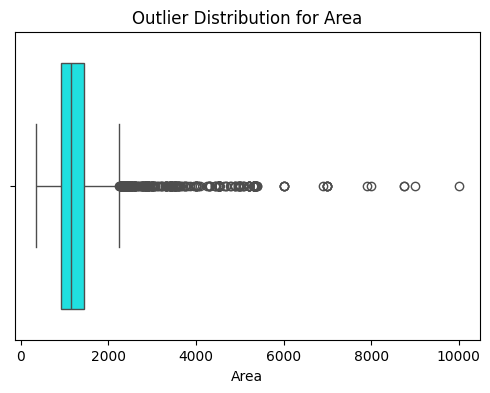

Column Name: Area
Largest 5 outliers: [ 7915  7995  8750  9000 10000]



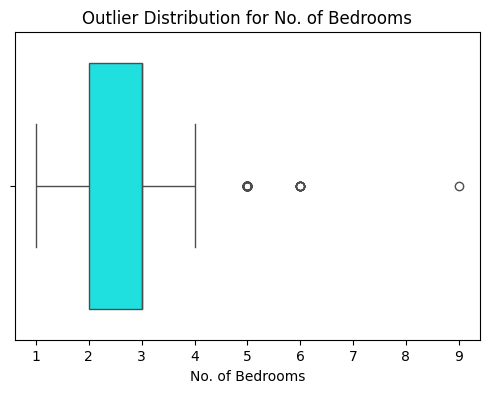

Column Name: No. of Bedrooms
Largest 5 outliers: [5 6 9]


Frequency Distribution of Categorical Column values....


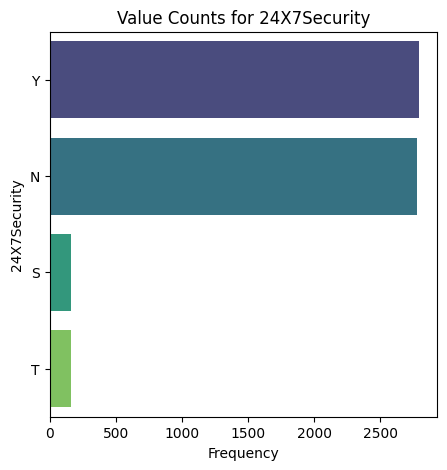

Column Name: 24X7Security
  Value: Y                    Percentage: 42.88%
  Value: N                    Percentage: 42.69%
  Value: S                    Percentage: 2.52%
  Value: T                    Percentage: 2.47%


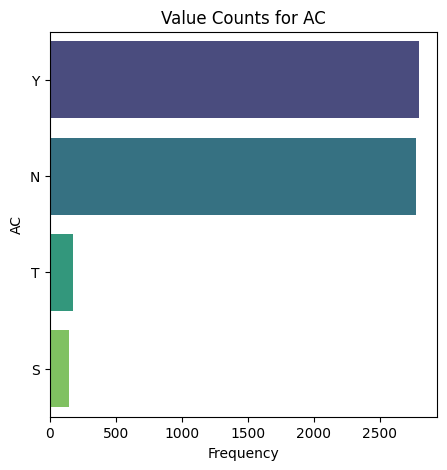

Column Name: AC
  Value: Y                    Percentage: 42.94%
  Value: N                    Percentage: 42.68%
  Value: T                    Percentage: 2.69%
  Value: S                    Percentage: 2.31%


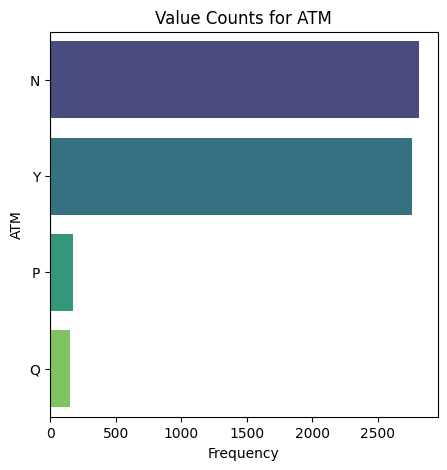

Column Name: ATM
  Value: N                    Percentage: 43.26%
  Value: Y                    Percentage: 42.40%
  Value: P                    Percentage: 2.72%
  Value: Q                    Percentage: 2.27%


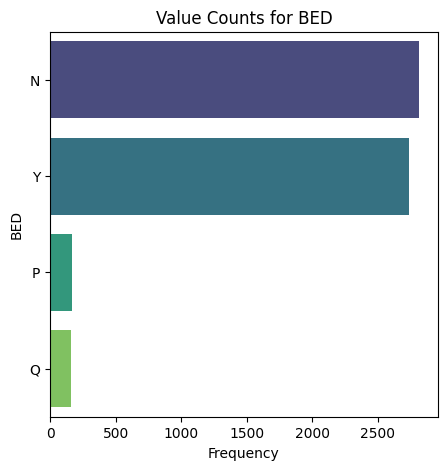

Column Name: BED
  Value: N                    Percentage: 43.29%
  Value: Y                    Percentage: 42.12%
  Value: P                    Percentage: 2.58%
  Value: Q                    Percentage: 2.41%


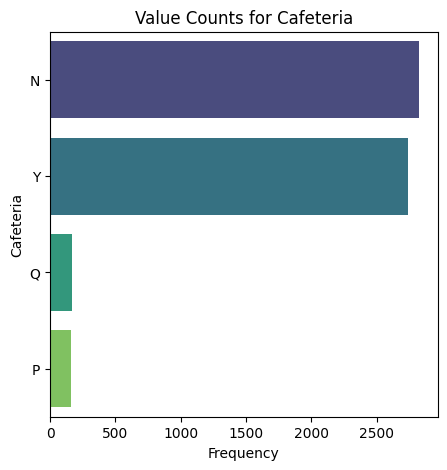

Column Name: Cafeteria
  Value: N                    Percentage: 43.41%
  Value: Y                    Percentage: 42.09%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.44%


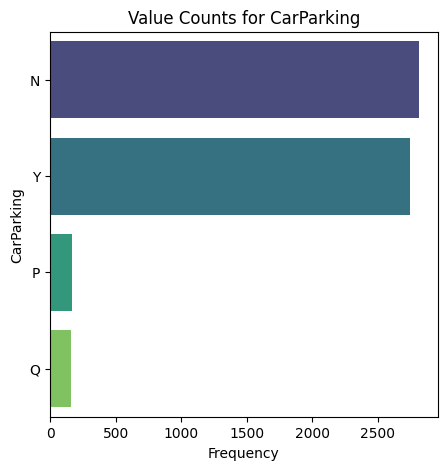

Column Name: CarParking
  Value: N                    Percentage: 43.31%
  Value: Y                    Percentage: 42.25%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.43%


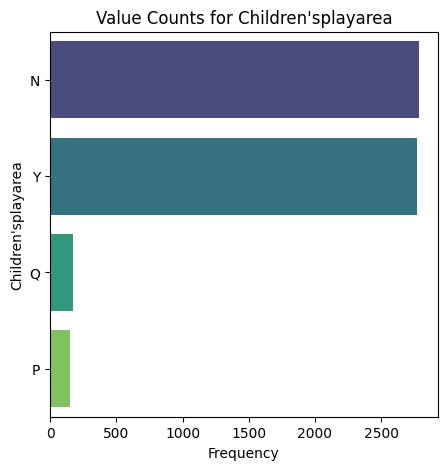

Column Name: Children'splayarea
  Value: N                    Percentage: 42.83%
  Value: Y                    Percentage: 42.60%
  Value: Q                    Percentage: 2.67%
  Value: P                    Percentage: 2.32%


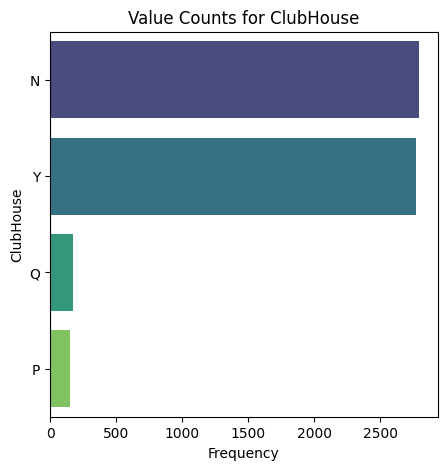

Column Name: ClubHouse
  Value: N                    Percentage: 42.97%
  Value: Y                    Percentage: 42.54%
  Value: Q                    Percentage: 2.67%
  Value: P                    Percentage: 2.32%


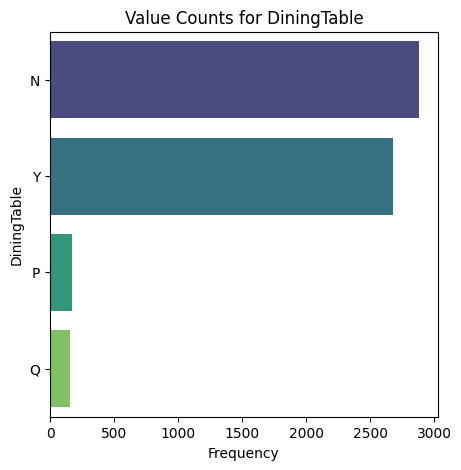

Column Name: DiningTable
  Value: N                    Percentage: 44.28%
  Value: Y                    Percentage: 41.09%
  Value: P                    Percentage: 2.60%
  Value: Q                    Percentage: 2.40%


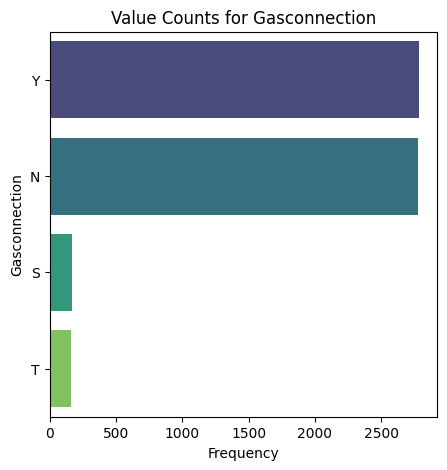

Column Name: Gasconnection
  Value: Y                    Percentage: 42.75%
  Value: N                    Percentage: 42.65%
  Value: S                    Percentage: 2.57%
  Value: T                    Percentage: 2.43%


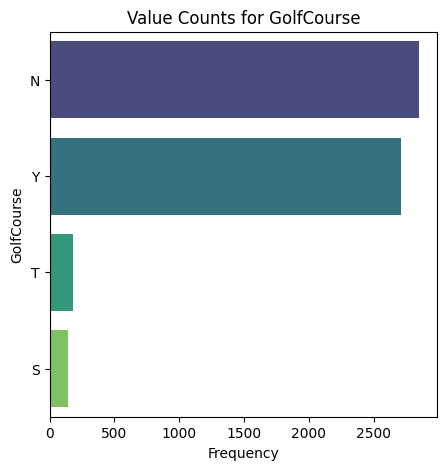

Column Name: GolfCourse
  Value: N                    Percentage: 43.77%
  Value: Y                    Percentage: 41.63%
  Value: T                    Percentage: 2.78%
  Value: S                    Percentage: 2.21%


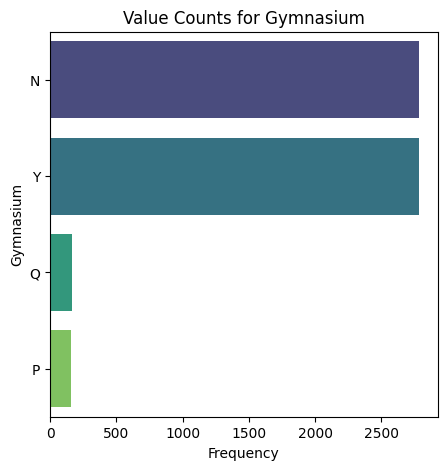

Column Name: Gymnasium
  Value: N                    Percentage: 42.80%
  Value: Y                    Percentage: 42.77%
  Value: Q                    Percentage: 2.58%
  Value: P                    Percentage: 2.41%


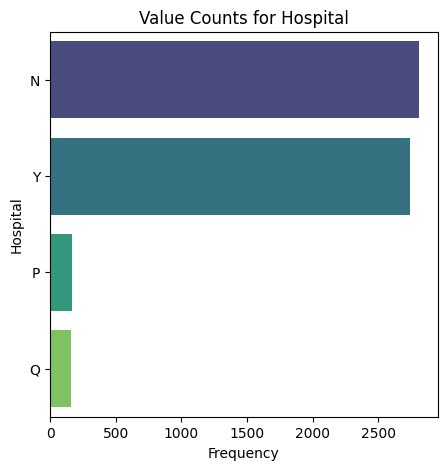

Column Name: Hospital
  Value: N                    Percentage: 43.23%
  Value: Y                    Percentage: 42.17%
  Value: P                    Percentage: 2.55%
  Value: Q                    Percentage: 2.44%


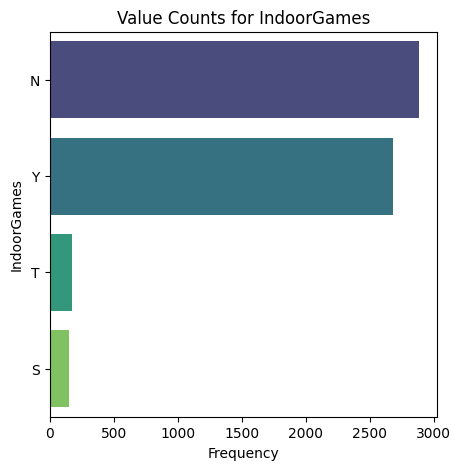

Column Name: IndoorGames
  Value: N                    Percentage: 44.31%
  Value: Y                    Percentage: 41.26%
  Value: T                    Percentage: 2.64%
  Value: S                    Percentage: 2.35%


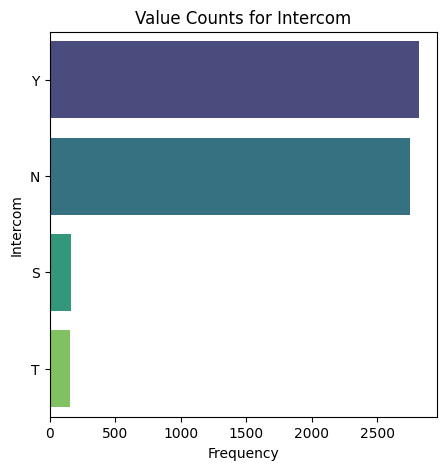

Column Name: Intercom
  Value: Y                    Percentage: 43.31%
  Value: N                    Percentage: 42.29%
  Value: S                    Percentage: 2.55%
  Value: T                    Percentage: 2.44%


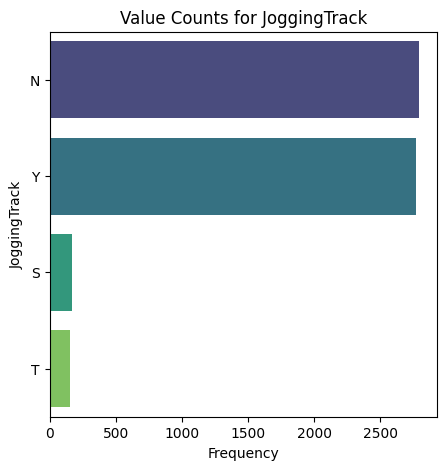

Column Name: JoggingTrack
  Value: N                    Percentage: 42.88%
  Value: Y                    Percentage: 42.58%
  Value: S                    Percentage: 2.60%
  Value: T                    Percentage: 2.40%


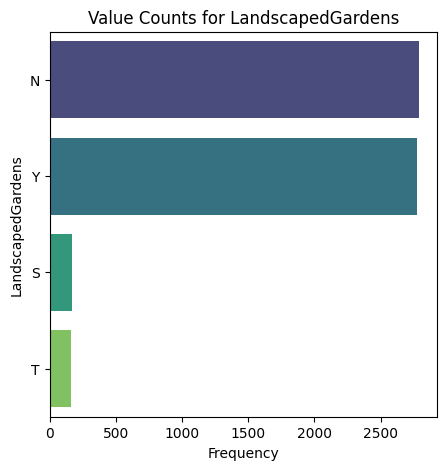

Column Name: LandscapedGardens
  Value: N                    Percentage: 42.85%
  Value: Y                    Percentage: 42.60%
  Value: S                    Percentage: 2.57%
  Value: T                    Percentage: 2.43%


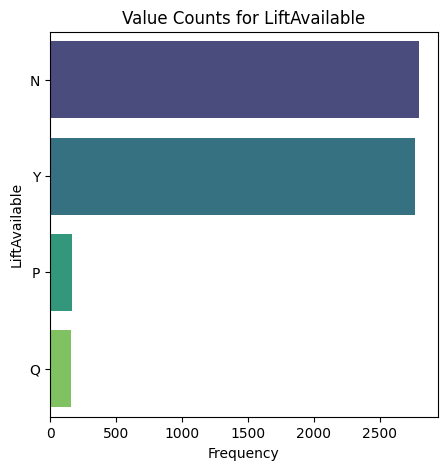

Column Name: LiftAvailable
  Value: N                    Percentage: 43.00%
  Value: Y                    Percentage: 42.55%
  Value: P                    Percentage: 2.52%
  Value: Q                    Percentage: 2.47%


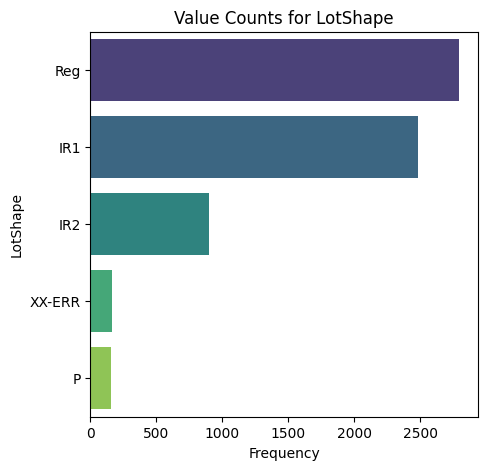

Column Name: LotShape
  Value: Reg                  Percentage: 43.00%
  Value: IR1                  Percentage: 38.16%
  Value: IR2                  Percentage: 13.85%
  Value: XX-ERR               Percentage: 2.55%
  Value: P                    Percentage: 2.44%


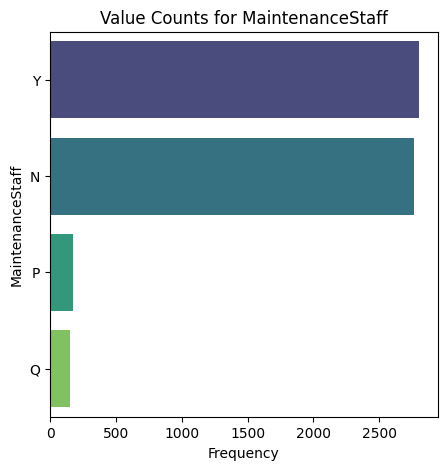

Column Name: MaintenanceStaff
  Value: Y                    Percentage: 43.08%
  Value: N                    Percentage: 42.45%
  Value: P                    Percentage: 2.64%
  Value: Q                    Percentage: 2.35%


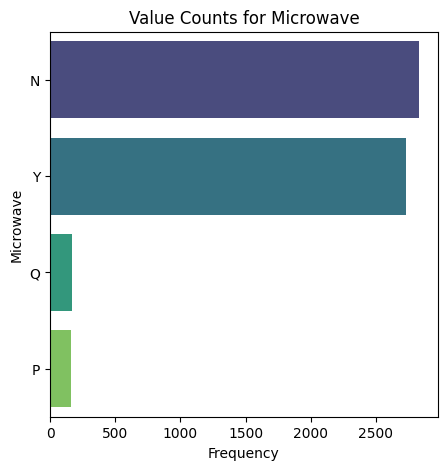

Column Name: Microwave
  Value: N                    Percentage: 43.54%
  Value: Y                    Percentage: 42.00%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.47%


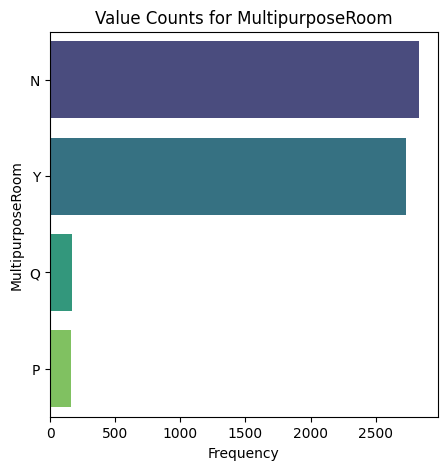

Column Name: MultipurposeRoom
  Value: N                    Percentage: 43.55%
  Value: Y                    Percentage: 41.97%
  Value: Q                    Percentage: 2.52%
  Value: P                    Percentage: 2.47%


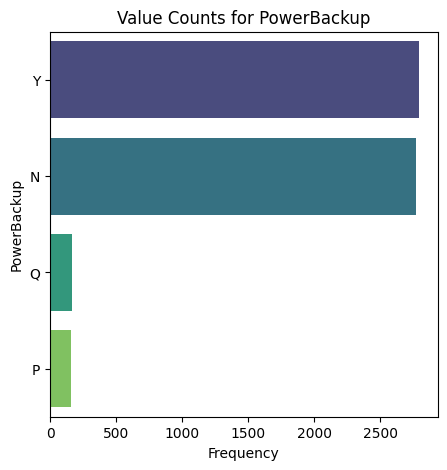

Column Name: PowerBackup
  Value: Y                    Percentage: 42.98%
  Value: N                    Percentage: 42.55%
  Value: Q                    Percentage: 2.60%
  Value: P                    Percentage: 2.40%


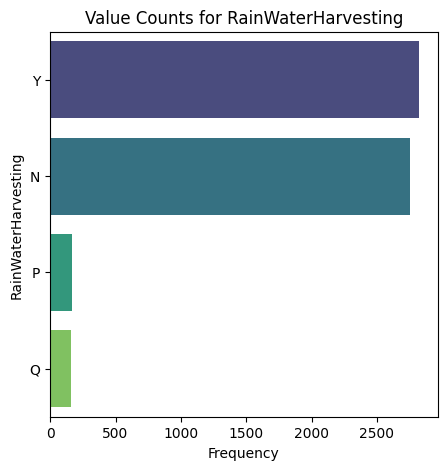

Column Name: RainWaterHarvesting
  Value: Y                    Percentage: 43.38%
  Value: N                    Percentage: 42.25%
  Value: P                    Percentage: 2.60%
  Value: Q                    Percentage: 2.40%


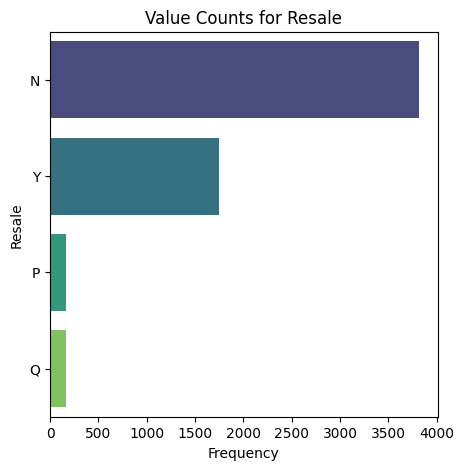

Column Name: Resale
  Value: N                    Percentage: 58.68%
  Value: Y                    Percentage: 26.86%
  Value: P                    Percentage: 2.54%
  Value: Q                    Percentage: 2.46%


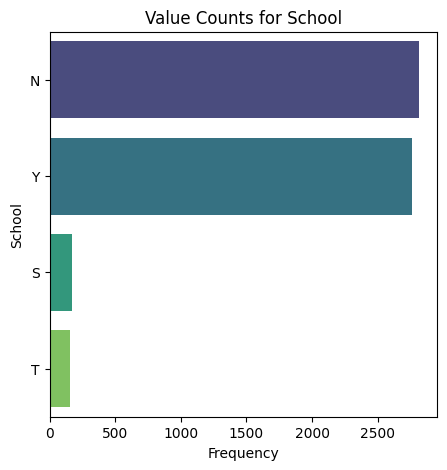

Column Name: School
  Value: N                    Percentage: 43.23%
  Value: Y                    Percentage: 42.46%
  Value: S                    Percentage: 2.63%
  Value: T                    Percentage: 2.37%


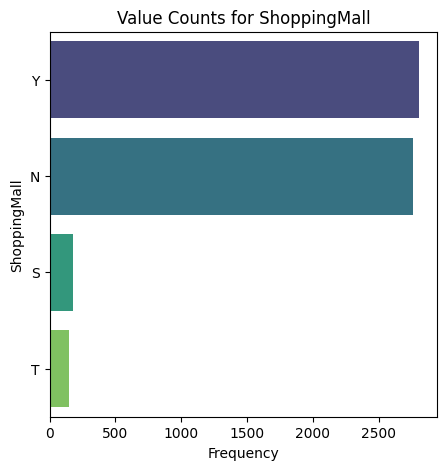

Column Name: ShoppingMall
  Value: Y                    Percentage: 43.11%
  Value: N                    Percentage: 42.49%
  Value: S                    Percentage: 2.74%
  Value: T                    Percentage: 2.26%


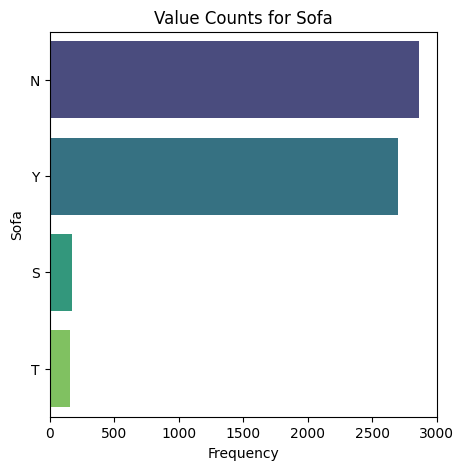

Column Name: Sofa
  Value: N                    Percentage: 43.94%
  Value: Y                    Percentage: 41.52%
  Value: S                    Percentage: 2.61%
  Value: T                    Percentage: 2.38%


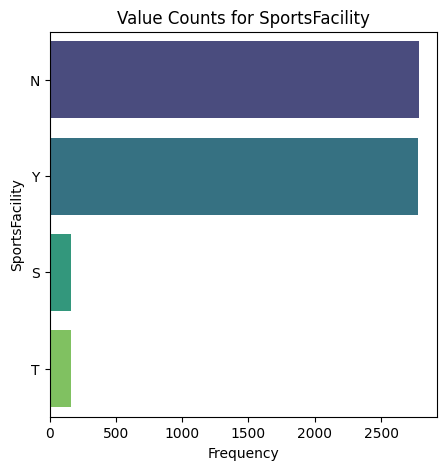

Column Name: SportsFacility
  Value: N                    Percentage: 42.78%
  Value: Y                    Percentage: 42.69%
  Value: S                    Percentage: 2.52%
  Value: T                    Percentage: 2.47%


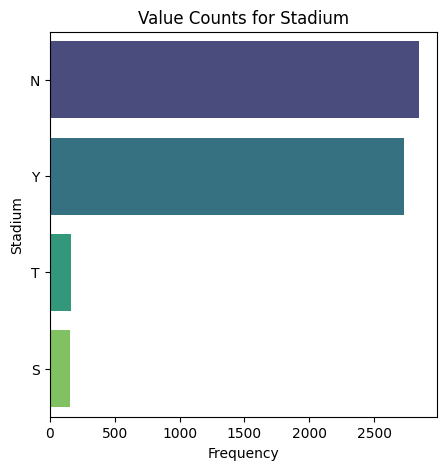

Column Name: Stadium
  Value: N                    Percentage: 43.68%
  Value: Y                    Percentage: 41.92%
  Value: T                    Percentage: 2.55%
  Value: S                    Percentage: 2.44%


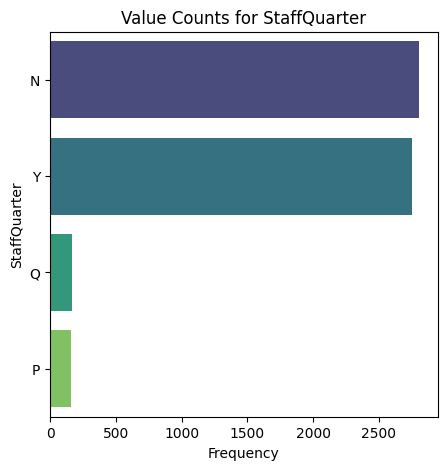

Column Name: StaffQuarter
  Value: N                    Percentage: 43.15%
  Value: Y                    Percentage: 42.32%
  Value: Q                    Percentage: 2.54%
  Value: P                    Percentage: 2.46%


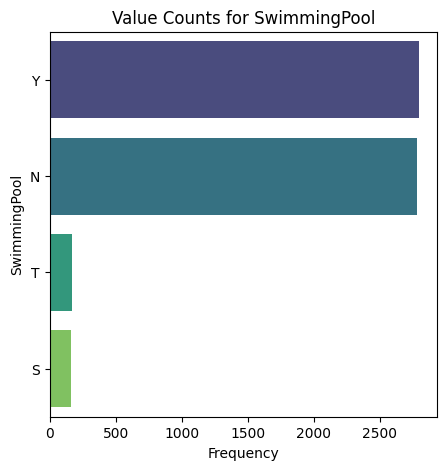

Column Name: SwimmingPool
  Value: Y                    Percentage: 42.95%
  Value: N                    Percentage: 42.71%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.43%


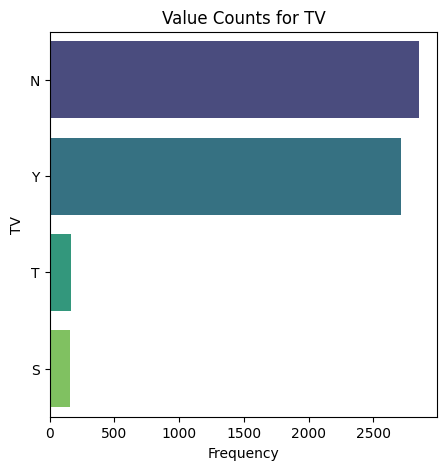

Column Name: TV
  Value: N                    Percentage: 43.80%
  Value: Y                    Percentage: 41.69%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.43%


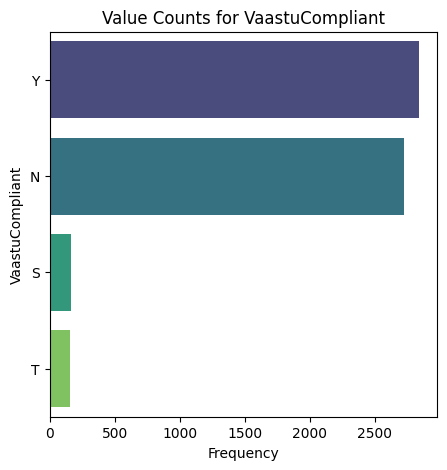

Column Name: VaastuCompliant
  Value: Y                    Percentage: 43.61%
  Value: N                    Percentage: 41.85%
  Value: S                    Percentage: 2.58%
  Value: T                    Percentage: 2.41%


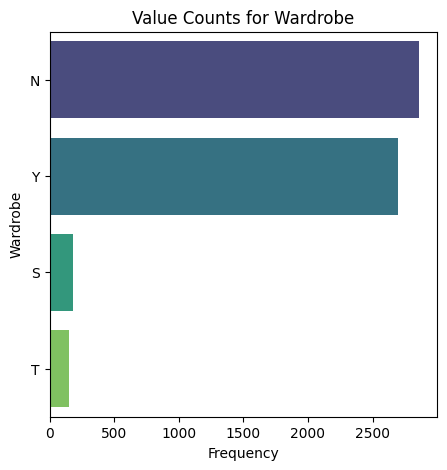

Column Name: Wardrobe
  Value: N                    Percentage: 43.91%
  Value: Y                    Percentage: 41.45%
  Value: S                    Percentage: 2.72%
  Value: T                    Percentage: 2.27%


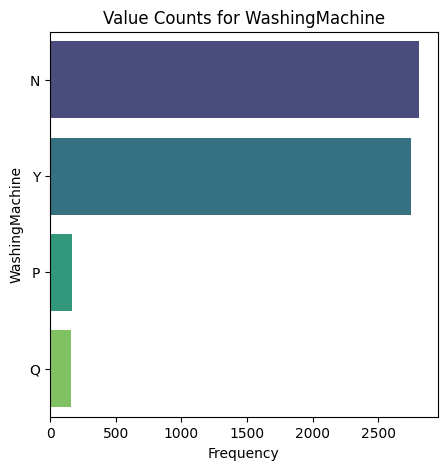

Column Name: WashingMachine
  Value: N                    Percentage: 43.23%
  Value: Y                    Percentage: 42.25%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.43%


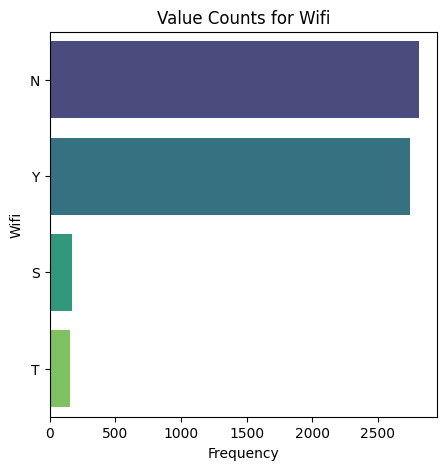

Column Name: Wifi
  Value: N                    Percentage: 43.20%
  Value: Y                    Percentage: 42.12%
  Value: S                    Percentage: 2.63%
  Value: T                    Percentage: 2.37%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  979
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             325            ['S', 'T']
AC                       325            ['T', 'S']
ATM                      325            ['P', 'Q']
BED                      325            ['P', 'Q']
Cafeteria                325            ['Q', 'P']
CarParking               325            ['P', 'Q']
Children'splayarea       325            ['Q', 'P']
ClubHouse                325            ['Q', 'P']
DiningTable              325            ['P', 'Q'

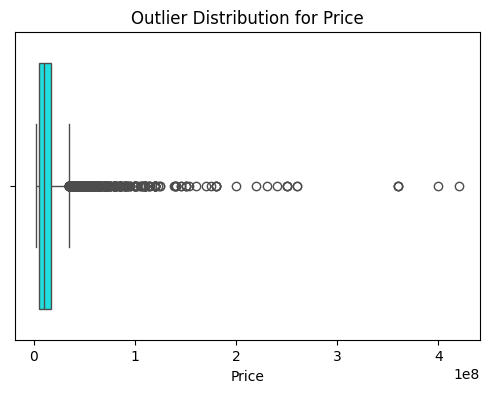

Column Name: Price
Largest 5 outliers: [250000000 260000000 360000000 400000000 420000000]



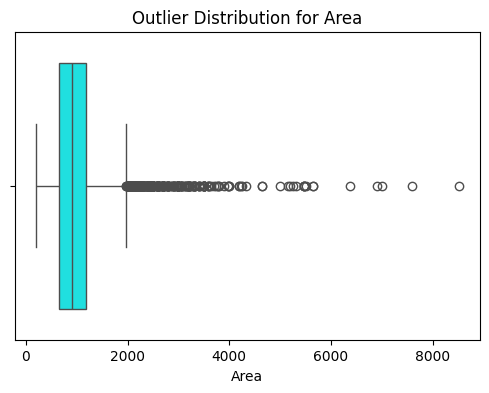

Column Name: Area
Largest 5 outliers: [6381 6900 7000 7600 8511]



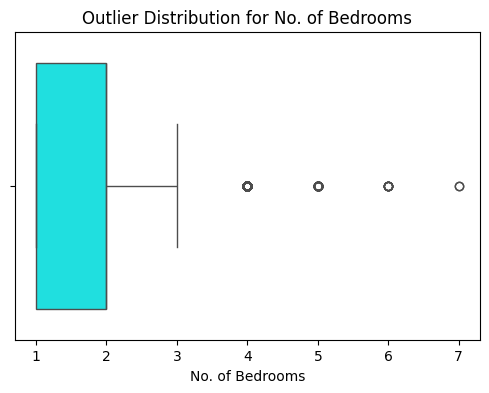

Column Name: No. of Bedrooms
Largest 5 outliers: [4 5 6 7]


Frequency Distribution of Categorical Column values....


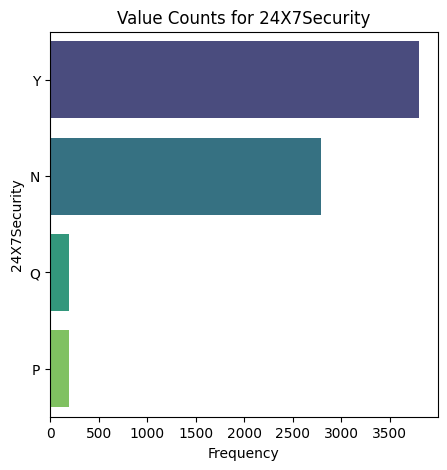

Column Name: 24X7Security
  Value: Y                    Percentage: 49.26%
  Value: N                    Percentage: 36.16%
  Value: Q                    Percentage: 2.50%
  Value: P                    Percentage: 2.50%


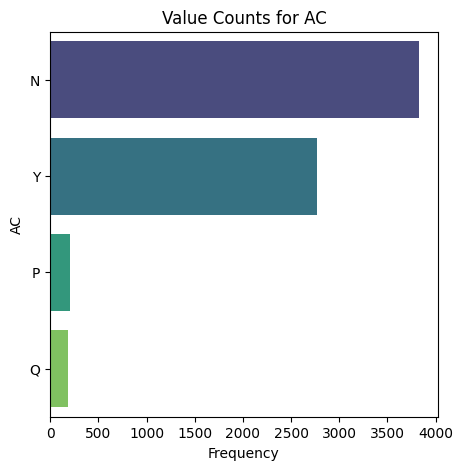

Column Name: AC
  Value: N                    Percentage: 49.60%
  Value: Y                    Percentage: 35.92%
  Value: P                    Percentage: 2.62%
  Value: Q                    Percentage: 2.38%


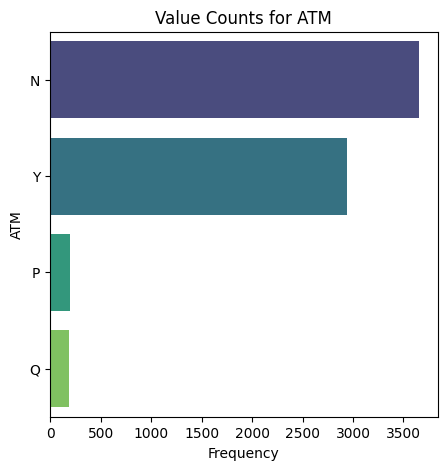

Column Name: ATM
  Value: N                    Percentage: 47.36%
  Value: Y                    Percentage: 38.14%
  Value: P                    Percentage: 2.59%
  Value: Q                    Percentage: 2.41%


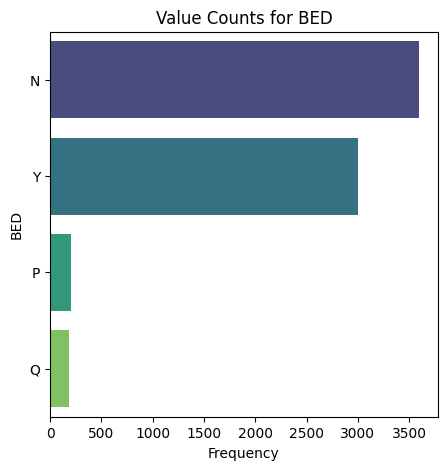

Column Name: BED
  Value: N                    Percentage: 46.61%
  Value: Y                    Percentage: 38.85%
  Value: P                    Percentage: 2.62%
  Value: Q                    Percentage: 2.38%


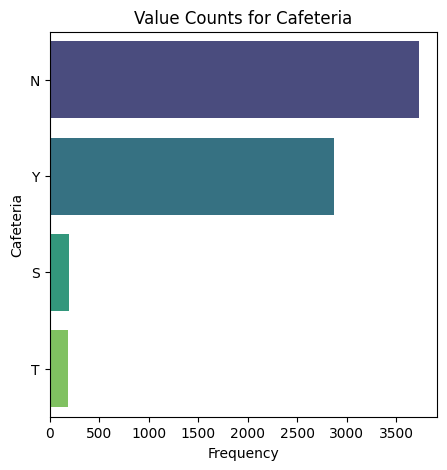

Column Name: Cafeteria
  Value: N                    Percentage: 48.27%
  Value: Y                    Percentage: 37.18%
  Value: S                    Percentage: 2.55%
  Value: T                    Percentage: 2.45%


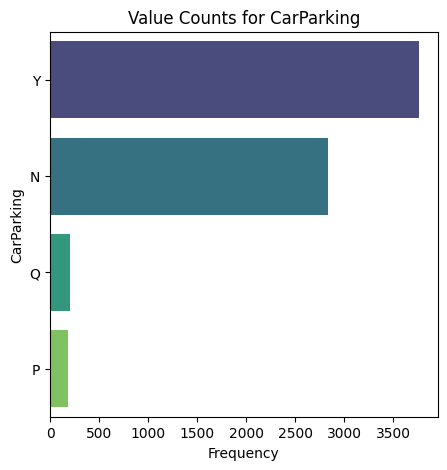

Column Name: CarParking
  Value: Y                    Percentage: 48.76%
  Value: N                    Percentage: 36.73%
  Value: Q                    Percentage: 2.66%
  Value: P                    Percentage: 2.34%


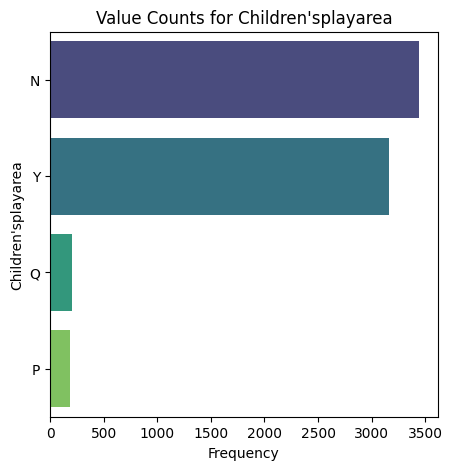

Column Name: Children'splayarea
  Value: N                    Percentage: 44.62%
  Value: Y                    Percentage: 40.96%
  Value: Q                    Percentage: 2.66%
  Value: P                    Percentage: 2.34%


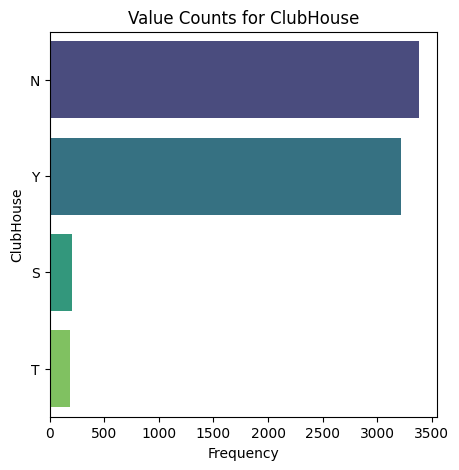

Column Name: ClubHouse
  Value: N                    Percentage: 43.79%
  Value: Y                    Percentage: 41.72%
  Value: S                    Percentage: 2.64%
  Value: T                    Percentage: 2.36%


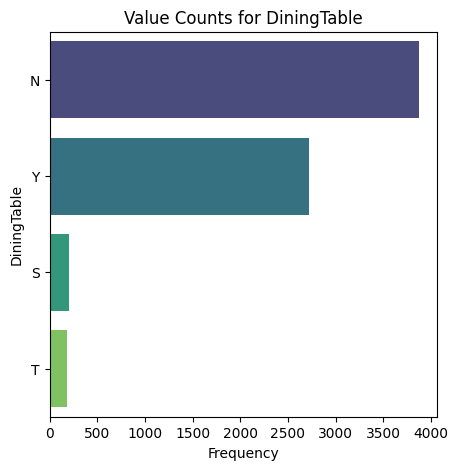

Column Name: DiningTable
  Value: N                    Percentage: 50.17%
  Value: Y                    Percentage: 35.32%
  Value: S                    Percentage: 2.62%
  Value: T                    Percentage: 2.38%


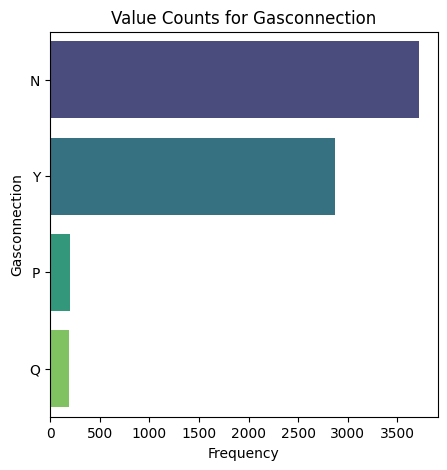

Column Name: Gasconnection
  Value: N                    Percentage: 48.18%
  Value: Y                    Percentage: 37.23%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.44%


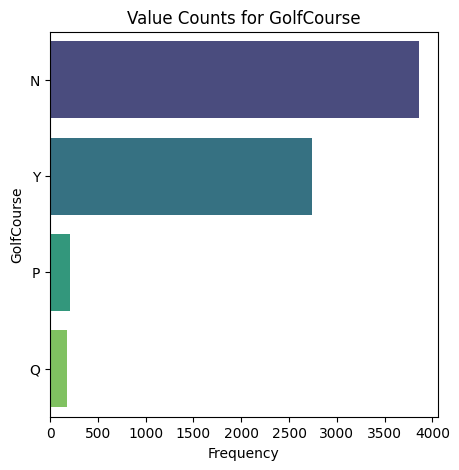

Column Name: GolfCourse
  Value: N                    Percentage: 50.03%
  Value: Y                    Percentage: 35.43%
  Value: P                    Percentage: 2.67%
  Value: Q                    Percentage: 2.33%


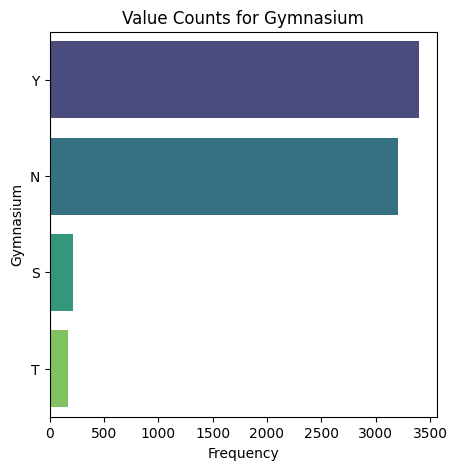

Column Name: Gymnasium
  Value: Y                    Percentage: 44.00%
  Value: N                    Percentage: 41.56%
  Value: S                    Percentage: 2.77%
  Value: T                    Percentage: 2.23%


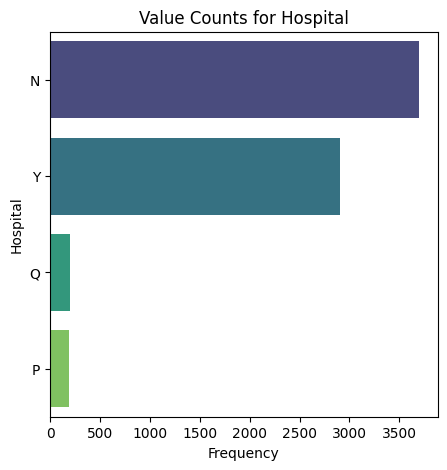

Column Name: Hospital
  Value: N                    Percentage: 47.92%
  Value: Y                    Percentage: 37.58%
  Value: Q                    Percentage: 2.51%
  Value: P                    Percentage: 2.49%


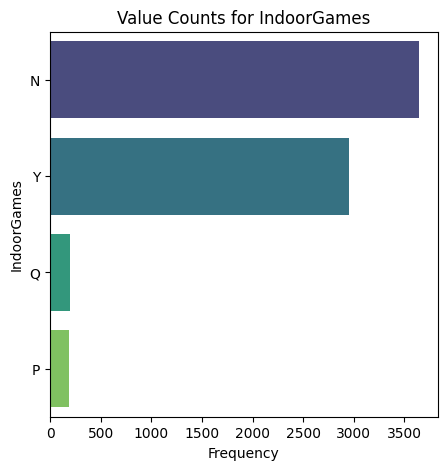

Column Name: IndoorGames
  Value: N                    Percentage: 47.23%
  Value: Y                    Percentage: 38.20%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


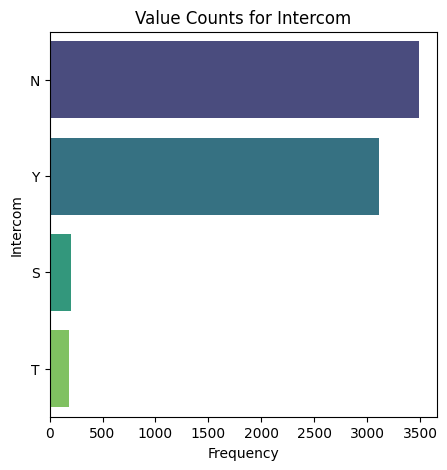

Column Name: Intercom
  Value: N                    Percentage: 45.19%
  Value: Y                    Percentage: 40.34%
  Value: S                    Percentage: 2.58%
  Value: T                    Percentage: 2.42%


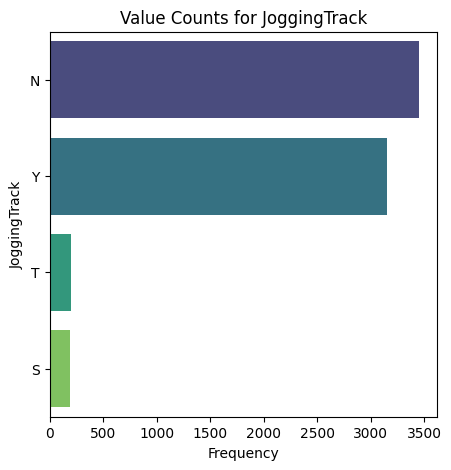

Column Name: JoggingTrack
  Value: N                    Percentage: 44.64%
  Value: Y                    Percentage: 40.86%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.44%


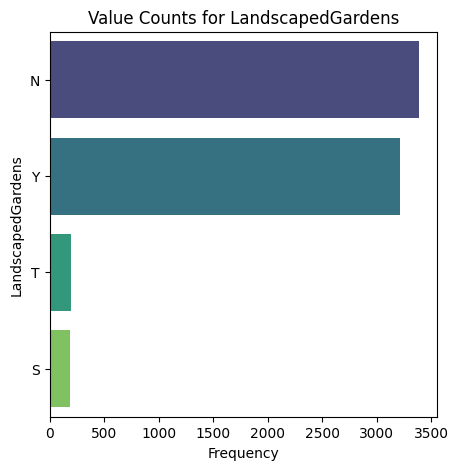

Column Name: LandscapedGardens
  Value: N                    Percentage: 43.85%
  Value: Y                    Percentage: 41.69%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.44%


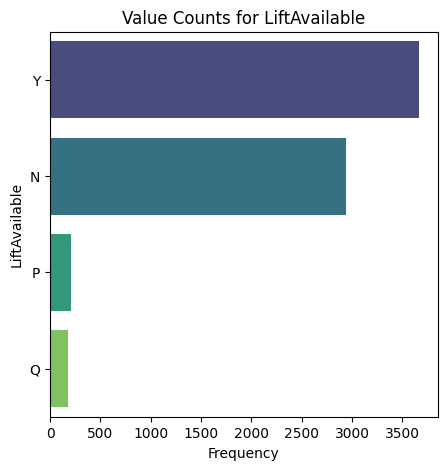

Column Name: LiftAvailable
  Value: Y                    Percentage: 47.51%
  Value: N                    Percentage: 38.07%
  Value: P                    Percentage: 2.64%
  Value: Q                    Percentage: 2.36%


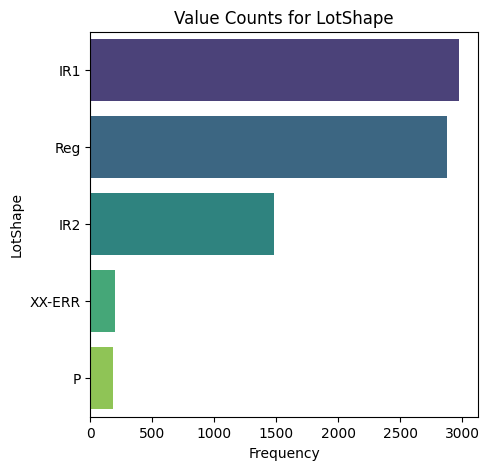

Column Name: LotShape
  Value: IR1                  Percentage: 38.59%
  Value: Reg                  Percentage: 37.26%
  Value: IR2                  Percentage: 19.15%
  Value: XX-ERR               Percentage: 2.62%
  Value: P                    Percentage: 2.38%


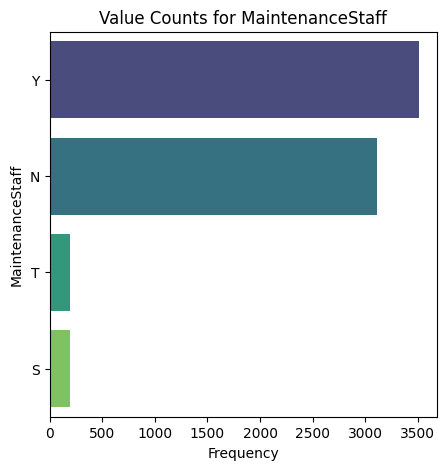

Column Name: MaintenanceStaff
  Value: Y                    Percentage: 45.45%
  Value: N                    Percentage: 40.25%
  Value: T                    Percentage: 2.54%
  Value: S                    Percentage: 2.46%


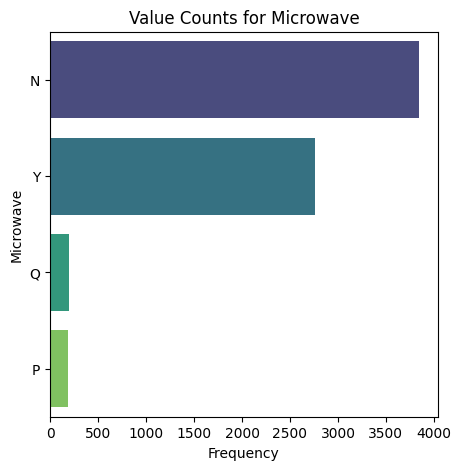

Column Name: Microwave
  Value: N                    Percentage: 49.84%
  Value: Y                    Percentage: 35.79%
  Value: Q                    Percentage: 2.59%
  Value: P                    Percentage: 2.41%


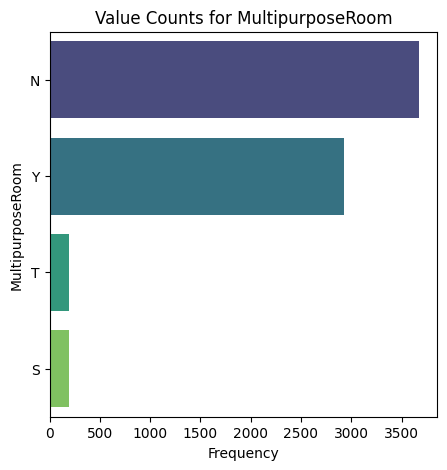

Column Name: MultipurposeRoom
  Value: N                    Percentage: 47.56%
  Value: Y                    Percentage: 37.87%
  Value: T                    Percentage: 2.51%
  Value: S                    Percentage: 2.49%


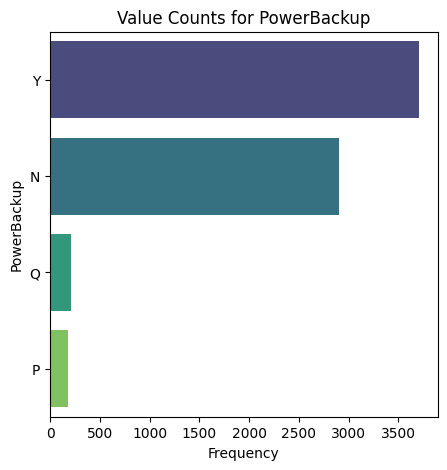

Column Name: PowerBackup
  Value: Y                    Percentage: 48.06%
  Value: N                    Percentage: 37.57%
  Value: Q                    Percentage: 2.71%
  Value: P                    Percentage: 2.29%


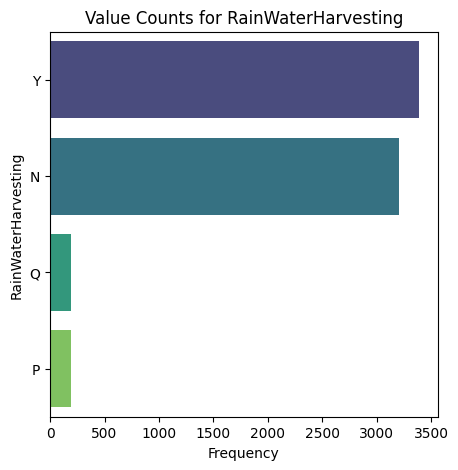

Column Name: RainWaterHarvesting
  Value: Y                    Percentage: 43.94%
  Value: N                    Percentage: 41.52%
  Value: Q                    Percentage: 2.53%
  Value: P                    Percentage: 2.47%


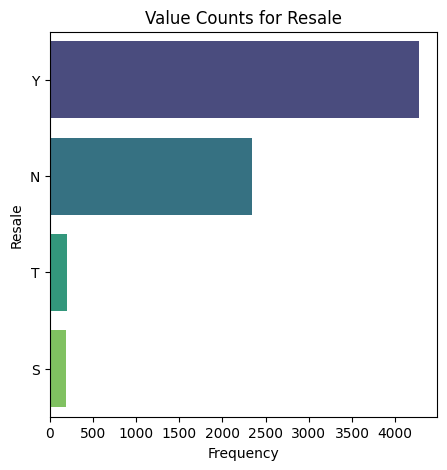

Column Name: Resale
  Value: Y                    Percentage: 55.36%
  Value: N                    Percentage: 30.29%
  Value: T                    Percentage: 2.59%
  Value: S                    Percentage: 2.41%


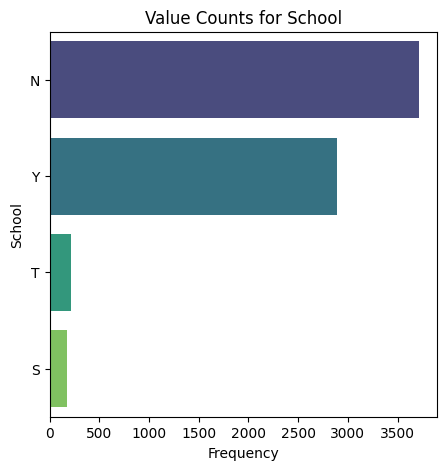

Column Name: School
  Value: N                    Percentage: 48.10%
  Value: Y                    Percentage: 37.43%
  Value: T                    Percentage: 2.72%
  Value: S                    Percentage: 2.28%


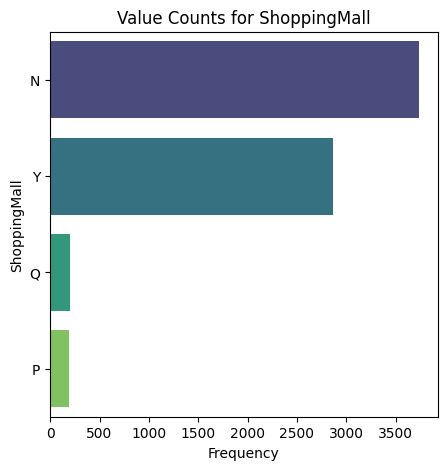

Column Name: ShoppingMall
  Value: N                    Percentage: 48.43%
  Value: Y                    Percentage: 37.06%
  Value: Q                    Percentage: 2.55%
  Value: P                    Percentage: 2.45%


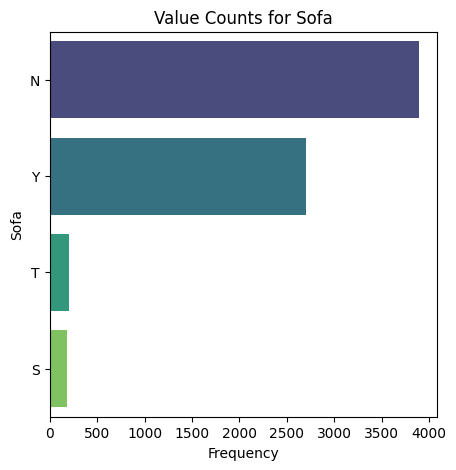

Column Name: Sofa
  Value: N                    Percentage: 50.40%
  Value: Y                    Percentage: 35.03%
  Value: T                    Percentage: 2.60%
  Value: S                    Percentage: 2.40%


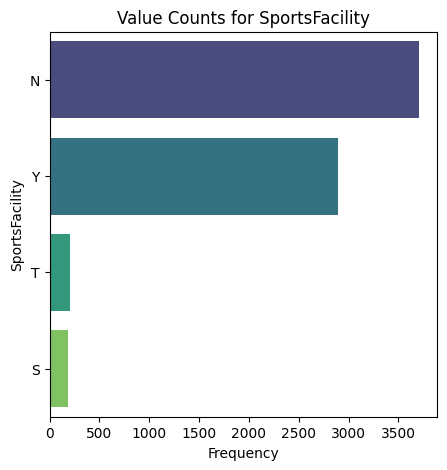

Column Name: SportsFacility
  Value: N                    Percentage: 47.99%
  Value: Y                    Percentage: 37.56%
  Value: T                    Percentage: 2.59%
  Value: S                    Percentage: 2.41%


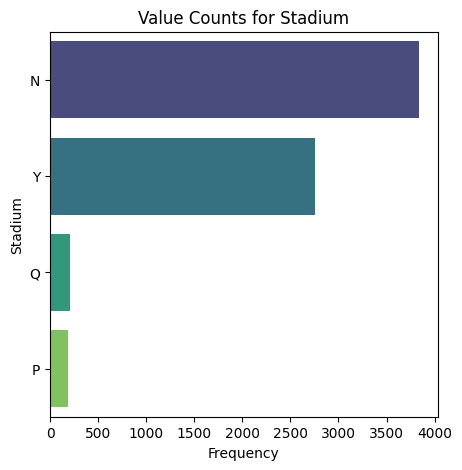

Column Name: Stadium
  Value: N                    Percentage: 49.75%
  Value: Y                    Percentage: 35.73%
  Value: Q                    Percentage: 2.64%
  Value: P                    Percentage: 2.36%


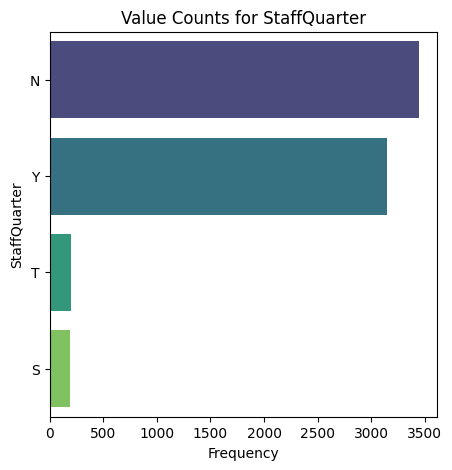

Column Name: StaffQuarter
  Value: N                    Percentage: 44.60%
  Value: Y                    Percentage: 40.78%
  Value: T                    Percentage: 2.54%
  Value: S                    Percentage: 2.46%


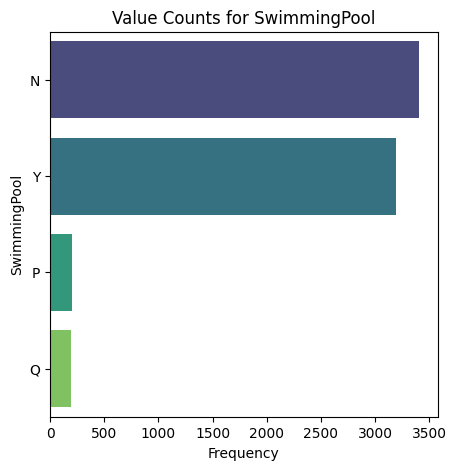

Column Name: SwimmingPool
  Value: N                    Percentage: 44.14%
  Value: Y                    Percentage: 41.34%
  Value: P                    Percentage: 2.57%
  Value: Q                    Percentage: 2.44%


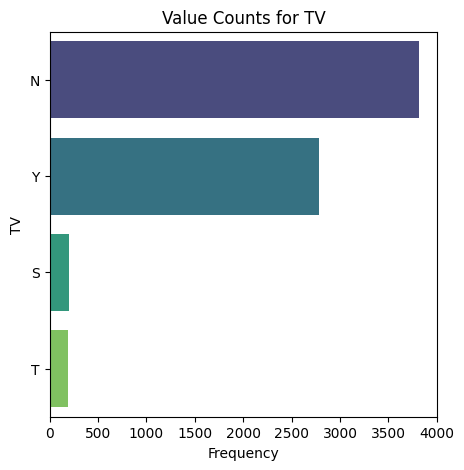

Column Name: TV
  Value: N                    Percentage: 49.40%
  Value: Y                    Percentage: 36.05%
  Value: S                    Percentage: 2.59%
  Value: T                    Percentage: 2.41%


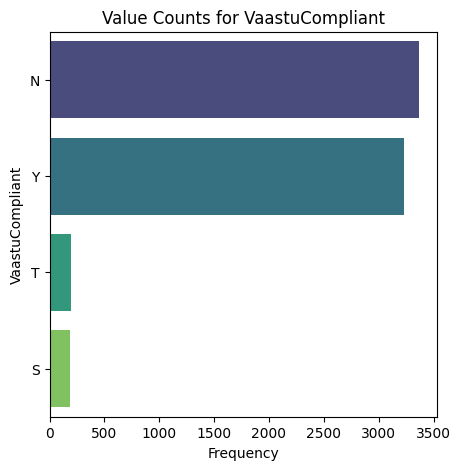

Column Name: VaastuCompliant
  Value: N                    Percentage: 43.59%
  Value: Y                    Percentage: 41.84%
  Value: T                    Percentage: 2.57%
  Value: S                    Percentage: 2.44%


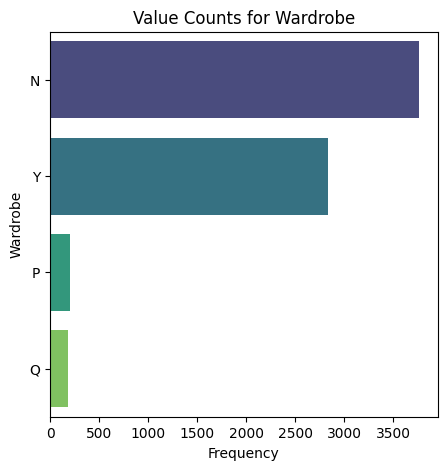

Column Name: Wardrobe
  Value: N                    Percentage: 48.75%
  Value: Y                    Percentage: 36.77%
  Value: P                    Percentage: 2.64%
  Value: Q                    Percentage: 2.36%


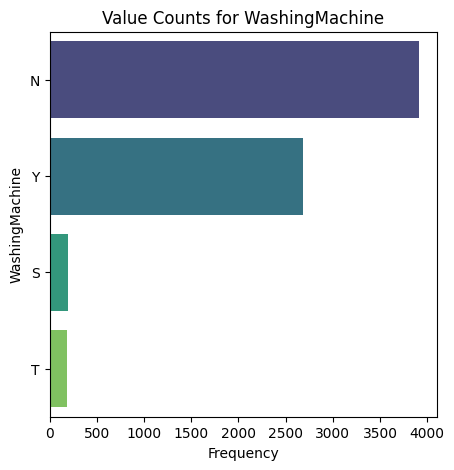

Column Name: WashingMachine
  Value: N                    Percentage: 50.65%
  Value: Y                    Percentage: 34.82%
  Value: S                    Percentage: 2.55%
  Value: T                    Percentage: 2.45%


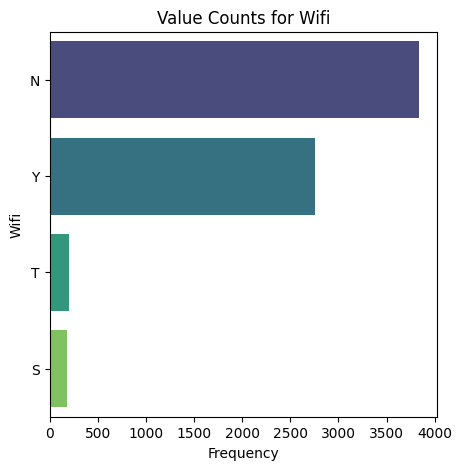

Column Name: Wifi
  Value: N                    Percentage: 49.67%
  Value: Y                    Percentage: 35.77%
  Value: T                    Percentage: 2.63%
  Value: S                    Percentage: 2.37%
All categorical outliers replaced with NaN successfully!

----------Numeric Outlier Count---------
Before removal:  1206
After removal:  0

-----------Categorical Outlier Count---------

'Column Name'	Outlier Count	 Outlier Values
****************************************************************************************************
24X7Security             386            ['Q', 'P']
AC                       386            ['P', 'Q']
ATM                      386            ['P', 'Q']
BED                      386            ['P', 'Q']
Cafeteria                386            ['S', 'T']
CarParking               386            ['Q', 'P']
Children'splayarea       386            ['Q', 'P']
ClubHouse                386            ['S', 'T']
DiningTable              386            ['S', 'T

In [22]:
#The previous code of DATA_CLEANING

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Function to detect and handle outliers (numerical and categorical)
def detect_outliers(df):
    df = df.copy()  # Avoid modifying original DataFrame

    num_row, num_col = df.shape
    print(f"No of rows: {num_row}\nNo of cols: {num_col}\n")

    # Identify numeric and categorical columns (excluding 'Location' column)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    if len(numeric_columns) == 0 and len(categorical_columns) == 0:
        print("No numeric or categorical columns to check for outliers.")
        return df, {}, {}, {}, {}

    # Dictionaries to store outlier information
    outliers_summary_before = {}
    outliers_summary_after = {}
    outliers_values_summary = {}
    categorical_outliers_summary = {}

    # Detecting outliers for numerical columns using IQR
    if len(numeric_columns) > 0:
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1

        for col in numeric_columns:
            lower_bound = Q1[col] - 1.5 * IQR[col]
            upper_bound = Q3[col] + 1.5 * IQR[col]

            # Outliers before removal
            outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_before[col] = outliers_before.shape[0]

            # Get the top 3 distinct outlier values
            distinct_outliers = np.unique(outliers_before[col].values)
            outliers_values_summary[col] = distinct_outliers[:3]

            # Plot outlier distribution before replacement
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=df[col], color="cyan")
            plt.title(f"Outlier Distribution for {col}")
            plt.xlabel(col)
            plt.show()

            # Print numeric column name and its largest 5 or top 5 extreme outlier values
            print(f"Column Name: {col}\nLargest 5 outliers: {distinct_outliers[-5:]}\n")


            # Replace outliers with NaN
            df[col] = df[col].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)

            # Outliers after removal
            outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_after[col] = outliers_after.shape[0]

    print("\nFrequency Distribution of Categorical Column values....")

    if len(categorical_columns) > 0:
        for col in categorical_columns:
            value_counts = df[col].value_counts(dropna=True)
            total_count = df.shape[0]
            percentage_counts = (value_counts / total_count) * 100

            # Plot value counts
            plt.figure(figsize=(5, 5))
            sns.barplot(y=value_counts.index, x=value_counts.values, hue=value_counts.index, palette="viridis", legend=False)
            plt.ylabel(col)
            plt.xlabel("Frequency")
            plt.title(f"Value Counts for {col}")
            plt.show()

            print(f"Column Name: {col}")
            for value, count in value_counts.items(): #for value, count in value_counts.items(dropna=True):
                percentage = percentage_counts.get(value, 0)
                print(f"  Value: {value:<20} Percentage: {percentage:.2f}%")

            # Define threshold (2% of total row count)
            threshold = 0.05 * len(df)

            # Identify all rare categories below threshold
            rare_categories = value_counts[value_counts < threshold].index.tolist()
            rare_counts = value_counts[value_counts < threshold].tolist()

            # Store all rare categories in the summary
            categorical_outliers_summary[col] = {
                'outlier_count': sum(rare_counts),  # Total occurrences of all rare categories
                'outlier_values': rare_categories    # List of rare categories
            }

            # Replace all rare categories with NaN
            df[col] = df[col].apply(lambda x: np.nan if x in rare_categories else x)

        total_categorical_outliers_before = sum(
            categorical_outliers_summary[col]['outlier_count'] for col in categorical_columns if col in categorical_outliers_summary
        )

        # Check for remaining occurrences of the original outlier values
        total_categorical_outliers_after = 0
        for col in categorical_columns:
            if col in categorical_outliers_summary:
                for outlier_value in categorical_outliers_summary[col]['outlier_values']:
                    if outlier_value in df[col].values:  # Check if the original value still exists
                        total_categorical_outliers_after += df[col].value_counts().get(outlier_value, 0)

        if total_categorical_outliers_after == 0:
            print("All categorical outliers replaced with NaN successfully!")
        else:
            print(f"{total_categorical_outliers_after} occurrences of original categorical outliers still present after replacement.")
    return df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after


# Function to process datasets
def process_dataset(df, dataset_name):
    df = df.copy()  # Ensure no unintended modifications

    print(f"\n------------------ {dataset_name} Dataset Summary ------------------\n")
    print("\nSummary Statistics (Numeric Columns):\n")
    print(df.iloc[:, :8].describe(include=[np.number]))

    # Identify categorical columns (excluding 'Location')
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    # Detect and handle outliers
    df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after = detect_outliers(df)

    # Separate numerical and categorical outliers properly
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    numeric_outliers_summary_before = {col: outliers_summary_before[col] for col in numeric_columns if col in outliers_summary_before}
    numeric_outliers_summary_after = {col: outliers_summary_after[col] for col in numeric_columns if col in outliers_summary_after}
    numeric_outliers_values_summary = {col: outliers_values_summary[col] for col in numeric_columns if col in outliers_values_summary}

    # Use sum() to get total number of outliers before and after removal
    total_outliers_before = sum(numeric_outliers_summary_before.values())
    total_outliers_after = sum(numeric_outliers_summary_after.values())

    print("\n----------Numeric Outlier Count---------")
    print("Before removal: ",total_outliers_before)
    print("After removal: ",total_outliers_after)

    print("\n-----------Categorical Outlier Count---------")
    print("\n'Column Name'\tOutlier Count\t Outlier Values")
    print("*"*100)
    for col in categorical_columns:
       print(f"{col:<25}{categorical_outliers_summary[col]['outlier_count']:<15}{categorical_outliers_summary[col]['outlier_values']}")

    '''
    # Compute total categorical outliers before removal
    total_categorical_outliers_before = sum(
        categorical_outliers_summary[col]['outlier_count'] for col in categorical_outliers_summary
    )
    '''

    print("Before removal:",total_categorical_outliers_before)
    print("After removal:",total_categorical_outliers_after)

    # Checking for missing values
    print("\n-------------------------------------------------Missing Values Count---------------------------------------------------")
    missing_values = df.isnull().sum()

    print("\nFirst 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].head())

    print("\nLast 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].tail())

    df.dropna(subset=['Location'], inplace=True)

    print("\n\nRemoving rows where location is empty..")
    num_row, num_column = df.shape
    print(f"After removal...\nNo. of rows: {num_row}\nNo. of columns: {num_column}\n")

    # Apply SimpleImputer for numeric columns
    numeric_imputer = SimpleImputer(strategy="mean")
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    missing_numeric = df[numeric_columns].isnull().sum()
    if missing_numeric.any() > 0:
        print("Some missing values are still present after imputation of numerical columns.")
    else:
        print("No missing numeric values left after imputation.")

    # Handle missing values in categorical columns using most frequent value
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    missing_categorical = df[categorical_columns].isnull().sum()
    #print(missing_categorical)

    if missing_categorical.any() > 0:
        print("Some missing values are still present after imputation of categorical columns.")
    else:
        print("No missing categorical values left after imputation.")

    print("\n--------------------Duplicate Row Count----------------------\n")

    # Identify fully identical duplicates (all columns match)
    duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all instances of full duplicates
    duplicate_count = duplicate_rows.shape[0]

    print(f"# Total no. of fully identical duplicate rows: {duplicate_count}\n")

    if duplicate_count > 0:
        print("\n------ Sample of Fully Identical Duplicate Records ------\n")
        #print(duplicate_rows.iloc[:, :8].head(5))  # Show up to 5 duplicates
        print(duplicate_rows) #shows all duplicate rows

    print("\n------ Before Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")

    # Remove only fully identical duplicate rows
    # keeps one instance of the duplicate rows and then removes the rest
    df.drop_duplicates(inplace=True, keep='first')

    print("\n------ After Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")
    return df



# Load dataset
df1 = pd.read_csv("/content/DATA_CLEANING/Bangalore_LotShape_outliers.csv")
df2 = pd.read_csv("/content/DATA_CLEANING/Chennai_LotShape_outliers.csv")
df3 = pd.read_csv("/content/DATA_CLEANING/Delhi_LotShape_outliers.csv")
df4 = pd.read_csv("/content/DATA_CLEANING/Hyderabad_LotShape_outliers.csv")
df5 = pd.read_csv("/content/DATA_CLEANING/Kolkata_LotShape_outliers.csv")
df6 = pd.read_csv("/content//DATA_CLEANING/Mumbai_LotShape_outliers.csv")

df_cleaned_1=process_dataset(df1,"Bangalore")
df_cleaned_2=process_dataset(df2,"Chennai")
df_cleaned_3=process_dataset(df3,"Delhi")
df_cleaned_4=process_dataset(df4,"Hyderabad")
df_cleaned_5=process_dataset(df5,"Kolkata")
df_cleaned_6=process_dataset(df6,"Mumbai")


1. In this code correlation Matrix generated
2. IterativeImputer is used Instead of SimpleImputer
3. and png , pdf is generated using Reportlab library

In [ ]:
#The new changed code
''' the iterativeImputer
reportlab is used ... '''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Image, Paragraph, PageBreak # Import Paragraph
from reportlab.lib.styles import getSampleStyleSheet


# Function to detect and handle outliers (numerical and categorical)
def detect_outliers(df):
    df = df.copy()  # Avoid modifying original DataFrame

    num_row, num_col = df.shape
    print(f"No of rows: {num_row}\nNo of cols: {num_col}\n")

    # Identify numeric and categorical columns (excluding 'Location' column)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    if len(numeric_columns) == 0 and len(categorical_columns) == 0:
        print("No numeric or categorical columns to check for outliers.")
        return df, {}, {}, {}, {}

    # Dictionaries to store outlier information
    outliers_summary_before = {}
    outliers_summary_after = {}
    outliers_values_summary = {}
    categorical_outliers_summary = {}

    # Detecting outliers for numerical columns using IQR
    if len(numeric_columns) > 0:
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1

        for col in numeric_columns:
            lower_bound = Q1[col] - 1.5 * IQR[col]
            upper_bound = Q3[col] + 1.5 * IQR[col]

            # Outliers before removal
            outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_before[col] = outliers_before.shape[0]

            # Get the top 3 distinct outlier values
            distinct_outliers = np.unique(outliers_before[col].values)
            outliers_values_summary[col] = distinct_outliers[:3]

            # Instead of individual box plots, create a summary table
            # (You can still generate box plots if needed, but for efficiency,
            #  a table is preferred for large datasets)

            # Replace outliers with NaN using vectorized operation
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

            # Outliers after removal
            outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_after[col] = outliers_after.shape[0]

    print("\nFrequency Distribution of Categorical Column values....")

    if len(categorical_columns) > 0:
        # Pre-calculate value counts and percentages for efficiency
        value_counts_dict = {}
        percentage_counts_dict = {}
        for col in categorical_columns:
            value_counts = df[col].value_counts(dropna=True)
            total_count = df.shape[0]
            percentage_counts = (value_counts / total_count) * 100
            value_counts_dict[col] = value_counts
            percentage_counts_dict[col] = percentage_counts

        for col in categorical_columns:
            # Use pre-calculated value counts and percentages
            value_counts = value_counts_dict[col]
            percentage_counts = percentage_counts_dict[col]

            # ... (rest of the categorical outlier handling logic) ...

            # Define threshold (5% of total row count)
            threshold = 0.05 * len(df)

            # Identify all rare categories below threshold
            rare_categories = value_counts[value_counts < threshold].index.tolist()
            rare_counts = value_counts[value_counts < threshold].tolist()

            # Store all rare categories in the summary
            categorical_outliers_summary[col] = {
                'outlier_count': sum(rare_counts),  # Total occurrences of all rare categories
                'outlier_values': rare_categories    # List of rare categories
            }

            # Replace all rare categories with NaN using vectorized operation
            df[col] = np.where(df[col].isin(rare_categories), np.nan, df[col])

        total_categorical_outliers_before = sum(
            categorical_outliers_summary[col]['outlier_count'] for col in categorical_columns if col in categorical_outliers_summary
        )

        # Check for remaining occurrences of the original outlier values
        total_categorical_outliers_after = 0
        for col in categorical_columns:
            if col in categorical_outliers_summary:
                for outlier_value in categorical_outliers_summary[col]['outlier_values']:
                    if outlier_value in df[col].values:  # Check if the original value still exists
                        total_categorical_outliers_after += df[col].value_counts().get(outlier_value, 0)

        if total_categorical_outliers_after == 0:
            print("All categorical outliers replaced with NaN successfully!")
        else:
            print(f"{total_categorical_outliers_after} occurrences of original categorical outliers still present after replacement.")

    return df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after

# Function to process datasets
def process_dataset(df, dataset_name):
    df = df.copy()  # Ensure no unintended modifications

    print(f"\n------------------ {dataset_name} Dataset Summary ------------------\n")
    print("\nSummary Statistics (Numeric Columns):\n")
    print(df.iloc[:, :8].describe(include=[np.number]))

    # Identify categorical columns (excluding 'Location')
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    # Detect and handle outliers
    df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after = detect_outliers(df)

    # Separate numerical and categorical outliers properly
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    numeric_outliers_summary_before = {col: outliers_summary_before[col] for col in numeric_columns if col in outliers_summary_before}
    numeric_outliers_summary_after = {col: outliers_summary_after[col] for col in numeric_columns if col in outliers_summary_after}
    numeric_outliers_values_summary = {col: outliers_values_summary[col] for col in numeric_columns if col in outliers_values_summary}

    # Use sum() to get total number of outliers before and after removal
    total_outliers_before = sum(numeric_outliers_summary_before.values())
    total_outliers_after = sum(numeric_outliers_summary_after.values())

    print("\n----------Numeric Outlier Count---------")
    print("Before removal: ",total_outliers_before)
    print("After removal: ",total_outliers_after)

    print("\n-----------Categorical Outlier Count---------")
    print("\n'Column Name'\tOutlier Count\t Outlier Values")
    print("*"*100)
    for col in categorical_columns:
       print(f"{col:<25}{categorical_outliers_summary[col]['outlier_count']:<15}{categorical_outliers_summary[col]['outlier_values']}")

    '''
    # Compute total categorical outliers before removal
    total_categorical_outliers_before = sum(
        categorical_outliers_summary[col]['outlier_count'] for col in categorical_outliers_summary
    )
    '''

    print("Before removal:",total_categorical_outliers_before)
    print("After removal:",total_categorical_outliers_after)

    # Checking for missing values
    print("\n-------------------------------------------------Missing Values Count---------------------------------------------------")
    missing_values = df.isnull().sum()

    print("\nFirst 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].head())

    print("\nLast 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].tail())

    df.dropna(subset=['Location'], inplace=True)

    print("\n\nRemoving rows where location is empty..")
    num_row, num_column = df.shape
    print(f"After removal...\nNo. of rows: {num_row}\nNo. of columns: {num_column}\n")

    # Apply IterativeImputer for numeric columns
    numeric_imputer = IterativeImputer(max_iter=10, random_state=0)  # Adjust max_iter as needed
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    missing_numeric = df[numeric_columns].isnull().sum()
    if missing_numeric.any() > 0:
        print("Some missing values are still present after imputation of numerical columns.")
    else:
        print("No missing numeric values left after imputation.")

    # Handle missing values in categorical columns using most frequent value
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    missing_categorical = df[categorical_columns].isnull().sum()
    #print(missing_categorical)

    if missing_categorical.any() > 0:
        print("Some missing values are still present after imputation of categorical columns.")
    else:
        print("No missing categorical values left after imputation.")

    print("\n--------------------Duplicate Row Count----------------------\n")

    # Identify fully identical duplicates (all columns match)
    duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all instances of full duplicates
    duplicate_count = duplicate_rows.shape[0]

    print(f"# Total no. of fully identical duplicate rows: {duplicate_count}\n")

    if duplicate_count > 0:
        print("\n------ Sample of Fully Identical Duplicate Records ------\n")
        #print(duplicate_rows.iloc[:, :8].head(5))  # Show up to 5 duplicates
        print(duplicate_rows) #shows all duplicate rows

    print("\n------ Before Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")

    # Remove only fully identical duplicate rows
    # keeps one instance of the duplicate rows and then removes the rest
    df.drop_duplicates(inplace=True, keep='first')

    print("\n------ After Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")
    return df

# Load dataset
df1 = pd.read_csv("/content/DATA_CLEANING/Bangalore_LotShape_outliers.csv")
df2 = pd.read_csv("/content/DATA_CLEANING/Chennai_LotShape_outliers.csv")
df3 = pd.read_csv("/content/DATA_CLEANING/Delhi_LotShape_outliers.csv")
df4 = pd.read_csv("/content/DATA_CLEANING/Hyderabad_LotShape_outliers.csv")
df5 = pd.read_csv("/content/DATA_CLEANING/Kolkata_LotShape_outliers.csv")
df6 = pd.read_csv("/content/DATA_CLEANING/Mumbai_LotShape_outliers.csv")

datasets = [(df1, "Bangalore"), (df2, "Chennai"), (df3, "Delhi"),
            (df4, "Hyderabad"), (df5, "Kolkata"), (df6, "Mumbai")]

# Process datasets and generate visualizations and PDF reports
for df, dataset_name in datasets:
    df_cleaned = process_dataset(df, dataset_name)

    # Create a PDF document
    doc = SimpleDocTemplate(f"{dataset_name}_report.pdf", pagesize=letter)
    elements = []

    # Get sample styles
    styles = getSampleStyleSheet()

    # Add title as a Paragraph
    elements.append(Paragraph(f"<h1>{dataset_name} Dataset Report</h1>", style=styles['Heading1']))

    # Add summary statistics table
    summary_stats = df_cleaned.describe().reset_index()  # Reset index for column name
    summary_data = [summary_stats.columns.tolist()] + summary_stats.values.tolist()
    summary_table = Table(summary_data)
    summary_table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
                                      ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    elements.append(summary_table)

# Process datasets and generate visualizations
for df, dataset_name in [(df1, "Bangalore"), (df2, "Chennai"), (df3, "Delhi"), (df4, "Hyderabad"), (df5, "Kolkata"), (df6, "Mumbai")]:
    df_cleaned = process_dataset(df, dataset_name)

    # --- Visualization for Numeric Outliers ---
    numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

    # Box plots for all numeric columns
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_cleaned[numeric_columns], orient="h", palette="Set2")
    plt.title(f"Numeric Outlier Distribution for {dataset_name}")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()

    # --- Visualization for Categorical Outliers ---
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.difference(['Location'])

    # Bar plots for categorical columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index, palette="viridis")
        plt.title(f"Categorical Outlier Distribution for {col} in {dataset_name}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

    # --- Visualization for Missing Values ---
    missing_values = df_cleaned.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="Blues_d")
    plt.title(f"Missing Values in {dataset_name} Dataset")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # --- Correlation Matrix ---
    plt.figure(figsize=(8, 6))  # Reduce the figure size
    sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix for {dataset_name} Dataset")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"{dataset_name}_correlation_matrix.png")  # Save the plot as an image
    plt.close()  # Close the plot to avoid displaying it

    # Embed the image in the PDF with specified width and height
    elements.append(Image(f"{dataset_name}_correlation_matrix.png", width=400, height=300))  # Adjust width and height as needed

    elements.append(PageBreak())  # Add a page break after the image

    # Build the PDF outside the inner loop
doc.build(elements)
print(f"{dataset_name} report generated successfully!")


In this code we have only changed the SimpleImputer to IterativeImputer ...

In [ ]:
#The previous code of DATA_CLEANING NEEDED MODIFICATION
''' APPLYING IterativeImputer instead of SimpleImputer for numeric columns '''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Function to detect and handle outliers (numerical and categorical)
def detect_outliers(df):
    df = df.copy()  # Avoid modifying original DataFrame

    num_row, num_col = df.shape
    print(f"No of rows: {num_row}\nNo of cols: {num_col}\n")

    # Identify numeric and categorical columns (excluding 'Location' column)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    if len(numeric_columns) == 0 and len(categorical_columns) == 0:
        print("No numeric or categorical columns to check for outliers.")
        return df, {}, {}, {}, {}

    # Dictionaries to store outlier information
    outliers_summary_before = {}
    outliers_summary_after = {}
    outliers_values_summary = {}
    categorical_outliers_summary = {}

    # Detecting outliers for numerical columns using IQR
    if len(numeric_columns) > 0:
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1

        for col in numeric_columns:
            lower_bound = Q1[col] - 1.5 * IQR[col]
            upper_bound = Q3[col] + 1.5 * IQR[col]

            # Outliers before removal
            outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_before[col] = outliers_before.shape[0]

            # Get the top 3 distinct outlier values
            distinct_outliers = np.unique(outliers_before[col].values)
            outliers_values_summary[col] = distinct_outliers[:3]

            # Plot outlier distribution before replacement
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=df[col], color="cyan")
            plt.title(f"Outlier Distribution for {col}")
            plt.xlabel(col)
            plt.show()

            # Print numeric column name and its largest 5 or top 5 extreme outlier values
            print(f"Column Name: {col}\nLargest 5 outliers: {distinct_outliers[-5:]}\n")


            # Replace outliers with NaN
            df[col] = df[col].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)

            # Outliers after removal
            outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_summary_after[col] = outliers_after.shape[0]

    print("\nFrequency Distribution of Categorical Column values....")

    if len(categorical_columns) > 0:
        for col in categorical_columns:
            value_counts = df[col].value_counts(dropna=True)
            total_count = df.shape[0]
            percentage_counts = (value_counts / total_count) * 100

            # Plot value counts
            plt.figure(figsize=(5, 5))
            sns.barplot(y=value_counts.index, x=value_counts.values, hue=value_counts.index, palette="viridis", legend=False)
            plt.ylabel(col)
            plt.xlabel("Frequency")
            plt.title(f"Value Counts for {col}")
            plt.show()

            print(f"Column Name: {col}")
            for value, count in value_counts.items(): #for value, count in value_counts.items(dropna=True):
                percentage = percentage_counts.get(value, 0)
                print(f"  Value: {value:<20} Percentage: {percentage:.2f}%")

            # Define threshold (2% of total row count)
            threshold = 0.05 * len(df)

            # Identify all rare categories below threshold
            rare_categories = value_counts[value_counts < threshold].index.tolist()
            rare_counts = value_counts[value_counts < threshold].tolist()

            # Store all rare categories in the summary
            categorical_outliers_summary[col] = {
                'outlier_count': sum(rare_counts),  # Total occurrences of all rare categories
                'outlier_values': rare_categories    # List of rare categories
            }

            # Replace all rare categories with NaN
            df[col] = df[col].apply(lambda x: np.nan if x in rare_categories else x)

        total_categorical_outliers_before = sum(
            categorical_outliers_summary[col]['outlier_count'] for col in categorical_columns if col in categorical_outliers_summary
        )

        # Check for remaining occurrences of the original outlier values
        total_categorical_outliers_after = 0
        for col in categorical_columns:
            if col in categorical_outliers_summary:
                for outlier_value in categorical_outliers_summary[col]['outlier_values']:
                    if outlier_value in df[col].values:  # Check if the original value still exists
                        total_categorical_outliers_after += df[col].value_counts().get(outlier_value, 0)

        if total_categorical_outliers_after == 0:
            print("All categorical outliers replaced with NaN successfully!")
        else:
            print(f"{total_categorical_outliers_after} occurrences of original categorical outliers still present after replacement.")
    return df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after


# Function to process datasets
def process_dataset(df, dataset_name):
    df = df.copy()  # Ensure no unintended modifications

    print(f"\n------------------ {dataset_name} Dataset Summary ------------------\n")
    print("\nSummary Statistics (Numeric Columns):\n")
    print(df.iloc[:, :8].describe(include=[np.number]))

    # Identify categorical columns (excluding 'Location')
    categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Location'])

    # Detect and handle outliers
    df, outliers_summary_before, outliers_summary_after, outliers_values_summary, categorical_outliers_summary, total_categorical_outliers_before, total_categorical_outliers_after = detect_outliers(df)

    # Separate numerical and categorical outliers properly
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    numeric_outliers_summary_before = {col: outliers_summary_before[col] for col in numeric_columns if col in outliers_summary_before}
    numeric_outliers_summary_after = {col: outliers_summary_after[col] for col in numeric_columns if col in outliers_summary_after}
    numeric_outliers_values_summary = {col: outliers_values_summary[col] for col in numeric_columns if col in outliers_values_summary}

    # Use sum() to get total number of outliers before and after removal
    total_outliers_before = sum(numeric_outliers_summary_before.values())
    total_outliers_after = sum(numeric_outliers_summary_after.values())

    print("\n----------Numeric Outlier Count---------")
    print("Before removal: ",total_outliers_before)
    print("After removal: ",total_outliers_after)

    print("\n-----------Categorical Outlier Count---------")
    print("\n'Column Name'\tOutlier Count\t Outlier Values")
    print("*"*100)
    for col in categorical_columns:
       print(f"{col:<25}{categorical_outliers_summary[col]['outlier_count']:<15}{categorical_outliers_summary[col]['outlier_values']}")

    '''
    # Compute total categorical outliers before removal
    total_categorical_outliers_before = sum(
        categorical_outliers_summary[col]['outlier_count'] for col in categorical_outliers_summary
    )
    '''

    print("Before removal:",total_categorical_outliers_before)
    print("After removal:",total_categorical_outliers_after)

    # Checking for missing values
    print("\n-------------------------------------------------Missing Values Count---------------------------------------------------")
    missing_values = df.isnull().sum()

    print("\nFirst 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].head())

    print("\nLast 5 columns with missing values...\n")
    print(missing_values[missing_values > 0].tail())

    df.dropna(subset=['Location'], inplace=True)

    print("\n\nRemoving rows where location is empty..")
    num_row, num_column = df.shape
    print(f"After removal...\nNo. of rows: {num_row}\nNo. of columns: {num_column}\n")

    # Apply IterativeImputer for numeric columns
    numeric_imputer = IterativeImputer(max_iter=10, random_state=0) # Using IterativeImputer
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    missing_numeric = df[numeric_columns].isnull().sum()
    if missing_numeric.any() > 0:
        print("Some missing values are still present after imputation of numerical columns.")
    else:
        print("No missing numeric values left after imputation.")

    # Handle missing values in categorical columns using most frequent value
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    missing_categorical = df[categorical_columns].isnull().sum()
    #print(missing_categorical)

    if missing_categorical.any() > 0:
        print("Some missing values are still present after imputation of categorical columns.")
    else:
        print("No missing categorical values left after imputation.")

    print("\n--------------------Duplicate Row Count----------------------\n")

    # Identify fully identical duplicates (all columns match)
    duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all instances of full duplicates
    duplicate_count = duplicate_rows.shape[0]

    print(f"# Total no. of fully identical duplicate rows: {duplicate_count}\n")

    if duplicate_count > 0:
        print("\n------ Sample of Fully Identical Duplicate Records ------\n")
        #print(duplicate_rows.iloc[:, :8].head(5))  # Show up to 5 duplicates
        print(duplicate_rows) #shows all duplicate rows

    print("\n------ Before Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")

    # Remove only fully identical duplicate rows
    # keeps one instance of the duplicate rows and then removes the rest
    df.drop_duplicates(inplace=True, keep='first')

    print("\n------ After Removal ------\n")
    num_row, num_col = df.shape
    print(f"No of rows: {num_row}")
    print(f"No of columns: {num_col}")
    return df

# Load dataset
df1 = pd.read_csv("/content/DATA_CLEANING/Bangalore_LotShape_outliers.csv")
df2 = pd.read_csv("/content/DATA_CLEANING/Chennai_LotShape_outliers.csv")
df3 = pd.read_csv("/content/DATA_CLEANING/Delhi_LotShape_outliers.csv")
df4 = pd.read_csv("/content/DATA_CLEANING/Hyderabad_LotShape_outliers.csv")
df5 = pd.read_csv("/content/DATA_CLEANING/Kolkata_LotShape_outliers.csv")
df6 = pd.read_csv("/content//DATA_CLEANING/Mumbai_LotShape_outliers.csv")

df_cleaned_1=process_dataset(df1,"Bangalore")
df_cleaned_2=process_dataset(df2,"Chennai")
df_cleaned_3=process_dataset(df3,"Delhi")
df_cleaned_4=process_dataset(df4,"Hyderabad")
df_cleaned_5=process_dataset(df5,"Kolkata")
df_cleaned_6=process_dataset(df6,"Mumbai")